In [1]:
#Helpers libraries
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
logging.getLogger().setLevel('INFO')
from datetime import datetime,timedelta
import dateutil.relativedelta
import warnings
warnings.filterwarnings("ignore")

import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from scipy import stats
from scipy.stats import norm, skew #statistics for normality and skewness

In [2]:
pd.set_option("display.max_columns", 110)
pd.set_option("display.max_rows", 100)

# 1. Data Scrapping

Scrapping was performed using the code writen by serve-and-volley. See here [Github](https://github.com/serve-and-volley/atp-world-tour-tennis-data)

In [ ]:
import sys
from lxml import html
import requests
import re
import csv
import time
import numbers
import numpy as np
import pandas as pd

def array2csv(array, filename):
    with open(filename, "w") as my_csv:
        csvWriter = csv.writer(my_csv, delimiter = ',')
        csvWriter.writerows(array)

def html_parse_tree(url):
    page = requests.get(url)
    tree = html.fromstring(page.content)
    return tree

def xpath_parse(tree, xpath):
    result = tree.xpath(xpath)
    return result

def regex_strip_array(array):
    for i in range(0, len(array)):
        array[i] = regex_strip_string(array[i]).strip()
    return array

def regex_strip_string(string):
    string = re.sub('\n', '', string).strip()
    string = re.sub('\r', '', string).strip()
    string = re.sub('\t', '', string).strip()
    return string

def format_spacing(max_spacing, variable):
    spacing_count = max_spacing - len(variable)
    output = ''
    for i in range(0, spacing_count):
        output += ' '
    return output

def fraction_stats(string):
    string = string.replace('(', '')
    string = string.replace(')', '')
    return string.split('/')

def scrape_match_stats(match_stats_url):
    match_tree = html_parse_tree(match_stats_url)

    # Match time
    try:
        match_time_xpath = "//td[contains(@class, 'time')]/text()"
        match_time_parsed = xpath_parse(match_tree, match_time_xpath)
        match_time_cleaned = regex_strip_array(match_time_parsed)
        match_time = match_time_cleaned[0].replace("Time: ", "")
        match_time_split = match_time.split(":")            
        match_time_hours = int(match_time_split[0])
        match_time_minutes = int(match_time_split[1])
        match_duration = 120*match_time_hours + match_time_minutes                                        
    except Exception:
        match_time = ""
        match_duration = ""

    # Match info
    match_year = match_stats_url_suffix.split('/')[3]
    tourney_id = match_stats_url_suffix.split('/')[4]
    match_index = match_stats_url_suffix.split('/')[5]

    try:
        winner_slug_xpath = "//div[@class='player-left-name']/a/@href"
        winner_slug_parsed = xpath_parse(match_tree, winner_slug_xpath)
        winner_slug = winner_slug_parsed[0].split('/')[4]
    except Exception:
        winner_slug = ''

    try:
        loser_slug_xpath = "//div[@class='player-right-name']/a/@href"
        loser_slug_parsed = xpath_parse(match_tree, loser_slug_xpath)
        loser_slug = loser_slug_parsed[0].split('/')[4]
    except Exception:
        loser_slug = ''

    match_id = tourney_year + "-" + tourney_id + "-" + match_index + "-" + round_match_id + "-" + winner_player_id + "-" + loser_player_id    

    # # # # # # # #
    # Match stats #
    # # # # # # # #
    
    try:                
        # Stats Xpaths
        left_stats_xpath = "//td[@class='match-stats-number-left']/span/text()"
        left_stats_parsed = xpath_parse(match_tree, left_stats_xpath)
        left_stats_cleaned = regex_strip_array(left_stats_parsed)

        right_stats_xpath = "//td[@class='match-stats-number-right']/span/text()"
        right_stats_parsed = xpath_parse(match_tree, right_stats_xpath)
        right_stats_cleaned = regex_strip_array(right_stats_parsed)        

        # Ratings Xpaths
        left_ratings_xpath = "//td[@class='match-stats-number-left']/span/a/text()"
        left_ratings_parsed = xpath_parse(match_tree, left_ratings_xpath)
        right_ratings_xpath = "//td[@class='match-stats-number-right']/span/a/text()"
        right_ratings_parsed = xpath_parse(match_tree, right_ratings_xpath)

        # Left stats
        left_serve_rating = int(left_ratings_parsed[0])
        left_aces = int(left_stats_cleaned[2])
        left_double_faults = int(left_stats_cleaned[3])

        left_first_serves_in = int(fraction_stats(left_stats_cleaned[5])[0])
        left_first_serves_total = int(fraction_stats(left_stats_cleaned[5])[1])

        left_first_serve_points_won = int(fraction_stats(left_stats_cleaned[7])[0])
        left_first_serve_points_total = int(fraction_stats(left_stats_cleaned[7])[1])

        left_second_serve_points_won = int(fraction_stats(left_stats_cleaned[9])[0])
        left_second_serve_points_total = int(fraction_stats(left_stats_cleaned[9])[1])

        left_break_points_saved = int(fraction_stats(left_stats_cleaned[11])[0])
        left_break_points_serve_total = int(fraction_stats(left_stats_cleaned[11])[1])

        left_service_points_won = int(fraction_stats(left_stats_cleaned[23])[0])
        left_service_points_total = int(fraction_stats(left_stats_cleaned[23])[1])

        left_return_rating = int(left_ratings_parsed[1])
        left_first_serve_return_won = int(fraction_stats(left_stats_cleaned[16])[0])
        left_first_serve_return_total = int(fraction_stats(left_stats_cleaned[16])[1])

        left_second_serve_return_won = int(fraction_stats(left_stats_cleaned[18])[0])
        left_second_serve_return_total = int(fraction_stats(left_stats_cleaned[18])[1])

        left_break_points_converted = int(fraction_stats(left_stats_cleaned[20])[0])
        left_break_points_return_total = int(fraction_stats(left_stats_cleaned[20])[1])

        left_service_games_played = int(left_stats_cleaned[6])
        left_return_games_played = int(left_stats_cleaned[21])

        left_return_points_won = int(fraction_stats(left_stats_cleaned[25])[0])
        left_return_points_total = int(fraction_stats(left_stats_cleaned[25])[1])

        left_total_points_won = int(fraction_stats(left_stats_cleaned[27])[0])
        left_total_points_total = int(fraction_stats(left_stats_cleaned[27])[1])
        
        # Loser stats
        right_serve_rating = int(right_ratings_parsed[0])
        right_aces = int(right_stats_cleaned[2])
        right_double_faults = int(right_stats_cleaned[3])

        right_first_serves_in = int(fraction_stats(right_stats_cleaned[5])[0])
        right_first_serves_total = int(fraction_stats(right_stats_cleaned[5])[1])

        right_first_serve_points_won = int(fraction_stats(right_stats_cleaned[7])[0])
        right_first_serve_points_total = int(fraction_stats(right_stats_cleaned[7])[1])

        right_second_serve_points_won = int(fraction_stats(right_stats_cleaned[9])[0])
        right_second_serve_points_total = int(fraction_stats(right_stats_cleaned[9])[1])

        right_break_points_saved = int(fraction_stats(right_stats_cleaned[11])[0])
        right_break_points_serve_total = int(fraction_stats(right_stats_cleaned[11])[1])

        right_service_points_won = int(fraction_stats(right_stats_cleaned[23])[0])
        right_service_points_total = int(fraction_stats(right_stats_cleaned[23])[1])

        right_return_rating = int(right_ratings_parsed[1])
        right_first_serve_return_won = int(fraction_stats(right_stats_cleaned[16])[0])
        right_first_serve_return_total = int(fraction_stats(right_stats_cleaned[16])[1])

        right_second_serve_return_won = int(fraction_stats(right_stats_cleaned[18])[0])
        right_second_serve_return_total = int(fraction_stats(right_stats_cleaned[18])[1])

        right_break_points_converted = int(fraction_stats(right_stats_cleaned[20])[0])
        right_break_points_return_total = int(fraction_stats(right_stats_cleaned[20])[1])

        right_service_games_played = int(right_stats_cleaned[12])
        right_return_games_played = int(right_stats_cleaned[21])

        right_return_points_won = int(fraction_stats(right_stats_cleaned[25])[0])
        right_return_points_total = int(fraction_stats(right_stats_cleaned[25])[1])

        right_total_points_won = int(fraction_stats(right_stats_cleaned[27])[0])
        right_total_points_total = int(fraction_stats(right_stats_cleaned[27])[1])

        # # # # # # # # # # # # # # # # # # #
        # Assign stats to winner and loser  #
        # # # # # # # # # # # # # # # # # # #

        # Left player url
        left_player_url_xpath = "//div[@class='player-left-name']/a/@href"
        left_player_url_xpath_parsed = xpath_parse(match_tree, left_player_url_xpath)
            
        # Right player url
        right_player_url_xpath = "//div[@class='player-right-name']/a/@href"
        right_player_url_xpath_parsed = xpath_parse(match_tree, right_player_url_xpath)                

        if left_player_url_xpath_parsed == winner_slug_parsed:
            winner_serve_rating = left_serve_rating
            winner_aces = left_aces
            winner_double_faults = left_double_faults
            winner_first_serves_in = left_first_serves_in
            winner_first_serves_total = left_first_serves_total
            winner_first_serve_points_won = left_first_serve_points_won
            winner_first_serve_points_total = left_first_serve_points_total
            winner_second_serve_points_won = left_second_serve_points_won
            winner_second_serve_points_total = left_second_serve_points_total
            winner_break_points_saved = left_break_points_saved
            winner_break_points_serve_total = left_break_points_serve_total
            winner_service_points_won = left_service_points_won
            winner_service_points_total = left_service_points_total
            winner_return_rating = left_return_rating
            winner_first_serve_return_won = left_first_serve_return_won
            winner_first_serve_return_total = left_first_serve_return_total
            winner_second_serve_return_won = left_second_serve_return_won
            winner_second_serve_return_total = left_second_serve_return_total
            winner_break_points_converted = left_break_points_converted
            winner_break_points_return_total = left_break_points_return_total
            winner_service_games_played = left_service_games_played
            winner_return_games_played = left_return_games_played
            winner_return_points_won = left_return_points_won
            winner_return_points_total = left_return_points_total
            winner_total_points_won = left_total_points_won
            winner_total_points_total = left_total_points_total

            loser_serve_rating = right_serve_rating
            loser_aces = right_aces
            loser_double_faults = right_double_faults
            loser_first_serves_in = right_first_serves_in
            loser_first_serves_total = right_first_serves_total
            loser_first_serve_points_won = right_first_serve_points_won
            loser_first_serve_points_total = right_first_serve_points_total
            loser_second_serve_points_won = right_second_serve_points_won
            loser_second_serve_points_total = right_second_serve_points_total
            loser_break_points_saved = right_break_points_saved
            loser_break_points_serve_total = right_break_points_serve_total
            loser_service_points_won = right_service_points_won
            loser_service_points_total = right_service_points_total
            loser_return_rating = right_return_rating
            loser_first_serve_return_won = right_first_serve_return_won
            loser_first_serve_return_total = right_first_serve_return_total
            loser_second_serve_return_won = right_second_serve_return_won
            loser_second_serve_return_total = right_second_serve_return_total
            loser_break_points_converted = right_break_points_converted
            loser_break_points_return_total = right_break_points_return_total
            loser_service_games_played = right_service_games_played
            loser_return_games_played = right_return_games_played
            loser_return_points_won = right_return_points_won
            loser_return_points_total = right_return_points_total
            loser_total_points_won = right_total_points_won
            loser_total_points_total = right_total_points_total                    

        elif right_player_url_xpath_parsed == winner_slug_parsed:
            winner_serve_rating = right_serve_rating
            winner_aces = right_aces
            winner_double_faults = right_double_faults
            winner_first_serves_in = right_first_serves_in
            winner_first_serves_total = right_first_serves_total
            winner_first_serve_points_won = right_first_serve_points_won
            winner_first_serve_points_total = right_first_serve_points_total
            winner_second_serve_points_won = right_second_serve_points_won
            winner_second_serve_points_total = right_second_serve_points_total
            winner_break_points_saved = right_break_points_saved
            winner_break_points_serve_total = right_break_points_serve_total
            winner_service_points_won = right_service_points_won
            winner_service_points_total = right_service_points_total
            winner_return_rating = right_return_rating
            winner_first_serve_return_won = right_first_serve_return_won
            winner_first_serve_return_total = right_first_serve_return_total
            winner_second_serve_return_won = right_second_serve_return_won
            winner_second_serve_return_total = right_second_serve_return_total
            winner_break_points_converted = right_break_points_converted
            winner_break_points_return_total = right_break_points_return_total
            winner_service_games_played = right_service_games_played
            winner_return_games_played = right_return_games_played
            winner_return_points_won = right_return_points_won
            winner_return_points_total = right_return_points_total
            winner_total_points_won = right_total_points_won
            winner_total_points_total = right_total_points_total

            loser_serve_rating = left_serve_rating
            loser_aces = left_aces
            loser_double_faults = left_double_faults
            loser_first_serves_in = left_first_serves_in
            loser_first_serves_total = left_first_serves_total
            loser_first_serve_points_won = left_first_serve_points_won
            loser_first_serve_points_total = left_first_serve_points_total
            loser_second_serve_points_won = left_second_serve_points_won
            loser_second_serve_points_total = left_second_serve_points_total
            loser_break_points_saved = left_break_points_saved
            loser_break_points_serve_total = left_break_points_serve_total
            loser_service_points_won = left_service_points_won
            loser_service_points_total = left_service_points_total
            loser_return_rating = left_return_rating
            loser_first_serve_return_won = left_first_serve_return_won
            loser_first_serve_return_total = left_first_serve_return_total
            loser_second_serve_return_won = left_second_serve_return_won
            loser_second_serve_return_total = left_second_serve_return_total
            loser_break_points_converted = left_break_points_converted
            loser_break_points_return_total = left_break_points_return_total
            loser_service_games_played = left_service_games_played
            loser_return_games_played = left_return_games_played
            loser_return_points_won = left_return_points_won
            loser_return_points_total = left_return_points_total
            loser_total_points_won = left_total_points_won
            loser_total_points_total = left_total_points_total                          
    except Exception:
        winner_serve_rating = ''
        winner_aces = ''
        winner_double_faults = ''
        winner_first_serves_in = ''
        winner_first_serves_total = ''
        winner_first_serve_points_won = ''
        winner_first_serve_points_total = ''
        winner_second_serve_points_won = ''
        winner_second_serve_points_total = ''
        winner_break_points_saved = ''
        winner_break_points_serve_total = ''
        winner_service_points_won = ''
        winner_service_points_total = ''
        winner_return_rating = ''
        winner_first_serve_return_won = ''
        winner_first_serve_return_total = ''
        winner_second_serve_return_won = ''
        winner_second_serve_return_total = ''
        winner_break_points_converted = ''
        winner_break_points_return_total = ''
        winner_service_games_played = ''
        winner_return_games_played = ''
        winner_return_points_won = ''
        winner_return_points_total = ''
        winner_total_points_won = ''
        winner_total_points_total = ''

        loser_serve_rating = ''
        loser_aces = ''
        loser_double_faults = ''
        loser_first_serves_in = ''
        loser_first_serves_total = ''
        loser_first_serve_points_won = ''
        loser_first_serve_points_total = ''
        loser_second_serve_points_won = ''
        loser_second_serve_points_total = ''
        loser_break_points_saved = ''
        loser_break_points_serve_total = ''
        loser_service_points_won = ''
        loser_service_points_total = ''
        loser_return_rating = ''
        loser_first_serve_return_won = ''
        loser_first_serve_return_total = ''
        loser_second_serve_return_won = ''
        loser_second_serve_return_total = ''
        loser_break_points_converted = ''
        loser_break_points_return_total = ''
        loser_service_games_played = ''
        loser_return_games_played = ''
        loser_return_points_won = ''
        loser_return_points_total = ''
        loser_total_points_won = ''
        loser_total_points_total = ''                    

    # Store data
    output = [match_id, tourney_slug, match_stats_url_suffix, match_time, match_duration, winner_slug, winner_serve_rating, winner_aces, winner_double_faults, winner_first_serves_in, winner_first_serves_total, winner_first_serve_points_won, winner_first_serve_points_total, winner_second_serve_points_won, winner_second_serve_points_total, winner_break_points_saved, winner_break_points_serve_total, winner_service_games_played, winner_return_rating, winner_first_serve_return_won, winner_first_serve_return_total, winner_second_serve_return_won, winner_second_serve_return_total, winner_break_points_converted, winner_break_points_return_total, winner_return_games_played, winner_service_points_won, winner_service_points_total, winner_return_points_won, winner_return_points_total, winner_total_points_won, winner_total_points_total, loser_slug, loser_serve_rating, loser_aces, loser_double_faults, loser_first_serves_in, loser_first_serves_total, loser_first_serve_points_won, loser_first_serve_points_total, loser_second_serve_points_won, loser_second_serve_points_total, loser_break_points_saved, loser_break_points_serve_total, loser_service_games_played, loser_return_rating, loser_first_serve_return_won, loser_first_serve_return_total, loser_second_serve_return_won, loser_second_serve_return_total, loser_break_points_converted, loser_break_points_return_total, loser_return_games_played, loser_service_points_won, loser_service_points_total, loser_return_points_won, loser_return_points_total, loser_total_points_won, loser_total_points_total]
    return output

# # # # # # # # # # #
#                   #
#   MAIN ROUTINE    #
#                   #
# # # # # # # # # # #

# Command line input
year = str(sys.argv[1])

# Setup
year_url = "https://www.atptour.com/en/scores/results-archive?year=" + year
url_prefix = "https://www.atptour.com"

# Tourney count
year_tree = html_parse_tree(year_url)
tourney_details_url_xpath = "//tr[contains(@class, 'tourney-result')][*]/td[8]/a/@href"
tourney_url_suffixes = xpath_parse(year_tree, tourney_details_url_xpath)
tourney_count = len(tourney_url_suffixes)

try: start_index = str(sys.argv[2])
except Exception: start_index = str(0)

try: end_index = str(int(sys.argv[3]) + 1)
except Exception: end_index = str(tourney_count)

# Command line output
print('')
print('Collecting match stats data for ' + '\x1b[0;32;40m' + str(tourney_count) + '\x1b[0m' + ' tournaments:')
print('')
print('Index    Tourney slug           Matches')
print('-----    ------------           -------')

# Iterate through each tournament
match_stats_data_scrape = []
for i in range(64): # for i in range(int(start_index), int(end_index)):

    # Parse tourney tree
    tourney_url_suffix = tourney_url_suffixes[i]
    tourney_url = url_prefix + tourney_url_suffix
    tourney_tree = html_parse_tree(tourney_url)

    # Extract tourney details
    url_split = tourney_url.split("/")
    tourney_slug = url_split[6]
    tourney_year = url_split[8]
    tourney_id = url_split[7]
    tourney_index = str(i)

    # Tourney round count
    tourney_round_name_xpath = "//table[contains(@class, 'day-table')]/thead/tr/th/text()"
    tourney_round_name_parsed = xpath_parse(tourney_tree, tourney_round_name_xpath)
    tourney_round_count = len(tourney_round_name_parsed)
    
    # Match stats URL XPath
    match_stats_url_xpath = "//table[contains(@class, 'day-table')]/tbody[*]/tr[*]/td[contains(@class, 'day-table-score')]/a/@href"
    match_stats_url_cleaned = xpath_parse(tourney_tree, match_stats_url_xpath)
    # Filter problematic URL's
    match_stats_url_suffixes = []
    for foo in match_stats_url_cleaned:
        if foo.find('//') == -1:
            match_stats_url_suffixes.append(foo)

    # Total match count
    total_matches = len(match_stats_url_suffixes)

    # Output tournaments with different match structure
    if total_matches == 0:
        spacing1 = format_spacing(5, tourney_index)
        spacing2 = format_spacing(19, tourney_slug)
        sys.stdout.write('\r' + tourney_index + spacing1 + '    ' + tourney_slug + spacing2 + '    ' + '\x1b[1;31m' + 'Match structure/stats URL problem' + '\x1b[0m')        
    else:
        # Iterate through each round
        output = []
        match_counter = 0
        alt_counter = 0
        for j in range(0, tourney_round_count):

            # Round order and match count
            round_order = j + 1
            #tourney_round_name = tourney_round_name_parsed[j]
            round_match_count_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(j + 1) + "]/tr/td[contains(@class, 'day-table-name')][1]/a/text()"
            round_match_count_parsed = xpath_parse(tourney_tree, round_match_count_xpath)
            round_match_count = len(round_match_count_parsed)

            # Iterate through each match
            for k in range(0, round_match_count):

                # Match order and round match ID
                match_order = k + 1
                round_match_id = str(tourney_round_count - j) + '-' + str(round_match_count - k)

                # Winner info
                winner_name_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(j + 1) + "]/tr[" + str(k + 1) + "]/td[contains(@class, 'day-table-name')][1]/a/text()"
                winner_name_parsed = xpath_parse(tourney_tree, winner_name_xpath)
                winner_url_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(j + 1) + "]/tr[" + str(k + 1) + "]/td[contains(@class, 'day-table-name')][1]/a/@href"
                winner_url_parsed = xpath_parse(tourney_tree, winner_url_xpath)
                winner_name = winner_name_parsed[0]
                winner_url = winner_url_parsed[0]
                winner_url_split = winner_url.split('/')
                winner_slug = winner_url_split[3]
                winner_player_id = winner_url_split[4]      

                # Loser info
                loser_name_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(j + 1) + "]/tr[" + str(k + 1) + "]/td[contains(@class, 'day-table-name')][2]/a/text()"
                loser_name_parsed = xpath_parse(tourney_tree, loser_name_xpath)
                loser_url_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(j +1) + "]/tr[" + str(k + 1) + "]/td[contains(@class, 'day-table-name')][2]/a/@href"
                loser_url_parsed = xpath_parse(tourney_tree, loser_url_xpath)

                try:                
                    loser_name = loser_name_parsed[0]
                    loser_url = loser_url_parsed[0]
                    loser_url
                    loser_url_split = loser_url.split('/')
                    loser_slug = loser_url_split[3]
                    loser_player_id = loser_url_split[4]
                except Exception:
                    loser_name = ''
                    loser_url = ''
                    loser_slug = ''
                    loser_player_id = ''
                
                # Match stats URL
                match_stats_url_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(j + 1) + "]/tr[" + str(k + 1) + "]/td[contains(@class, 'day-table-score')]/a/@href"
                match_stats_url_parsed = xpath_parse(tourney_tree, match_stats_url_xpath)
                match_stats_url_cleaned = []
                for element in match_stats_url_parsed:
                    if len(element) > 0:
                        match_stats_url_cleaned.append(regex_strip_string(element))
                    else:
                        match_stats_url_cleaned.append("TIEBREAK")
                
                # Scrape match stats data synchronously
                match_urls = []
                if len(match_stats_url_cleaned) > 0:
                    match_counter += 1
                    alt_counter += 1
                    # Match stats URL
                    match_stats_url_suffix = match_stats_url_cleaned[0]
                    match_stats_url_suffix_split = match_stats_url_suffix.split('/')
                    match_urls.append(match_stats_url_suffix)
                    match_stats_url = url_prefix + match_stats_url_suffix

                    # # # # # # # # # # # # # # # # # # #
                    # Use scrape_match_stats() function #
                    # # # # # # # # # # # # # # # # # # #
                    scraped_stats = scrape_match_stats(match_stats_url)
                    
                    # Check for walkovers because it overcounts matches with match stats
                    if scraped_stats[4] == '': match_counter -= 1
            
                    # Store scraped stats
                    match_stats_data_scrape += [scraped_stats]           

                # Command line output for match details
                current_count = str(match_counter)
                spacing1 = format_spacing(5, tourney_index)
                spacing2 = format_spacing(19, tourney_slug)
                percent_completed = '{:.0%}'.format(match_counter/float(total_matches))
                if total_matches != 0:
                    if alt_counter == total_matches and match_counter < total_matches:
                        sys.stdout.write('\r' + '\x1b[1;31m' + tourney_index + spacing1 + '    ' + tourney_slug + spacing2 + '    ' + current_count + "/" + str(total_matches) + " (" + str(percent_completed) + ")" + '\x1b[0m')
                    else:                    
                        sys.stdout.write('\r' + tourney_index + spacing1 + '    ' + tourney_slug + spacing2 + '    ' + current_count + '/' + str(total_matches) + ' (' + str(percent_completed) + ')')
                sys.stdout.flush()

    # Print new line after each tournament
    sys.stdout.write('\n')
    print(match_stats_data_scrape)
    # Output to CSV
    filename = "match_stats_2019.csv"
    array2csv(match_stats_data_scrape, filename)




In [ ]:
import sys
from lxml import html
import requests
import re
import csv

# # # # # # # # #
#               #
#   FUNCTIONS   #
#               #
# # # # # # # # #

def array2csv(array, filename):
    with open(filename, "w+") as my_csv:
        csvWriter = csv.writer(my_csv, delimiter = ',')
        csvWriter.writerows(array)

def html_parse_tree(url):
    page = requests.get(url)
    tree = html.fromstring(page.content)
    return tree

def xpath_parse(tree, xpath):
    result = tree.xpath(xpath)
    return result

def regex_strip_array(array):
    for i in range(0, len(array)):
        array[i] = regex_strip_string(array[i]).strip()
    return array

def regex_strip_string(string):
    string = re.sub('\n', '', string).strip()
    string = re.sub('\r', '', string).strip()
    string = re.sub('\t', '', string).strip()
    return string

def scrape_year(year):
    # Setup
    year_url = "http://www.atptour.com/en/scores/results-archive?year=" + year
    url_prefix = "http://www.atptour.com"

    # HTML tree
    year_tree = html_parse_tree(year_url)

    # XPaths
    tourney_title_xpath = "//span[contains(@class, 'tourney-title')]/text()"
    tourney_title_parsed = xpath_parse(year_tree, tourney_title_xpath)
    tourney_title_cleaned = regex_strip_array(tourney_title_parsed)

    # If tournament not found in <span> tags try find in <a> tags
    if len(tourney_title_cleaned) == 0:
        tourney_titles_xpath = "//a[contains(@class, 'tourney-title')]/text()"
        tourney_titles_parsed = xpath_parse(year_tree, tourney_titles_xpath)
        tourney_title_cleaned = regex_strip_array(tourney_titles_parsed)

    tourney_count = len(tourney_title_cleaned)

    # Iterate over each tournament
    output = []
    tourney_data = []
    tourney_urls = []
    problem_tourneys = []
    for i in range(0, tourney_count):
        tourney_order = i + 1
        tourney_name = tourney_title_cleaned[i]

        # Assign variables
        tourney_details_url_xpath = "//tr[contains(@class, 'tourney-result')][" + str(i + 1) + "]/td[8]/a/@href"
        tourney_details_url_parsed = xpath_parse(year_tree, tourney_details_url_xpath)

        if len(tourney_details_url_parsed) > 0:
            tourney_url_suffix = tourney_details_url_parsed[0]
            tourney_url_split = tourney_url_suffix.split('/')
            tourney_slug = tourney_url_split[4]
            tourney_id = tourney_url_split[5]
            tourney_year_id = str(year) + '-' + tourney_id
            tourney_urls.append(tourney_url_suffix)
        else:
            tourney_url_suffix = ''
            tourney_slug = ''
            tourney_id = ''
            tourney_year_id = ''
            tourney_urls.append(tourney_url_suffix)
            problem_tourneys.append([year, tourney_order, tourney_name])

        # Store data
        tourney_data.append([tourney_year_id, tourney_order, tourney_name, tourney_slug, tourney_url_suffix])

    # Print missing info
    if len(problem_tourneys) > 0:
        print('')
        print('Tournaments with missing match info...')
        print('Year    Order    Tournament')
        print('----    -----    ----------')

        for tourney in problem_tourneys:
            year = tourney[0]
            tourney_order = tourney[1]
            tourney_name = tourney[2]

            spacing_count = 5 - len(str(tourney_order))
            spacing = ''
            for j in range(0, spacing_count):
                spacing += ' '
            print(tourney_name)
            print(year + '    ' + str(tourney_order) + spacing +  '    ' + tourney_name)

    # Output data
    output = [tourney_data, tourney_urls]
    return output

def scrape_tourney(tourney_url_suffix):
    url_prefix = "http://www.atptour.com"
    tourney_url = url_prefix + tourney_url_suffix

    url_split = tourney_url.split("/")
    tourney_slug = url_split[6]
    tourney_year = url_split[8]
    tourney_id = url_split[7]

    # Tourney tree
    tourney_tree = html_parse_tree(tourney_url)

    tourney_round_name_xpath = "//table[contains(@class, 'day-table')]/thead/tr/th/text()"
    tourney_round_name_parsed = xpath_parse(tourney_tree, tourney_round_name_xpath)
    tourney_round_count = len(tourney_round_name_parsed)

    # Tourney dates
    try:
        tourney_dates_xpath = "//span[contains(@class, 'tourney-dates')]/text()"
        tourney_dates_parsed = xpath_parse(tourney_tree, tourney_dates_xpath)
        tourney_dates_cleaned = regex_strip_string(tourney_dates_parsed[0])
        tourney_dates_split = tourney_dates_cleaned.split(' - ')
        start_date = tourney_dates_split[0]
        end_date = tourney_dates_split[1]
        start_date_split = tourney_dates_split[0].split('.')
        end_date_split = tourney_dates_split[1].split('.')
        start_year = int(start_date_split[0])
        start_month = int(start_date_split[1])
        start_day = int(start_date_split[2])
        end_year = int(end_date_split[0])
        end_month =  int(end_date_split[1])
        end_day =  int(end_date_split[2])
    except Exception:
        start_date = ''
        start_year = ''
        start_month = ''
        start_day = ''
        end_date = ''
        end_year = ''
        end_month = ''
        end_day = ''

    # Prize money
    prize_money_xpath = "//td[contains(@class, 'prize-money')]/div[2]/div/span/text()"
    prize_money_parsed = xpath_parse(tourney_tree, prize_money_xpath)
    prize_money_cleaned = regex_strip_array(prize_money_parsed)

    if len(prize_money_cleaned) == 0 or prize_money_cleaned[0] == '':
        prize_money_raw = ''
        prize_money = ''
        currency = ''

    elif len(prize_money_cleaned) > 0:
        prize_money_raw = prize_money_cleaned[0]

        if tourney_id == '319' or tourney_id == '306':
            prize_money = prize_money_raw.replace(',', '')
            prize_money = int(re.findall('\d+', prize_money)[0])
            currency = 'EUR'
        else:
            if prize_money_raw[0] == '$': currency = 'USD'
            elif prize_money_raw[0] == '£': currency = 'GBP'
            elif prize_money_raw[0] == '€': currency = 'EUR'
            elif prize_money_raw[0] == 'A': currency = 'AUD'
            else: currency = 'PROBLEM'

            prize_money = prize_money_raw.replace(',', '')
            prize_money = prize_money.replace('$', '')
            prize_money = prize_money.replace('£', '')
            prize_money = prize_money.replace('€', '')
            prize_money = prize_money.replace('A', '')
            prize_money = int(prize_money)

    else:
        prize_money_raw = 'PROBLEM'
        prize_money = ''
        currency = ''

    # Iterate through each round
    match_urls = []
    match_data = []
    for i in range(0, tourney_round_count):
        round_order = i + 1

        tourney_round_name = tourney_round_name_parsed[i]

        #round_match_count_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(i + 1) + "]/tr/td[contains(@class, 'day-table-score')]/a/@href"
        round_match_count_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(i + 1) + "]/tr/td[contains(@class, 'day-table-name')][1]/a/text()"
        round_match_count_parsed = xpath_parse(tourney_tree, round_match_count_xpath)
        round_match_count = len(round_match_count_parsed)

        # Iterate through each match
        for j in range(0, round_match_count):
            match_order = j + 1
            round_match_id = str(tourney_round_count - i) + '-' + str(round_match_count - j)

            # Winner
            winner_name_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(i + 1) + "]/tr[" + str(j + 1) + "]/td[contains(@class, 'day-table-name')][1]/a/text()"
            winner_name_parsed = xpath_parse(tourney_tree, winner_name_xpath)

            winner_url_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(i + 1) + "]/tr[" + str(j + 1) + "]/td[contains(@class, 'day-table-name')][1]/a/@href"
            winner_url_parsed = xpath_parse(tourney_tree, winner_url_xpath)

            #winner_name = winner_name_parsed[0].encode('utf-8')
            winner_name = winner_name_parsed[0]
            winner_url = winner_url_parsed[0]
            winner_url_split = winner_url.split('/')
            winner_slug = winner_url_split[3]
            winner_player_id = winner_url_split[4]

            # Loser
            loser_name_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(i + 1) + "]/tr[" + str(j + 1) + "]/td[contains(@class, 'day-table-name')][2]/a/text()"
            loser_name_parsed = xpath_parse(tourney_tree, loser_name_xpath)

            loser_url_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(i +1) + "]/tr[" + str(j + 1) + "]/td[contains(@class, 'day-table-name')][2]/a/@href"
            loser_url_parsed = xpath_parse(tourney_tree, loser_url_xpath)

            try:
                #loser_name = loser_name_parsed[0].encode('utf-8')
                loser_name = loser_name_parsed[0]
                loser_url = loser_url_parsed[0]
                loser_url
                loser_url_split = loser_url.split('/')
                loser_slug = loser_url_split[3]
                loser_player_id = loser_url_split[4]
            except Exception:
                loser_name = ''
                loser_url = ''
                loser_slug = ''
                loser_player_id = ''

            # Seeds
            winner_seed_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(i + 1) + "]/tr[" + str(j + 1) + "]/td[contains(@class, 'day-table-seed')][1]/span/text()"
            winner_seed_parsed = xpath_parse(tourney_tree, winner_seed_xpath)
            winner_seed_cleaned = regex_strip_array(winner_seed_parsed)
            if len(winner_seed_cleaned) > 0:
                winner_seed = winner_seed_cleaned[0]
            else:
                winner_seed = ''
            winner_seed = winner_seed.replace('(', '')
            winner_seed = winner_seed.replace(')', '')

            loser_seed_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(i + 1) + "]/tr[" + str(j + 1) + "]/td[contains(@class, 'day-table-seed')][2]/span/text()"
            loser_seed_parsed = xpath_parse(tourney_tree, loser_seed_xpath)
            loser_seed_cleaned = regex_strip_array(loser_seed_parsed)
            if len(loser_seed_cleaned) > 0:
                loser_seed = loser_seed_cleaned[0]
            else:
                loser_seed = ''
            loser_seed = loser_seed.replace('(', '')
            loser_seed = loser_seed.replace(')', '')

            # Match score
            match_score_text_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(i + 1) + "]/tr[" + str(j + 1) + "]/td[contains(@class, 'day-table-score')]/a/text()"
            match_score_text_parsed = xpath_parse(tourney_tree, match_score_text_xpath)
            if len(match_score_text_parsed) > 0:
                if len(match_score_text_parsed) == 1:
                    match_score_tiebreaks = '(W/O)'
                    winner_sets_won = ''
                    loser_sets_won = ''
                    winner_games_won = ''
                    loser_games_won = ''
                    winner_tiebreaks_won = ''
                    loser_tiebreaks_won = ''

                else:
                    # Tiebreaks
                    tiebreaks_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(i + 1) + "]/tr[" + str(j + 1) + "]/td[contains(@class, 'day-table-score')]/a/sup/text()"
                    tiebreaks_parsed = xpath_parse(tourney_tree, tiebreaks_xpath)

                    # Fixing tiebreak problem
                    tiebreak_counter = 0
                    match_score_cleaned = []
                    tiebreak_score_cleaned = []

                    for q in range(1, len(match_score_text_parsed)):
                        foo = regex_strip_string(match_score_text_parsed[q])
                        if len(foo) > 0:
                            match_score_cleaned.append(foo)
                            tiebreak_score_cleaned.append(foo)
                        else:
                            match_score_cleaned.append("TIEBREAK")
                            tiebreak_score_cleaned.append("[" + tiebreaks_parsed[tiebreak_counter] + "]")
                            tiebreak_counter += 1

                    # Finalize match scores
                    concat_match_score = ""
                    element_count = len(match_score_cleaned)
                    for k in range(0,  element_count - 1):
                        concat_match_score += match_score_cleaned[k] + "::"
                    concat_match_score += match_score_cleaned[element_count - 1]

                    #fix_concat_match_score = concat_match_score.replace("::TIEBREAK::", " ")
                    fix_concat_match_score = concat_match_score.replace("::TIEBREAK::", "::")
                    fix_concat_match_score = fix_concat_match_score.replace("::TIEBREAK", "")
                    match_score = fix_concat_match_score.split('::')
                    # Finalize tiebreak scores
                    concat_tiebreak_score = ""
                    tiebreak_element_count = len(tiebreak_score_cleaned)
                    for k in range(0, tiebreak_element_count - 1):
                        concat_tiebreak_score += tiebreak_score_cleaned[k] + "::"
                    concat_tiebreak_score += tiebreak_score_cleaned[element_count -1]

                    fix_concat_tiebreak_score = concat_tiebreak_score.replace("::[", "(")
                    fix_concat_tiebreak_score = fix_concat_tiebreak_score.replace("]::", ") ")
                    fix_concat_tiebreak_score = fix_concat_tiebreak_score.replace("]", ")")
                    tiebreak_score = fix_concat_tiebreak_score.split('::')

                    #match_score = match_score[0].strip()
                    match_score = ' '.join(match_score)
                    #match_score_tiebreaks = tiebreak_score[0].strip()
                    match_score_tiebreaks = ' '.join(tiebreak_score)

                    winner_sets_won = 0
                    loser_sets_won = 0
                    winner_games_won = 0
                    loser_games_won = 0
                    winner_tiebreaks_won = 0
                    loser_tiebreaks_won = 0
                    match_score_split = match_score.split(' ')

                    for sets in match_score_split:
                        if len(sets) == 2:
                            if sets[0] > sets[1]:
                                winner_sets_won += 1
                                winner_games_won += int(sets[0])
                                loser_games_won += int(sets[1])
                                if sets == '76': winner_tiebreaks_won += 1

                            elif sets[0] < sets[1]:
                                loser_sets_won += 1
                                winner_games_won += int(sets[0])
                                loser_games_won += int(sets[1])
                                if sets == '67': loser_tiebreaks_won += 1

                        elif len(sets) == 3:
                            if sets == '810':
                                loser_sets_won += 1
                                loser_games_won += 10
                                winner_games_won += 8
                            elif sets == '108':
                                winner_sets_won += 1
                                winner_games_won += 10
                                loser_games_won += 8
                            elif sets == '911':
                                loser_sets_won += 1
                                loser_games_won += 11
                                winner_games_won += 9
                            elif sets == '119':
                                winner_sets_won += 1
                                winner_games_won += 11
                                loser_games_won += 9

                        elif len(sets) == 4 and sets.isdigit() == True:
                            if int(sets[0:2]) > int(sets[2:4]):
                                winner_sets_won += 1
                                winner_games_won += int(sets[0:2])
                                loser_games_won += int(sets[2:4])
                            elif int(sets[2:4]) > int(sets[0:2]):
                                loser_sets_won += 1
                                winner_games_won += int(sets[0:2])
                                loser_games_won += int(sets[2:4])

                # Match stats URL
                match_stats_url_xpath = tourney_match_count_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(i + 1) + "]/tr[" + str(j + 1) + "]/td[contains(@class, 'day-table-score')]/a/@href"
                match_stats_url_parsed = xpath_parse(tourney_tree, match_stats_url_xpath)
                match_stats_url_cleaned = []
                for element in match_stats_url_parsed:
                    if len(element) > 0: match_stats_url_cleaned.append(regex_strip_string(element))
                    #else: match_stats_url_cleaned.append("TIEBREAK")

                # Match id
                if len(match_stats_url_cleaned) > 0:
                    match_stats_url_suffix = match_stats_url_cleaned[0]
                    match_stats_url_suffix_split = match_stats_url_suffix.split('/')
                    match_index = match_stats_url_suffix_split[5]
                    match_urls.append(match_stats_url_suffix)
                else:
                    match_stats_url_suffix = ''
                    match_index = 'NULL'
                match_id = tourney_year + "-" + tourney_id + "-" + match_index + "-" + round_match_id + "-" + winner_player_id + "-" + loser_player_id

                # Store data
                match_data.append([start_date, start_year, start_month, start_day, end_date, end_year, end_month, end_day, currency, prize_money, match_index, tourney_round_name, round_order, match_order, winner_name, winner_player_id, winner_slug, loser_name, loser_player_id, loser_slug, winner_seed, loser_seed, match_score_tiebreaks, winner_sets_won, loser_sets_won, winner_games_won, loser_games_won, winner_tiebreaks_won, loser_tiebreaks_won, match_id, match_stats_url_suffix])
                #time.sleep(.100)

    output = [match_data, match_urls]
    return output

# # # # # # # # # # #
#                   #
#   MAIN ROUTINE    #
#                   #
# # # # # # # # # # #

# Command line input
start_year = str(sys.argv[1])
end_year = str(sys.argv[2])

# STEP 1: Scrape year page
tourney_match = []
for h in range(2019, 2020 + 1):

    year = str(h)
    scrape_year_output = scrape_year(year)
    tourney_data_scrape = scrape_year_output[0]
    tourney_urls_scrape = scrape_year_output[1]

    print('')
    print('Scraping match info for ' + str(len(tourney_urls_scrape)) + ' tournaments...')
    print('Year    Order    Tournament                                Matches')
    print('----    -----    ----------                                -------')

    for i in range(0 , len(tourney_urls_scrape)):
        if len(tourney_urls_scrape[i]) > 0:
            # STEP 2: Scrape tournament page
            match_data_scrape = []
            match_urls_scrape = []

            scrape_tourney_output = scrape_tourney(tourney_urls_scrape[i])
            match_data_scrape = scrape_tourney_output[0]
            match_urls_scrape = scrape_tourney_output[1]
            #match_counter += len(match_data_scrape)

            # STEP 3: tourney_data + match_data
            for match in match_data_scrape:
                foo = tourney_data_scrape[i] + match
                tourney_match.append(foo)

            spacing_count1 = len('Order') - len(str(tourney_data_scrape[i][1]))
            spacing1 = ''
            for j in range(0, spacing_count1): spacing1 += ' '

            spacing_count2 = 41 - len(tourney_data_scrape[i][2])
            spacing2 = ''
            for j in range(0, spacing_count2): spacing2 += ' '

            if len(match_data_scrape) == 0: print(year + '    ' + '\x1b[1;31m' + str(tourney_data_scrape[i][1]) + spacing1 + '    ' + tourney_data_scrape[i][2] + spacing2 + ' ' + str(len(match_data_scrape)) + '\x1b[0m')
            else: print(year + '    ' + str(tourney_data_scrape[i][1]) + spacing1 + '    ' + tourney_data_scrape[i][2] + spacing2 + ' ' + str(len(match_data_scrape)))

        filename = "match_scores.csv"
        array2csv(tourney_match, filename)

In [ ]:
import sys
from lxml import html
import requests
import re
import csv

# # # # # # # # #
#               #
#   FUNCTIONS   #
#               #
# # # # # # # # #

def array2csv(array, filename):
    with open(filename, "w+") as my_csv:
        csvWriter = csv.writer(my_csv, delimiter = ',')
        csvWriter.writerows(array)

def html_parse_tree(url):
    page = requests.get(url)
    tree = html.fromstring(page.content)
    return tree

def xpath_parse(tree, xpath):
    result = tree.xpath(xpath)
    return result

def regex_strip_array(array):
    for i in range(0, len(array)):
        array[i] = regex_strip_string(array[i]).strip()
    return array

def regex_strip_string(string):
    string = re.sub('\n', '', string).strip()
    string = re.sub('\r', '', string).strip()
    string = re.sub('\t', '', string).strip()
    return string

def tournaments(year):
    # Setup
    year_url = "http://www.atptour.com/en/scores/results-archive?year=" + year
    url_prefix = "http://www.atptour.com"

    # HTML tree
    year_tree = html_parse_tree(year_url)

    # Initial XPath to find number of tournaments in a given year
    tourney_titles_xpath = "//span[contains(@class, 'tourney-title')]/text()"
    tourney_titles_parsed = xpath_parse(year_tree, tourney_titles_xpath)
    tourney_titles_cleaned = regex_strip_array(tourney_titles_parsed)

    # If no tournaments found in <span> tags try find in <a> tags
    if len(tourney_titles_cleaned) == 0:
        tourney_titles_xpath = "//a[contains(@class, 'tourney-title')]/text()"
        tourney_titles_parsed = xpath_parse(year_tree, tourney_titles_xpath)
        tourney_titles_cleaned = regex_strip_array(tourney_titles_parsed)

    tourney_count = len(tourney_titles_cleaned)

    # Iterate through each row in the tournaments table
    output = []
    for i in range(0, tourney_count):
        tourney_order = i + 1

        # Tournament type
        tourney_type_xpath = "//tr[contains(@class, 'tourney-result')][" + str(i + 1) + "]/td[2]/img[contains(@alt, 'tournament badge')]/@src"
        tourney_type_parsed = xpath_parse(year_tree, tourney_type_xpath)

        if len(tourney_type_parsed) > 0:
            if tourney_type_parsed[0] == '/assets/atpwt/images/tournament/badges/categorystamps_grandslam.png': tourney_type = 'Grand Slam'
            elif tourney_type_parsed[0] == '/assets/atpwt/images/tournament/badges/categorystamps_finals.svg': tourney_type = "ATP Finals"
            elif tourney_type_parsed[0] == '/assets/atpwt/images/tournament/badges/categorystamps_1000.png': tourney_type = "Masters 1000"
            elif tourney_type_parsed[0] == '/assets/atpwt/images/tournament/badges/categorystamps_500.png': tourney_type = "ATP 500"
            elif tourney_type_parsed[0] == '/assets/atpwt/images/tournament/badges/categorystamps_250.png': tourney_type = "ATP 250"
            elif tourney_type_parsed[0] == '/assets/atpwt/images/tournament/badges/categorystamps_lvr.png': tourney_type = "Laver Cup"
            elif tourney_type_parsed[0] == '/assets/atpwt/images/tournament/badges/categorystamps_nextgen.svg': tourney_type = "Next Gen Finals"
            else:
                tourney_type = 'undefined'
        else:
            tourney_type = ''

        # Tournament name, location, and start date
        tourney_info_xpath = "//tr[contains(@class, 'tourney-result')][" + str(i + 1) + "]/td[3]/span/text()"
        tourney_info_parsed = xpath_parse(year_tree, tourney_info_xpath)
        tourney_info_cleaned = regex_strip_array(tourney_info_parsed)

        # If tourney name not found in <span> tags try find in <a> tags
        if len(tourney_info_cleaned) == 2:
            tourney_info_xpath = "//tr[contains(@class, 'tourney-result')][" + str(i + 1) + "]/td[3]/a/text()"
            tourney_info_parsed = xpath_parse(year_tree, tourney_info_xpath)
            tourney_info_cleaned = regex_strip_array(tourney_info_parsed) + tourney_info_cleaned

        #tourney_name = tourney_info_cleaned[0].encode('utf-8')
        tourney_name = tourney_info_cleaned[0]
        #tourney_location = tourney_info_cleaned[1].encode('utf-8')
        tourney_location = tourney_info_cleaned[1]
        tourney_date = tourney_info_cleaned[2]
        tourney_year = int(year)
        try:
            tourney_date_split = tourney_date.split('.')
            tourney_month = int(tourney_date_split[1])
            tourney_day = int(tourney_date_split[2])
        except Exception:
            tourney_month = ''
            tourney_day = ''

        # Tournament singles draw
        tourney_singles_draw_xpath = "//tr[contains(@class, 'tourney-result')][" + str(i + 1) + "]/td[4]/div/div[contains(., 'SGL')]/a[1]/span/text()"
        #tourney_singles_draw_xpath = "//tr[contains(@class, 'tourney-result')][" + str(i + 1) + "]/td[4]/div/div/a[1]/span/text()"
        tourney_singles_draw_parsed = xpath_parse(year_tree, tourney_singles_draw_xpath)
        tourney_singles_draw_cleaned = regex_strip_array(tourney_singles_draw_parsed)
        tourney_singles_draw = int(tourney_singles_draw_cleaned[0])

        # Tournament doubles draw
        tourney_doubles_draw_xpath = "//tr[contains(@class, 'tourney-result')][" + str(i + 1) + "]/td[4]/div/div[contains(., 'DBL')]/a[2]/span/text()"
        tourney_doubles_draw_parsed = xpath_parse(year_tree, tourney_doubles_draw_xpath)
        tourney_doubles_draw_cleaned = regex_strip_array(tourney_doubles_draw_parsed)
        tourney_doubles_draw = int(tourney_doubles_draw_cleaned[0])

        # Tournament conditions
        tourney_conditions_xpath = "//tr[contains(@class, 'tourney-result')][" + str(i + 1) + "]/td[5]/div/div[contains(., 'Outdoor') or contains(., 'Indoor')]/text()[normalize-space()]"
        tourney_conditions_parsed = xpath_parse(year_tree, tourney_conditions_xpath)
        tourney_conditions_cleaned = regex_strip_array(tourney_conditions_parsed)
        try:
            tourney_conditions = tourney_conditions_cleaned[0].strip()
        except Exception:
            tourney_conditions = ''

        # Tourneament surface
        tourney_surface_xpath = "//tr[contains(@class, 'tourney-result')][" + str(i + 1) + "]/td[5]/div/div[contains(., 'Outdoor') or contains(., 'Indoor')]/span/text()[normalize-space()]"
        tourney_surface_parsed = xpath_parse(year_tree, tourney_surface_xpath)
        tourney_surface_cleaned = regex_strip_array(tourney_surface_parsed)
        try:
            tourney_surface = tourney_surface_cleaned[0].strip()
        except Exception:
            tourney_surface = ''

        # Tournament total financial commitment
        tourney_fin_commit_xpath = "//tr[contains(@class, 'tourney-result')][" + str(i + 1) + "]/td[6]/div/div/span/text()"
        tourney_fin_commit_parsed = xpath_parse(year_tree, tourney_fin_commit_xpath)
        tourney_fin_commit_cleaned = regex_strip_array(tourney_fin_commit_parsed)

        if len(tourney_fin_commit_cleaned) == 0:
            tourney_fin_commit_raw = ''
            tourney_fin_commit = ''
            currency = ''

        elif len(tourney_fin_commit_cleaned) > 0:
            #tourney_fin_commit = tourney_fin_commit = tourney_fin_commit_cleaned[0].encode('utf-8')
            tourney_fin_commit_raw = tourney_fin_commit_cleaned[0]
            if tourney_fin_commit_raw[0] == '$': currency = 'USD'
            elif tourney_fin_commit_raw[0] == '£': currency = 'GBP'
            elif tourney_fin_commit_raw[0] == '€': currency = 'EUR'
            elif tourney_fin_commit_raw[0] == 'A': currency = 'AUD'
            else: currency = 'PROBLEM'

            tourney_fin_commit = tourney_fin_commit_raw.replace(',','')
            tourney_fin_commit = tourney_fin_commit.replace('$','')
            tourney_fin_commit = tourney_fin_commit.replace('£','')
            tourney_fin_commit = tourney_fin_commit.replace('€','')
            tourney_fin_commit = tourney_fin_commit.replace('A','')
            tourney_fin_commit = int(tourney_fin_commit)

        else:
            tourney_fin_commit_raw = 'PROBLEM'
            tourney_fin_commit = ''
            currency = ''

        # Tournament results
        tourney_details_url_xpath = "//tr[contains(@class, 'tourney-result')][" + str(i + 1) + "]/td[8]/a/@href"
        tourney_details_url_parsed = xpath_parse(year_tree, tourney_details_url_xpath)

        if len(tourney_details_url_parsed) > 0:
            tourney_url_suffix = tourney_details_url_parsed[0]
            tourney_url_split = tourney_url_suffix.split('/')
            tourney_slug = tourney_url_split[4]
            tourney_id = tourney_url_split[5]
        else:
            tourney_url_suffix = ''
            tourney_slug = ''
            tourney_id = ''

        # Singles winner info
        singles_winner_name_xpath = "//tr[contains(@class, 'tourney-result')][" + str(i + 1) + "]/td[7]/div[contains(., 'SGL:')]/a/text()"
        singles_winner_name_parsed = xpath_parse(year_tree, singles_winner_name_xpath)
        singles_winner_name_cleaned = regex_strip_array(singles_winner_name_parsed)

        if len(singles_winner_name_cleaned) > 0:
            singles_winner_name = singles_winner_name_cleaned[0]
            singles_winner_url_xpath = "//tr[@class = 'tourney-result'][" + str(i + 1) + "]/td/div[contains(., 'SGL:')]/a/@href"
            singles_winner_url_parsed = xpath_parse(year_tree, singles_winner_url_xpath)
            if len(singles_winner_url_parsed) > 0:
                singles_winner_url = singles_winner_url_parsed[0]
                singles_winner_url_split = singles_winner_url.split('/')
                singles_winner_player_slug = singles_winner_url_split[3]
                singles_winner_player_id = singles_winner_url_split[4]
            else:
                singles_winner_url = ''
                singles_winner_player_slug = ''
                singles_winner_player_id = ''
        else: # Case where tourney missing winner name but has a tourney URL
            if tourney_url_suffix != '':
                # Check tourney URL for Finals match winner
                tourney_url = url_prefix + tourney_url_suffix
                tourney_tree = html_parse_tree(tourney_url)
                missing_winner_name_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(i + 1) + "]/tr[*]/td[contains(@class, 'day-table-name')][1]/a/text()"
                missing_winner_name_parsed = xpath_parse(tourney_tree, missing_winner_name_xpath)
                if len(missing_winner_name_parsed) > 0: singles_winner_name = missing_winner_name_parsed[0]
                else:  singles_winner_name = ''
                missing_winner_url_xpath = "//table[contains(@class, 'day-table')]/tbody[" + str(i + 1) + "]/tr[*]/td[contains(@class, 'day-table-name')][1]/a/@href"
                missing_winner_url_parsed = xpath_parse(tourney_tree, missing_winner_url_xpath)
                if len(missing_winner_url_parsed) > 0:
                    singles_winner_url = missing_winner_url_parsed[0]
                    singles_winner_url_split = singles_winner_url.split('/')
                    singles_winner_player_slug = singles_winner_url_split[3]
                    singles_winner_player_id = singles_winner_url_split[4]
                else:
                    singles_winner_url = ''
                    singles_winner_player_slug = ''
                    singles_winner_player_id = ''
            else: # Case where tourney is missing URL
                singles_winner_name = ''
                singles_winner_url = ''
                singles_winner_player_slug = ''
                singles_winner_player_id = ''

        # Doubles winners info
        doubles_winners_name_xpath = "//tr[contains(@class, 'tourney-result')][" + str(i + 1) + "]/td[7]/div[contains(., 'DBL:')]/a/text()"
        doubles_winners_name_parsed = xpath_parse(year_tree, doubles_winners_name_xpath)
        doubles_winners_name_cleaned = regex_strip_array(doubles_winners_name_parsed)


        if len(doubles_winners_name_cleaned) == 2:
            doubles_winner_1_name = doubles_winners_name_cleaned[0]
            doubles_winner_2_name = doubles_winners_name_cleaned[1]
        elif len(doubles_winners_name_cleaned) == 1:
            doubles_winner_1_name = doubles_winners_name_cleaned[0]
            doubles_winner_2_name = ''
        else:
            doubles_winner_1_name = ''
            doubles_winner_2_name = ''

        doubles_winners_url_xpath = "//tr[@class = 'tourney-result'][" + str(i + 1) + "]/td/div[contains(., 'DBL:')]/a/@href"
        doubles_winners_url_parsed = xpath_parse(year_tree, doubles_winners_url_xpath)
        if len(doubles_winners_url_parsed) == 2:
            doubles_winner_1_url = doubles_winners_url_parsed[0]
            doubles_winner_1_url_split = doubles_winner_1_url.split('/')
            doubles_winner_1_player_slug = doubles_winner_1_url_split[3]
            doubles_winner_1_player_id = doubles_winner_1_url_split[4]

            doubles_winner_2_url = doubles_winners_url_parsed[1]
            doubles_winner_2_url_split = doubles_winner_2_url.split('/')
            doubles_winner_2_player_slug = doubles_winner_2_url_split[3]
            doubles_winner_2_player_id = doubles_winner_2_url_split[4]

        elif len(doubles_winners_url_parsed) == 1:
            doubles_winner_1_url = doubles_winners_url_parsed[0]
            doubles_winner_1_url_split = doubles_winner_1_url.split('/')
            doubles_winner_1_player_slug = doubles_winner_1_url_split[3]
            doubles_winner_1_player_id = doubles_winner_1_url_split[4]

            doubles_winner_2_url = ''
            doubles_winner_2_player_slug = ''
            doubles_winner_2_player_id = ''

        else:
            doubles_winner_1_url = ''
            doubles_winner_1_player_slug = ''
            doubles_winner_1_player_id = ''

            doubles_winner_2_url = ''
            doubles_winner_2_player_slug = ''
            doubles_winner_2_player_id = ''

        # Store data
        tourney_year_id = str(year) + '-' + tourney_id
        output.append([tourney_year_id, tourney_order, tourney_type, tourney_name, tourney_id, tourney_slug, tourney_location, tourney_date, year, tourney_month, tourney_day, tourney_singles_draw, tourney_doubles_draw, tourney_conditions, tourney_surface, tourney_fin_commit_raw, currency, tourney_fin_commit, tourney_url_suffix, singles_winner_name, singles_winner_url, singles_winner_player_slug, singles_winner_player_id, doubles_winner_1_name, doubles_winner_1_url, doubles_winner_1_player_slug, doubles_winner_1_player_id, doubles_winner_2_name, doubles_winner_2_url, doubles_winner_2_player_slug, doubles_winner_2_player_id])

    # Output progress
    print(year + '    ' + str(tourney_count))

    # Output data
    return output

# # # # # # # # # # #
#                   #
#   MAIN ROUTINE    #
#                   #
# # # # # # # # # # #

# Command line input
start_year = str(sys.argv[1])
end_year = str(sys.argv[2])

# Iterate through the years and scrape tourney data

print('')
print('Year    Tournaments')
print('----    -----------')

tourney_data = []
for h in range(int(start_year), int(end_year) + 1):
    year = str(h)
    tourney_data += tournaments(year)

# Output to CSV
filename = 'tournaments_' + start_year + '-' + end_year + '.csv'
array2csv(tourney_data, filename)

# 2. Data Cleaning and feature engineering

In this section I combined the different datasets, cleaned the data and performed feature engineering to generate different variables that would reflect the player form prior to the game.

In [20]:
df_stats = pd.read_csv("combined_stats2000-2020.csv")
df_scores = pd.read_csv("match_scores_2000-2020.csv")

In [21]:
df_stats.dropna(how="any", inplace=True)

In [22]:
df_stats.drop_duplicates(subset="ID_stats", inplace=True)

In [23]:
df_scores.drop_duplicates(subset="ID_scores", inplace=True)

In [24]:
df_scores.set_index("ID_scores", inplace=True)

In [25]:
df_stats.set_index("ID_stats", inplace=True)

In [26]:
df_combined = pd.concat([df_scores, df_stats], axis=1, sort=False)

In [30]:
df_combined.dropna(subset=['winner_loser_player_id', 'tourney_year_id', 'tourney_order',
       'tourney_name', 'tourney_slug', 'tourney_url_suffix', 'start_date',
       'start_year', 'start_month', 'start_day', 'end_date', 'end_year',
       'end_month', 'end_day', 'currency', 'prize_money', 'match_index',
       'tourney_round_name', 'round_order', 'match_order', 'winner_name',
       'winner_player_id', 'winner_slug', 'loser_name', 'loser_player_id',
       'loser_slug'], how="any", inplace=True)

In [32]:
df_combined.drop(["winner_loser_player_id","tourney_year_id","tourney_order","tourney_slug","tourney_url_suffix","start_month","start_day","currency","match_index","round_order","match_order",
                 "winner_player_id","winner_slug","loser_player_id","loser_slug","winner_seed","loser_seed","match_stats_url_suffix","match_id","end_date","end_month","end_day","match_score_tiebreaks", "end_year"],axis=1, inplace=True)

In [33]:
df_combined.dropna(how="any", inplace=True)

In [34]:
df_scores.shape

(78862, 37)

In [35]:
df_combined["start_date"] = pd.to_datetime(df_combined["start_date"], format="%Y.%m.%d") 
df_combined["start_year"] = pd.to_datetime(df_combined["start_year"], format="%Y") 

In [36]:
df_combined["start_year"] = df_combined["start_year"].apply(lambda x: str(x.year))

In [37]:
df_combined["time"] = df_combined["match_time"].apply(lambda x: pd.datetime.strptime(x, '%H:%M:%S'))

In [38]:
t2 = pd.datetime(1900,1,1)

In [39]:
df_combined["total_mins_match"] = df_combined["time"].apply(lambda x: (x - t2).total_seconds()/60)

In [40]:
df_combined["Tournament_Name_Year"] = df_combined["tourney_name"] + df_combined["start_year"]

In [41]:
df_surface = pd.read_csv("Tournament_Surface_Info.csv")

In [42]:
df_surface.drop(df_surface.columns[3:], axis=1, inplace=True)

In [43]:
df_surface["Surface"].unique()

array(['Hard', 'Carpet', 'Clay', 'Grass'], dtype=object)

In [44]:
df_surface.drop_duplicates(inplace=True)

In [45]:
df_surface.reset_index(inplace=True)

In [46]:
df_surface.drop("index", axis=1, inplace=True)

In [58]:
df_surface.loc[df_surface["Tournament_Name_Date"].str.contains("1999")]

,Tournament_Name_Date,InOut,Surface
0,Doha1999,Outdoor,Hard
1,Adelaide1999,Outdoor,Hard
2,Auckland1999,Outdoor,Hard
3,Sydney1999,Outdoor,Hard
4,Australian Open1999,Outdoor,Hard
5,Marseille1999,Indoor,Hard
6,Dubai1999,Outdoor,Hard
7,San Jose1999,Indoor,Hard
8,St. Petersburg1999,Indoor,Carpet
9,Rotterdam1999,Indoor,Carpet


In [148]:
toru = df_combined["Tournament_Name_Year"].unique()

In [140]:
surfi = df_surface["Tournament_Name_Date"].unique()

In [78]:
notin=[]
for i in surfi:
    if i not in toru:
        notin.append(i)

In [ ]:
df_surface = df_surface.loc[~df_surface["Tournament_Name_Date"].isin(notin)]

In [142]:
notin2=[]
for i in toru:
    if i not in surfi:
        notin2.append(i)

In [133]:

listOfSeries = [pd.Series(['Doha2020', 'Outdoor', 'Hard'], index=df_surface.columns) ,
                pd.Series(['Adelaide2020', 'Outdoor', 'Hard'], index=df_surface.columns) ,
                pd.Series(['Auckland2020', 'Outdoor', 'Hard'], index=df_surface.columns), 
               pd.Series(['Australian Open2020', 'Outdoor', 'Hard'], index=df_surface.columns),
                pd.Series(['Cordoba2020', 'Outdoor', 'Clay'], index=df_surface.columns),
                pd.Series(['Pune2020', 'Outdoor', 'Hard'], index=df_surface.columns),
                pd.Series(['Montpellier2020', 'Outdoor', 'Hard'], index=df_surface.columns) ,
                pd.Series(['Rotterdam2020', 'Outdoor', 'Hard'], index=df_surface.columns) ,
                pd.Series(['New York2020', 'Outdoor', 'Hard'], index=df_surface.columns), 
               pd.Series(['Buenos Aires2020', 'Outdoor', 'Clay'], index=df_surface.columns),
                pd.Series(['Rio de Janeiro2020', 'Outdoor', 'Clay'], index=df_surface.columns),
                pd.Series(['Marseille2020', 'Indoor', 'Hard'], index=df_surface.columns),
                  pd.Series(['Delray Beach2020', 'Outdoor', 'Hard'], index=df_surface.columns), 
               pd.Series(['Dubai2020', 'Outdoor', 'Hard'], index=df_surface.columns),
                pd.Series(['Acapulco2020', 'Outdoor', 'Hard'], index=df_surface.columns),
                pd.Series(['Santiago2020', 'Outdoor', 'Clay'], index=df_surface.columns)]

In [136]:
df_surface = df_surface.append(listOfSeries, ignore_index=True)

In [145]:
df_surface.reset_index(inplace=True)

In [146]:
df_surface.drop("index", axis=1, inplace=True)

In [150]:
surface = []
for i in df_combined["Tournament_Name_Year"]:
    for j in range(len(df_surface["Tournament_Name_Date"])):
        if i == df_surface["Tournament_Name_Date"][j]:
            surface.append(df_surface["Surface"][j])


In [151]:
inout = []
for i in df_combined["Tournament_Name_Year"]:
    for j in range(len(df_surface["Tournament_Name_Date"])):
        if i == df_surface["Tournament_Name_Date"][j]:
            inout.append(df_surface["InOut"][j])


In [152]:
df_combined["surface"] = surface

In [153]:
df_combined["inout"] = inout

In [155]:
df_combined.to_csv("df_combined.csv")

In [29]:
df = pd.read_csv("df_combined.csv", parse_dates=True)

 What are the match variables that winner and loser most differ (means) 

In [37]:
((df["winner_sets_won"].mean()-df["loser_sets_won"].mean())/df["winner_sets_won"].mean())*100 # 81%

81.5151307297545

In [41]:
((df["winner_games_won"].mean()-df["loser_games_won"].mean())/df["winner_games_won"].mean())*100 # 34%

34.032628155021555

In [42]:
((df["winner_tiebreaks_won"].mean()-df["loser_tiebreaks_won"].mean())/df["winner_tiebreaks_won"].mean())*100 # 73% add!

73.11051256937643

In [44]:
((df["winner_aces"].mean()-df["loser_aces"].mean())/df["winner_aces"].mean()) # 26%

0.25957926136067344

In [45]:
((df["winner_double_faults"].mean()-df["loser_double_faults"].mean())/df["winner_double_faults"].mean()) # -29%

-0.29442873891660615

In [46]:
((df["winner_first_serves_in"].mean()-df["loser_first_serves_in"].mean())/df["winner_first_serves_in"].mean()) # -0.01%

-0.01123988925054287

In [49]:
((df["winner_second_serve_points_won"].mean()-df["loser_second_serve_points_won"].mean())/df["winner_second_serve_points_won"].mean()) # 10%

0.10485009036666584

In [50]:
((df["winner_break_points_converted"].mean()-df["loser_break_points_converted"].mean())/df["winner_break_points_converted"].mean()) # 59% add!

0.5952340378174786

In [59]:
filt2 = (df["surface"] == "Carpet") # dropping carpet
df = df.loc[~filt2]

In [64]:
df.reset_index(inplace=True)

In [66]:
df.drop("index", axis=1, inplace=True)

In [67]:
df.columns

Index(['Unnamed: 0', 'tourney_name', 'start_date', 'start_year', 'prize_money',
       'tourney_round_name', 'winner_name', 'loser_name', 'winner_sets_won',
       'loser_sets_won', 'winner_games_won', 'loser_games_won',
       'winner_tiebreaks_won', 'loser_tiebreaks_won', 'match_time',
       'match_duration', 'winner_serve_rating', 'winner_aces',
       'winner_double_faults', 'winner_first_serves_in',
       'winner_first_serves_total', 'winner_first_serve_points_won',
       'winner_first_serve_points_total', 'winner_second_serve_points_won',
       'winner_second_serve_points_total', 'winner_break_points_saved',
       'winner_break_points_serve_total', 'winner_service_games_played',
       'winner_return_rating', 'winner_first_serve_return_won',
       'winner_first_serve_return_total', 'winner_second_serve_return_won',
       'winner_second_serve_return_total', 'winner_break_points_converted',
       'winner_break_points_return_total', 'winner_return_games_played',
       'winn

In [94]:
df["start_date"] = df["start_date"].str[:-9]

In [68]:
df["perc_return_points_won_winner"] = (df["winner_return_points_won"]/df["winner_return_points_total"])*100
df["perc_return_points_won_loser"] = (df["loser_return_points_won"]/df["loser_return_points_total"])*100
df["ratio_winner_loser_points"] = df["winner_total_points_won"]/df["loser_total_points_won"]
df["ratio_loser_winner_points"] = df["loser_total_points_won"]/df["winner_total_points_won"]
df["perc_first_serve_winner"] = (df["winner_first_serves_in"]/df["winner_first_serves_total"])*100
df["perc_first_serve_loser"] = (df["loser_first_serves_in"]/df["loser_first_serves_total"])*100  

In [95]:
df_reduced = df[["tourney_name","start_date","start_year","tourney_round_name","surface", "inout", "total_mins_match","winner_name","loser_name", "winner_games_won", "loser_games_won","perc_return_points_won_winner","perc_return_points_won_loser","ratio_winner_loser_points","ratio_loser_winner_points","perc_first_serve_winner","perc_first_serve_loser"]]

In [71]:
df_reduced["tiebreaks_winner_won"] = df["winner_tiebreaks_won"]
df_reduced["tiebreaks_loser_won"] = df["loser_tiebreaks_won"]
df_reduced["winner_break_points_converted"] = df["winner_break_points_converted"]
df_reduced["loser_break_points_converted"] = df["winner_break_points_converted"]
df_reduced["winner_double_faults"] = df["winner_double_faults"]
df_reduced["loser_double_faults"] = df["loser_double_faults"]

In [100]:
df_reduced.to_csv("df_reduced.csv", index=False)

In [329]:
df_reduced = pd.read_csv("df_reduced.csv")

In [97]:
df_reduced["start_date"] = pd.to_datetime(df_reduced["start_date"], format="%Y-%m-%d") 

In [246]:
# I will focus on the three main surfaces
df_reduced = df_reduced.loc[~(df_reduced["surface"]=="Carpet")]

In [250]:
df_reduced.reset_index(inplace=True)

In [251]:
df_reduced.drop("index", axis=1, inplace=True)

In [198]:
df_reduced["surface"].unique()

array(['Hard', 'Clay', 'Grass'], dtype=object)

In [201]:
df_reduced.drop(['perc_wins_winner_coming_up_year',
       'matches_played_winner_coming_up_year',
       'perc_wins_loser_coming_up_year', 'matches_played_loser_coming_up_year',
       'total_matches_played_winner_coming_up_year',
       'total_matches_played_loser_coming_up_year'], axis=1, inplace=True)

Feature Engineering: Lets generate some columns that give us valueable information about the player form

In [202]:
wins_winner12_hard = []
lost_winner12_hard = []
lost_loser12_hard = []
wins_loser12_hard = []


for i in range(len(df_reduced)):
    w = df_reduced.loc[i, "winner_name"]
    
    f12wh = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"].value_counts() # Counts of wins last 12 months for all players in hard
    
    if w in f12wh:
        wins_winner12_hard.append((i,(f12wh[w])))
    else: 
        wins_winner12_hard.append((i,0))

for i in range(len(df_reduced)):
    w = df_reduced.loc[i, "winner_name"]
    
    f12lh = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
                         &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"].value_counts() # Counts of loses last 12 months for all players in hard        
    
    if w in f12lh:
        try:
            lost_winner12_hard.append((i,(f12lh[w])))
        except KeyError:
            lost_winner12_hard.append((i,0))
    else: 
        lost_winner12_hard.append((i,0))       
        
for i in range(len(df_reduced)):
    l = df_reduced.loc[i, "loser_name"]
                           
    f12lh = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"].value_counts() # Counts of loses last 12 months for all players in hard
    
    if l in f12lh:
        lost_loser12_hard.append((i,(f12lh[l])))
    else: 
        lost_loser12_hard.append((i,0))

for i in range(len(df_reduced)):
    l = df_reduced.loc[i, "loser_name"]
    f12wh = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"].value_counts() ## Counts of wins last 12 months for all players in hard        
    
    if l in f12wh:
        try:
            wins_loser12_hard.append((i,(f12wh[l])))
        except KeyError:
            wins_loser12_hard.append((i,0))
    else: 
        wins_loser12_hard.append((i,0))   

In [203]:
wins_winner12_clay = []
lost_winner12_clay = []
lost_loser12_clay = []
wins_loser12_clay = []


for i in range(len(df_reduced)):
    w = df_reduced.loc[i, "winner_name"]
    f12wh = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"].value_counts() # Counts of wins last 12 months for all players in clay
    if w in f12wh:
        wins_winner12_clay.append((i,(f12wh[w])))
    else: 
        wins_winner12_clay.append((i,0))

for i in range(len(df_reduced)):
    w = df_reduced.loc[i, "winner_name"]
    f12lh = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"].value_counts() # Counts of loses last 12 months for all players in clay        
    
    if w in f12lh:
        try:
            lost_winner12_clay.append((i,(f12lh[w])))
        except KeyError:
            lost_winner12_clay.append((i,0))
    else: 
        lost_winner12_clay.append((i,0))       
        
for i in range(len(df_reduced)):
    l = df_reduced.loc[i, "loser_name"]
    f12lh = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"].value_counts() # Counts of loses last 12 months for all players in clay
    if l in f12lh:
        lost_loser12_clay.append((i,(f12lh[l])))
    else: 
        lost_loser12_clay.append((i,0))

for i in range(len(df_reduced)):
    l = df_reduced.loc[i, "loser_name"]
    f12wh = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"].value_counts() ## Counts of wins last 12 months for all players in clay       
    
    if l in f12wh:
        try:
            wins_loser12_clay.append((i,(f12wh[l])))
        except KeyError:
            wins_loser12_clay.append((i,0))
    else: 
        wins_loser12_clay.append((i,0))  

In [204]:
wins_winner12_grass = []
lost_winner12_grass = []
lost_loser12_grass = []
wins_loser12_grass = []


for i in range(len(df_reduced)):
    w = df_reduced.loc[i, "winner_name"]
    f12wh = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"].value_counts() # Counts of wins last 12 months for all players in grass
    if w in f12wh:
        wins_winner12_grass.append((i,(f12wh[w])))
    else: 
        wins_winner12_grass.append((i,0))

for i in range(len(df_reduced)):
    w = df_reduced.loc[i, "winner_name"]
    f12lh = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"].value_counts() # Counts of loses last 12 months for all players in grass       
    
    if w in f12lh:
        try:
            lost_winner12_grass.append((i,(f12lh[w])))
        except KeyError:
            lost_winner12_grass.append((i,0))
    else: 
        lost_winner12_grass.append((i,0))       
        
for i in range(len(df_reduced)):
    l = df_reduced.loc[i, "loser_name"]
    f12lh = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"].value_counts() # Counts of loses last 12 months for all players in grass
    if l in f12lh:
        lost_loser12_grass.append((i,(f12lh[l])))
    else: 
        lost_loser12_grass.append((i,0))

for i in range(len(df_reduced)):
    l = df_reduced.loc[i, "loser_name"]
    f12wh = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"].value_counts() ## Counts of wins last 12 months for all players in grass        
    
    if l in f12wh:
        try:
            wins_loser12_grass.append((i,(f12wh[l])))
        except KeyError:
            wins_loser12_grass.append((i,0))
    else: 
        wins_loser12_grass.append((i,0))  

In [256]:
df_ww12_clay = pd.DataFrame(wins_winner12_clay, columns=["index","ww12_clay"])
df_lw12_clay = pd.DataFrame(lost_winner12_clay, columns=["index","lw12_clay"])
df_ll12_clay = pd.DataFrame(lost_loser12_clay, columns=["index","ll12_clay"])
df_wl12_clay = pd.DataFrame(wins_loser12_clay, columns=["index","wl12_clay"])
df_ww12_hard = pd.DataFrame(wins_winner12_hard, columns=["index","ww12_hard"])
df_lw12_hard = pd.DataFrame(lost_winner12_hard, columns=["index","lw12_hard"])
df_ll12_hard = pd.DataFrame(lost_loser12_hard, columns=["index","ll12_hard"])
df_wl12_hard = pd.DataFrame(wins_loser12_hard, columns=["index","wl12_hard"])
df_ww12_grass = pd.DataFrame(wins_winner12_grass, columns=["index","ww12_grass"])
df_lw12_grass = pd.DataFrame(lost_winner12_grass, columns=["index","lw12_grass"])
df_ll12_grass = pd.DataFrame(lost_loser12_grass, columns=["index","ll12_grass"])
df_wl12_grass = pd.DataFrame(wins_loser12_grass, columns=["index","wl12_grass"])

In [257]:
df_ww12_clay.drop("index", axis=1, inplace=True)
df_lw12_clay.drop("index", axis=1, inplace=True)
df_ll12_clay.drop("index", axis=1, inplace=True)
df_wl12_clay.drop("index", axis=1, inplace=True)
df_ww12_hard.drop("index", axis=1, inplace=True)
df_lw12_hard.drop("index", axis=1, inplace=True)
df_ll12_hard.drop("index", axis=1, inplace=True)
df_wl12_hard.drop("index", axis=1, inplace=True)
df_ww12_grass.drop("index", axis=1, inplace=True)
df_lw12_grass.drop("index", axis=1, inplace=True)
df_ll12_grass.drop("index", axis=1, inplace=True)
df_wl12_grass.drop("index", axis=1, inplace=True)

In [255]:
df_reduced

,tourney_name,start_date,start_year,tourney_round_name,surface,inout,total_mins_match,winner_name,loser_name,winner_games_won,loser_games_won,perc_return_points_won_winner,perc_return_points_won_loser,ratio_winner_loser_points,ratio_loser_winner_points,perc_first_serve_winner,perc_first_serve_loser,ratio_points_winner_coming_up_year,ratio_points_loser_coming_up_year,mins_match_winner_coming_up_year,mins_match_loser_coming_up_year,perc_return_points_winner_coming_up_year,perc_return_points_loser_coming_up_year,perc_first_serve_winner_coming_up_year,perc_first_serve_loser_coming_up_year,tiebreaks_winner_won,winner_break_points_converted,loser_break_points_converted,winner_double_faults,loser_double_faults,tiebreaks_loser_won,tiebreaks_won_winner_coming_up_year,tiebreaks_won_loser_coming_up_year,break_points_converted_winner_coming_up_year,break_points_converted_loser_coming_up_year,double_faults_winner_coming_up_year,double_faults_loser_coming_up_year,tiebreaks_won_winner_coming_up_year_per_match,tiebreaks_won_loser_coming_up_year_per_match,break_points_converted_winner_coming_up_year_per_match,break_points_converted_loser_coming_up_year_per_match,double_faults_winner_coming_up_year_per_match,double_faults_loser_coming_up_year_per_match,perc_wins_winner_coming_up_year,perc_wins_loser_coming_up_year,matches_played_winner_coming_up_year,matches_played_loser_coming_up_year,total_matches_played_winner_coming_up_year,total_matches_played_loser_coming_up_year
0,Doha,1999-01-04,1999,Finals,Hard,Outdoor,125.000000,Rainer Schuettler,Tim Henman,17.0,12.0,44.210526,35.106383,1.197674,0.834951,65.957447,57.894737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,5.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,Doha,1999-01-04,1999,Semi-Finals,Hard,Outdoor,73.000000,Tim Henman,Karim Alami,12.0,6.0,43.750000,23.913043,1.340426,0.746032,56.521739,57.812500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,4.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,Doha,1999-01-04,1999,Semi-Finals,Hard,Outdoor,129.000000,Rainer Schuettler,Cedric Pioline,16.0,13.0,45.762712,37.974684,1.095745,0.912621,64.556962,58.474576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,5.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,Doha,1999-01-04,1999,Quarter-Finals,Hard,Outdoor,154.000000,Tim Henman,Jeff Tarango,18.0,15.0,39.837398,31.683168,1.113208,0.898305,58.415842,56.910569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,5.0,0.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,Doha,1999-01-04,1999,Quarter-Finals,Hard,Outdoor,104.000000,Rainer Schuettler,Goran Ivanisevic,18.0,11.0,49.038462,36.363636,1.258824,0.794393,54.545455,58.653846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0,6.0,2.0,16.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73882,Santiago,2020-02-24,2020,2nd Round Qualifying,Clay,Outdoor,99.883333,Carlos Taberner,Andrea Collarini,12.0,5.0,56.250000,35.185185,1.510638,0.661972,37.037037,48.437500,0.934441,NaN,127.466667,NaN,37.186717,NaN,63.533835,NaN,0.0,5.0,5.0,4.0,4.0,0.0,0.500000,NaN,5.000000,NaN,5.000000,NaN,0.250000,NaN,2.500000,NaN,2.500000,NaN,50.0,NaN,2,0,3,0
73883,Santiago,2020-02-24,2020,1st Round Qualifying,Clay,Outdoor,45.766667,Juan Pablo Varillas,Matias Gaedechens,13.0,8.0,67.647059,25.000000,2.523810,0.396226,62.500000,61.764706,1.200000,NaN,114.050000,NaN,39.534884,NaN,63.235294,NaN,1.0,5.0,5.0,0.0,7.0,0.0,0.000000,NaN,2.000000,NaN,2.000000,NaN,0.000000,NaN,2.000000,NaN,2.000000,NaN,100.0,NaN,1,0,1,0
73884,Santiago,2020-02-24,2020,1st Round Qualifying,Clay,Outdoor,46.366667,Martin Klizan,Vadym Ursu,13.0,6.0,69.047619,26.470588,2.454545,0.407407,61.764706,50.000000,0.977717,NaN,126.600000,NaN,37.508269,NaN,58.453637,NaN,1.0,6.0,6.0,2.0,

In [277]:
df_reduced = pd.concat([df_reduced, df_ww12_clay, df_lw12_clay, df_ll12_clay, df_wl12_clay, df_ww12_hard, df_lw12_hard, df_ll12_hard, df_wl12_hard, df_ww12_grass, df_lw12_grass, df_ll12_grass, df_wl12_grass], axis=1, sort=False)

In [278]:
df_reduced["perc_wins_clay_winner_last_year"] = (df_reduced["ww12_clay"]/(df_reduced["ww12_clay"]+df_reduced["lw12_clay"]))*100
df_reduced["perc_wins_hard_winner_last_year"] = (df_reduced["ww12_hard"]/(df_reduced["ww12_hard"]+df_reduced["lw12_hard"]))*100
df_reduced["perc_wins_grass_winner_last_year"] = (df_reduced["ww12_grass"]/(df_reduced["ww12_grass"]+df_reduced["lw12_grass"]))*100


In [279]:
df_reduced["perc_wins_clay_loser_last_year"] = (df_reduced["wl12_clay"]/(df_reduced["wl12_clay"]+df_reduced["ll12_clay"]))*100
df_reduced["perc_wins_hard_loser_last_year"] = (df_reduced["wl12_hard"]/(df_reduced["wl12_hard"]+df_reduced["ll12_hard"]))*100
df_reduced["perc_wins_grass_loser_last_year"] = (df_reduced["wl12_grass"]/(df_reduced["wl12_grass"]+df_reduced["ll12_grass"]))*100


In [280]:
def perc_wins_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["perc_wins_hard_winner_last_year"]
        if x["surface"] == "Clay":
            return x["perc_wins_clay_winner_last_year"]
        if x["surface"] == "Grass":
            return x["perc_wins_grass_winner_last_year"]
    except KeyError:
        pass

In [281]:
def perc_looses_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["perc_wins_hard_loser_last_year"]
        if x["surface"] == "Clay":
            return x["perc_wins_clay_loser_last_year"]
        if x["surface"] == "Grass":
            return x["perc_wins_grass_loser_last_year"]
    except KeyError:
        pass

In [283]:
def games_played_winner_year(x):
    try:
        if x["surface"] == "Hard":
            return x["ww12_hard"]+x["lw12_hard"]
        if x["surface"] == "Clay":
            return x["ww12_clay"]+x["lw12_clay"]
        if x["surface"] == "Grass":
            return x["ww12_grass"]+x["lw12_grass"]
    except KeyError:
        pass

In [284]:
def games_played_loser_year(x):
    try:
        if x["surface"] == "Hard":
            return x["wl12_hard"]+x["ll12_hard"]
        if x["surface"] == "Clay":
            return x["wl12_clay"]+x["ll12_clay"]
        if x["surface"] == "Grass":
            return x["wl12_grass"]+x["ll12_grass"]
    except KeyError:
        pass

In [285]:
df_reduced["perc_wins_winner_coming_up_year"] = df_reduced.apply(perc_wins_surf_classifier_year, axis=1)

In [286]:
df_reduced["perc_wins_loser_coming_up_year"] = df_reduced.apply(perc_looses_surf_classifier_year, axis=1)

In [287]:
df_reduced["matches_played_winner_coming_up_year"] = df_reduced.apply(games_played_winner_year, axis=1)

In [288]:
df_reduced["matches_played_loser_coming_up_year"] = df_reduced.apply(games_played_loser_year, axis=1)

In [289]:
df_reduced["total_matches_played_winner_coming_up_year"] = df_reduced["ww12_hard"]+df_reduced["lw12_hard"]+df_reduced["ww12_clay"]+df_reduced["lw12_clay"]+df_reduced["ww12_grass"]+df_reduced["lw12_grass"]
df_reduced["total_matches_played_loser_coming_up_year"] = df_reduced["wl12_hard"]+df_reduced["ll12_hard"]+df_reduced["wl12_clay"]+df_reduced["ll12_clay"]+df_reduced["wl12_grass"]+df_reduced["ll12_grass"]

In [290]:
df_reduced.drop(["ww12_clay","lw12_clay","ll12_clay","wl12_clay",'ww12_hard','lw12_hard','ll12_hard','wl12_hard','ww12_grass','lw12_grass','ll12_grass','wl12_grass','perc_wins_clay_winner_last_year','perc_wins_hard_winner_last_year','perc_wins_grass_winner_last_year','perc_wins_clay_loser_last_year','perc_wins_hard_loser_last_year','perc_wins_grass_loser_last_year'],axis=1, inplace=True)

In [148]:
# df_reduced = df_reduced.drop(["ratio_points_winner_coming_up_year","ratio_points_loser_coming_up_year"], axis=1)

In [254]:
ratio_winner_loser_points12_winner_hard = [] # avg ratio in the past year (loses and wins)
ratio_winner_loser_points12_winner_clay = []
ratio_winner_loser_points12_winner_grass = []


for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["ratio_winner_loser_points"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["ratio_loser_winner_points"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    ratio_winner_loser_points12_winner_hard.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["ratio_winner_loser_points"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["ratio_loser_winner_points"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    ratio_winner_loser_points12_winner_clay.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["ratio_winner_loser_points"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["ratio_loser_winner_points"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    ratio_winner_loser_points12_winner_grass.append((i,(total)))

    

In [255]:
df_ratio_points_winner_hard = pd.DataFrame(ratio_winner_loser_points12_winner_hard, columns=["index","df_ratio_points_winner_hard"])
df_ratio_points_winner_clay = pd.DataFrame(ratio_winner_loser_points12_winner_clay, columns=["index","df_ratio_points_winner_clay"])
df_ratio_points_winner_grass = pd.DataFrame(ratio_winner_loser_points12_winner_grass, columns=["index","df_ratio_points_winner_grass"])

In [256]:
df_ratio_points_winner_hard.drop("index", axis=1, inplace=True)
df_ratio_points_winner_clay.drop("index", axis=1, inplace=True)
df_ratio_points_winner_grass.drop("index", axis=1, inplace=True)

In [257]:
df_reduced = pd.concat([df_reduced, df_ratio_points_winner_hard,df_ratio_points_winner_clay,df_ratio_points_winner_grass], axis=1, sort=False)

In [258]:
def ratio_points_winner_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_ratio_points_winner_hard"]
        if x["surface"] == "Clay":
            return x["df_ratio_points_winner_clay"]
        if x["surface"] == "Grass":
            return x["df_ratio_points_winner_grass"]

    except KeyError:
        pass

In [259]:
df_reduced["ratio_points_winner_coming_up_year"] = df_reduced.apply(ratio_points_winner_surf_classifier_year, axis=1)

In [260]:
df_reduced.drop(["df_ratio_points_winner_hard","df_ratio_points_winner_clay","df_ratio_points_winner_grass"], axis=1, inplace=True)

In [261]:
ratio_winner_loser_points12_loser_hard = [] # avg ratio in the past year (loses and wins)
ratio_winner_loser_points12_loser_clay = []
ratio_winner_loser_points12_loser_grass = []

for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["ratio_winner_loser_points"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["ratio_loser_winner_points"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    ratio_winner_loser_points12_loser_hard.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["ratio_winner_loser_points"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["ratio_loser_winner_points"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    ratio_winner_loser_points12_loser_clay.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["ratio_winner_loser_points"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["ratio_loser_winner_points"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    ratio_winner_loser_points12_loser_grass.append((i,(total)))


In [262]:
df_ratio_points_loser_hard = pd.DataFrame(ratio_winner_loser_points12_loser_hard, columns=["index","df_ratio_points_loser_hard"])
df_ratio_points_loser_clay = pd.DataFrame(ratio_winner_loser_points12_loser_clay, columns=["index","df_ratio_points_loser_clay"])
df_ratio_points_loser_grass = pd.DataFrame(ratio_winner_loser_points12_loser_grass, columns=["index","df_ratio_points_loser_grass"])

In [263]:
df_ratio_points_loser_hard.drop("index", axis=1, inplace=True)
df_ratio_points_loser_clay.drop("index", axis=1, inplace=True)
df_ratio_points_loser_grass.drop("index", axis=1, inplace=True)

In [264]:
df_reduced = pd.concat([df_reduced, df_ratio_points_loser_hard,df_ratio_points_loser_clay,df_ratio_points_loser_grass], axis=1, sort=False)

In [265]:
def ratio_points_loser_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_ratio_points_loser_hard"]
        if x["surface"] == "Clay":
            return x["df_ratio_points_loser_clay"]
        if x["surface"] == "Grass":
            return x["df_ratio_points_loser_grass"]
    except KeyError:
        pass

In [266]:
df_reduced["ratio_points_loser_coming_up_year"] = df_reduced.apply(ratio_points_loser_surf_classifier_year, axis=1)

In [267]:
df_reduced.drop(["df_ratio_points_loser_hard","df_ratio_points_loser_clay","df_ratio_points_loser_grass"], axis=1, inplace=True)

In [269]:
match_time_winner_12_hard = [] # how long were the matches of the winner that he won in the last year
match_time_winner_12_clay = []
match_time_winner_12_grass = []

for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"]
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["total_mins_match"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    total_indexes = indexes_y.append(indexes_z)
    
    values_x = pd.Series(x[total_indexes])
    
    total = values_x.mean()
  
    match_time_winner_12_hard.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"]
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["total_mins_match"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    total_indexes = indexes_y.append(indexes_z)
    
    values_x = pd.Series(x[total_indexes])
    
    total = values_x.mean()
    
    match_time_winner_12_clay.append((i,(total)))
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"]
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["total_mins_match"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    total_indexes = indexes_y.append(indexes_z)
    
    values_x = pd.Series(x[total_indexes])
    
    total = values_x.mean()
  
    match_time_winner_12_grass.append((i,(total)))



In [270]:
df_mins_match_winner_hard_year = pd.DataFrame(match_time_winner_12_hard, columns=["index","df_mins_match_winner_hard_year"])
df_mins_match_winner_clay_year = pd.DataFrame(match_time_winner_12_clay, columns=["index","df_mins_match_winner_clay_year"])
df_mins_match_winner_grass_year = pd.DataFrame(match_time_winner_12_grass, columns=["index","df_mins_match_winner_grass_year"])

In [271]:
df_mins_match_winner_hard_year.drop("index", axis=1, inplace=True)
df_mins_match_winner_clay_year.drop("index", axis=1, inplace=True)
df_mins_match_winner_grass_year.drop("index", axis=1, inplace=True)

In [272]:
df_reduced = pd.concat([df_reduced, df_mins_match_winner_hard_year,df_mins_match_winner_clay_year,df_mins_match_winner_grass_year], axis=1, sort=False)

In [273]:
def mins_match_winner_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_mins_match_winner_hard_year"]
        if x["surface"] == "Clay":
            return x["df_mins_match_winner_clay_year"]
        if x["surface"] == "Grass":
            return x["df_mins_match_winner_grass_year"]

    except KeyError:
        pass

In [274]:
df_reduced["mins_match_winner_coming_up_year"] = df_reduced.apply(mins_match_winner_surf_classifier_year, axis=1)

In [275]:
df_reduced.drop(["df_mins_match_winner_hard_year","df_mins_match_winner_clay_year","df_mins_match_winner_grass_year"], axis=1, inplace=True)

In [277]:
match_time_loser_12_hard = [] # how long where the matches of the loser in average
match_time_loser_12_clay = []
match_time_loser_12_grass = []


for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"]
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["total_mins_match"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    total_indexes = indexes_y.append(indexes_z)
    
    values_x = pd.Series(x[total_indexes])
    
    total = values_x.mean()
  
    match_time_loser_12_hard.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"]
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["total_mins_match"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    total_indexes = indexes_y.append(indexes_z)
    
    values_x = pd.Series(x[total_indexes])
    
    total = values_x.mean()
    
    match_time_loser_12_clay.append((i,(total)))
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"]
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["total_mins_match"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    total_indexes = indexes_y.append(indexes_z)
    
    values_x = pd.Series(x[total_indexes])
    
    total = values_x.mean()
  
    match_time_loser_12_grass.append((i,(total)))



In [278]:
df_mins_match_loser_hard_year = pd.DataFrame(match_time_loser_12_hard, columns=["index","df_mins_match_loser_hard_year"])
df_mins_match_loser_clay_year = pd.DataFrame(match_time_loser_12_clay, columns=["index","df_mins_match_loser_clay_year"])
df_mins_match_loser_grass_year = pd.DataFrame(match_time_loser_12_grass, columns=["index","df_mins_match_loser_grass_year"])

In [279]:
df_mins_match_loser_hard_year.drop("index", axis=1, inplace=True)
df_mins_match_loser_clay_year.drop("index", axis=1, inplace=True)
df_mins_match_loser_grass_year.drop("index", axis=1, inplace=True)

In [322]:
df_reduced = pd.concat([df_reduced, df_mins_match_loser_hard_year,df_mins_match_loser_clay_year,df_mins_match_loser_grass_year], axis=1, sort=False)

In [281]:
def mins_match_loser_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_mins_match_loser_hard_year"]
        if x["surface"] == "Clay":
            return x["df_mins_match_loser_clay_year"]
        if x["surface"] == "Grass":
            return x["df_mins_match_loser_grass_year"]
    except KeyError:
        pass

In [325]:
df_reduced["mins_match_loser_coming_up_year"] = df_reduced.apply(mins_match_loser_surf_classifier_year, axis=1)

In [327]:
df_reduced.drop(["df_mins_match_loser_hard_year","df_mins_match_loser_clay_year","df_mins_match_loser_grass_year"], axis=1, inplace=True)

In [288]:
perc_return_points_won_winner_12_hard = []  # what percentage of points won by winner on return in the games that won in the last year
perc_return_points_won_winner_12_clay = []
perc_return_points_won_winner_12_grass = []

for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["perc_return_points_won_winner"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["perc_return_points_won_loser"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    perc_return_points_won_winner_12_hard.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["perc_return_points_won_winner"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["perc_return_points_won_loser"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    perc_return_points_won_winner_12_clay.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["perc_return_points_won_winner"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["perc_return_points_won_loser"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    perc_return_points_won_winner_12_grass.append((i,(total)))


In [375]:
df_perc_return_points_won_winner_12_hard = pd.DataFrame(perc_return_points_won_winner_12_hard, columns=["index","df_perc_return_points_won_winner_12_hard"])
df_perc_return_points_won_winner_12_clay = pd.DataFrame(perc_return_points_won_winner_12_clay, columns=["index","df_perc_return_points_won_winner_12_clay"])
df_perc_return_points_won_winner_12_grass = pd.DataFrame(perc_return_points_won_winner_12_grass, columns=["index","df_perc_return_points_won_winner_12_grass"])

In [376]:
df_perc_return_points_won_winner_12_hard.drop("index", axis=1, inplace=True)
df_perc_return_points_won_winner_12_clay.drop("index", axis=1, inplace=True)
df_perc_return_points_won_winner_12_grass.drop("index", axis=1, inplace=True)

In [377]:
df_reduced = pd.concat([df_reduced, df_perc_return_points_won_winner_12_hard,df_perc_return_points_won_winner_12_clay,df_perc_return_points_won_winner_12_grass], axis=1, sort=False)

In [378]:
def perc_return_points_won_winner_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_perc_return_points_won_winner_12_hard"]
        if x["surface"] == "Clay":
            return x["df_perc_return_points_won_winner_12_clay"]
        if x["surface"] == "Grass":
            return x["df_perc_return_points_won_winner_12_grass"]
    except KeyError:
        pass

In [379]:
df_reduced["perc_return_points_winner_coming_up_year"] = df_reduced.apply(perc_return_points_won_winner_surf_classifier_year, axis=1)

In [384]:
df_reduced.drop(["df_perc_return_points_won_winner_12_hard","df_perc_return_points_won_winner_12_clay","df_perc_return_points_won_winner_12_grass"], axis=1, inplace=True)

In [336]:
#df_reduced.to_csv("df_reduced_in_progress.csv", index=False)

In [338]:
perc_return_points_won_loser_12_hard = [] #  percentage of points won by the looser on return in the last year
perc_return_points_won_loser_12_clay = []
perc_return_points_won_loser_12_grass = []

for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["perc_return_points_won_winner"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["perc_return_points_won_loser"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    perc_return_points_won_loser_12_hard.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["perc_return_points_won_winner"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["perc_return_points_won_loser"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    perc_return_points_won_loser_12_clay.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["perc_return_points_won_winner"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["perc_return_points_won_loser"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    perc_return_points_won_loser_12_grass.append((i,(total)))



In [370]:
df_perc_return_points_won_loser_12_hard = pd.DataFrame(perc_return_points_won_loser_12_hard, columns=["index","df_perc_return_points_won_loser_12_hard"])
df_perc_return_points_won_loser_12_clay = pd.DataFrame(perc_return_points_won_loser_12_clay, columns=["index","df_perc_return_points_won_loser_12_clay"])
df_perc_return_points_won_loser_12_grass = pd.DataFrame(perc_return_points_won_loser_12_grass, columns=["index","df_perc_return_points_won_loser_12_grass"])

In [371]:
df_perc_return_points_won_loser_12_hard.drop("index", axis=1, inplace=True)
df_perc_return_points_won_loser_12_clay.drop("index", axis=1, inplace=True)
df_perc_return_points_won_loser_12_grass.drop("index", axis=1, inplace=True)

In [372]:
df_reduced = pd.concat([df_reduced, df_perc_return_points_won_loser_12_hard,df_perc_return_points_won_loser_12_clay,df_perc_return_points_won_loser_12_grass], axis=1, sort=False)

In [386]:
# df_reduced.to_csv("df_reduced_progress.csv", index=False)

In [373]:
def perc_return_points_won_loser_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_perc_return_points_won_loser_12_hard"]
        if x["surface"] == "Clay":
            return x["df_perc_return_points_won_loser_12_clay"]
        if x["surface"] == "Grass":
            return x["df_perc_return_points_won_loser_12_grass"]

    except KeyError:
        pass

In [374]:
df_reduced["perc_return_points_loser_coming_up_year"] = df_reduced.apply(perc_return_points_won_loser_surf_classifier_year, axis=1)

In [383]:
df_reduced.drop(["df_perc_return_points_won_loser_12_hard","df_perc_return_points_won_loser_12_clay","df_perc_return_points_won_loser_12_grass"], axis=1, inplace=True)

In [390]:
perc_first_serve_winner_12_hard = [] # what perc of first serve in the matches that won the winner in the last year
perc_first_serve_winner_12_clay = []
perc_first_serve_winner_12_grass = []


for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["perc_first_serve_winner"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["perc_first_serve_loser"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    perc_first_serve_winner_12_hard.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["perc_first_serve_winner"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["perc_first_serve_loser"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    perc_first_serve_winner_12_clay.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["perc_first_serve_winner"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["perc_first_serve_loser"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    perc_first_serve_winner_12_grass.append((i,(total)))



In [391]:
df_perc_first_serve_winner_12_hard = pd.DataFrame(perc_first_serve_winner_12_hard, columns=["index","df_perc_first_serve_winner_12_hard"])
df_perc_first_serve_winner_12_clay = pd.DataFrame(perc_first_serve_winner_12_clay, columns=["index","df_perc_first_serve_winner_12_clay"])
df_perc_first_serve_winner_12_grass = pd.DataFrame(perc_first_serve_winner_12_grass, columns=["index","df_perc_first_serve_winner_12_grass"])

In [392]:
df_perc_first_serve_winner_12_hard.drop("index", axis=1, inplace=True)
df_perc_first_serve_winner_12_clay.drop("index", axis=1, inplace=True)
df_perc_first_serve_winner_12_grass.drop("index", axis=1, inplace=True)

In [393]:
df_reduced = pd.concat([df_reduced, df_perc_first_serve_winner_12_hard,df_perc_first_serve_winner_12_clay,df_perc_first_serve_winner_12_grass], axis=1, sort=False)

In [394]:
def perc_first_serve_winner_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_perc_first_serve_winner_12_hard"]
        if x["surface"] == "Clay":
            return x["df_perc_first_serve_winner_12_clay"]
        if x["surface"] == "Grass":
            return x["df_perc_first_serve_winner_12_grass"]
    except KeyError:
        pass

In [395]:
df_reduced["perc_first_serve_winner_coming_up_year"] = df_reduced.apply(perc_first_serve_winner_surf_classifier_year, axis=1)

In [396]:
df_reduced.drop(["df_perc_first_serve_winner_12_hard","df_perc_first_serve_winner_12_clay","df_perc_first_serve_winner_12_grass"], axis=1, inplace=True)

In [405]:
perc_first_serve_loser_12_hard = [] # what perc of first serve in the matches that won the loser in the last year
perc_first_serve_loser_12_clay = []
perc_first_serve_loser_12_grass = []


for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["perc_first_serve_winner"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["perc_first_serve_loser"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    perc_first_serve_loser_12_hard.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["perc_first_serve_winner"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["perc_first_serve_loser"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    perc_first_serve_loser_12_clay.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["perc_first_serve_winner"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["perc_first_serve_loser"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    perc_first_serve_loser_12_grass.append((i,(total)))



In [406]:
df_perc_first_serve_loser_12_hard = pd.DataFrame(perc_first_serve_loser_12_hard, columns=["index","df_perc_first_serve_loser_12_hard"])
df_perc_first_serve_loser_12_clay = pd.DataFrame(perc_first_serve_loser_12_clay, columns=["index","df_perc_first_serve_loser_12_clay"])
df_perc_first_serve_loser_12_grass = pd.DataFrame(perc_first_serve_loser_12_grass, columns=["index","df_perc_first_serve_loser_12_grass"])

In [407]:
df_perc_first_serve_loser_12_hard.drop("index", axis=1, inplace=True)
df_perc_first_serve_loser_12_clay.drop("index", axis=1, inplace=True)
df_perc_first_serve_loser_12_grass.drop("index", axis=1, inplace=True)

In [408]:
df_reduced = pd.concat([df_reduced, df_perc_first_serve_loser_12_hard,df_perc_first_serve_loser_12_clay,df_perc_first_serve_loser_12_grass], axis=1, sort=False)

In [409]:
def perc_first_serve_loser_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_perc_first_serve_loser_12_hard"]
        if x["surface"] == "Clay":
            return x["df_perc_first_serve_loser_12_clay"]
        if x["surface"] == "Grass":
            return x["df_perc_first_serve_loser_12_grass"]
    except KeyError:
        pass

In [410]:
df_reduced["perc_first_serve_loser_coming_up_year"] = df_reduced.apply(perc_first_serve_loser_surf_classifier_year, axis=1)

In [411]:
df_reduced.drop(["df_perc_first_serve_loser_12_hard","df_perc_first_serve_loser_12_clay","df_perc_first_serve_loser_12_grass"], axis=1, inplace=True)

In [42]:
((df["winner_tiebreaks_won"].mean()-df["loser_tiebreaks_won"].mean())/df["winner_tiebreaks_won"].mean())*100 # 73% add!

73.11051256937643

In [45]:
((df["winner_double_faults"].mean()-df["loser_double_faults"].mean())/df["winner_double_faults"].mean()) # -29%

-0.29442873891660615

In [50]:
((df["winner_break_points_converted"].mean()-df["loser_break_points_converted"].mean())/df["winner_break_points_converted"].mean()) # 59% add!

0.5952340378174786

In [276]:
df_reduced.columns

Index(['tourney_name', 'start_date', 'start_year', 'tourney_round_name',
       'surface', 'inout', 'total_mins_match', 'winner_name', 'loser_name',
       'winner_games_won', 'loser_games_won', 'perc_return_points_won_winner',
       'perc_return_points_won_loser', 'ratio_winner_loser_points',
       'ratio_loser_winner_points', 'perc_first_serve_winner',
       'perc_first_serve_loser', 'perc_wins_winner_coming_up_year',
       'matches_played_winner_coming_up_year',
       'perc_wins_loser_coming_up_year', 'matches_played_loser_coming_up_year',
       'total_matches_played_winner_coming_up_year',
       'total_matches_played_loser_coming_up_year',
       'ratio_points_winner_coming_up_year',
       'ratio_points_loser_coming_up_year', 'mins_match_winner_coming_up_year',
       'mins_match_loser_coming_up_year',
       'perc_return_points_winner_coming_up_year',
       'perc_return_points_loser_coming_up_year',
       'perc_first_serve_winner_coming_up_year',
       'perc_first_serve

In [274]:
df_reduced["start_date"] = pd.to_datetime(df_reduced["start_date"], format="%Y-%m-%d")

In [75]:
tiebreaks_won_winner_12_hard = [] # how many tiebreaks the winner won in the last year
tiebreaks_won_winner_12_clay = []
tiebreaks_won_winner_12_grass = []


for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["tiebreaks_winner_won"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["tiebreaks_loser_won"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    tiebreaks_won_winner_12_hard.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["tiebreaks_winner_won"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["tiebreaks_loser_won"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    tiebreaks_won_winner_12_clay.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["tiebreaks_winner_won"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["tiebreaks_loser_won"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    tiebreaks_won_winner_12_grass.append((i,(total)))



In [76]:
df_tiebreaks_won_winner_12_hard = pd.DataFrame(tiebreaks_won_winner_12_hard, columns=["index","df_tiebreaks_won_winner_12_hard"])
df_tiebreaks_won_winner_12_clay = pd.DataFrame(tiebreaks_won_winner_12_clay, columns=["index","df_tiebreaks_won_winner_12_clay"])
df_tiebreaks_won_winner_12_grass = pd.DataFrame(tiebreaks_won_winner_12_grass, columns=["index","df_tiebreaks_won_winner_12_grass"])

In [78]:
df_tiebreaks_won_winner_12_grass.isna().sum()

index                                   0
df_tiebreaks_won_winner_12_grass    14346
dtype: int64

In [79]:
df_tiebreaks_won_winner_12_hard.drop("index", axis=1, inplace=True)
df_tiebreaks_won_winner_12_clay.drop("index", axis=1, inplace=True)
df_tiebreaks_won_winner_12_grass.drop("index", axis=1, inplace=True)

In [80]:
df_reduced = pd.concat([df_reduced, df_tiebreaks_won_winner_12_hard,df_tiebreaks_won_winner_12_clay,df_tiebreaks_won_winner_12_grass], axis=1, sort=False)

In [82]:
df_reduced.head()

,Unnamed: 0,tourney_name,start_date,start_year,tourney_round_name,surface,inout,total_mins_match,winner_name,loser_name,winner_games_won,loser_games_won,perc_return_points_won_winner,perc_return_points_won_loser,ratio_winner_loser_points,ratio_loser_winner_points,perc_first_serve_winner,perc_first_serve_loser,perc_wins_winner_coming_up_year,matches_played_winner_coming_up_year,perc_wins_loser_coming_up_year,matches_played_loser_coming_up_year,total_matches_played_winner_coming_up_year,total_matches_played_loser_coming_up_year,ratio_points_winner_coming_up_year,ratio_points_loser_coming_up_year,mins_match_winner_coming_up_year,mins_match_loser_coming_up_year,perc_return_points_winner_coming_up_year,perc_return_points_loser_coming_up_year,perc_first_serve_winner_coming_up_year,perc_first_serve_loser_coming_up_year,tiebreaks_winner_won,winner_break_points_converted,loser_break_points_converted,winner_double_faults,loser_double_faults,tiebreaks_loser_won,df_tiebreaks_won_winner_12_hard,df_tiebreaks_won_winner_12_clay,df_tiebreaks_won_winner_12_grass
0,0,Doha,1999-01-04,1999,Finals,Hard,Outdoor,125.0,Rainer Schuettler,Tim Henman,17.0,12.0,44.210526,35.106383,1.197674,0.834951,65.957447,57.894737,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,5.0,2.0,1.0,0.0,NaN,NaN,NaN
1,1,Doha,1999-01-04,1999,Semi-Finals,Hard,Outdoor,73.0,Tim Henman,Karim Alami,12.0,6.0,43.750000,23.913043,1.340426,0.746032,56.521739,57.812500,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,4.0,0.0,2.0,0.0,NaN,NaN,NaN
2,2,Doha,1999-01-04,1999,Semi-Finals,Hard,Outdoor,129.0,Rainer Schuettler,Cedric Pioline,16.0,13.0,45.762712,37.974684,1.095745,0.912621,64.556962,58.474576,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,5.0,2.0,1.0,0.0,NaN,NaN,NaN
3,3,Doha,1999-01-04,1999,Quarter-Finals,Hard,Outdoor,154.0,Tim Henman,Jeff Tarango,18.0,15.0,39.837398,31.683168,1.113208,0.898305,58.415842,56.910569,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,5.0,0.0,2.0,1.0,NaN,NaN,NaN
4,4,Doha,1999-01-04,1999,Quarter-Finals,Hard,Outdoor,104.0,Rainer Schuettler,Goran Ivanisevic,18.0,11.0,49.038462,36.363636,1.258824,0.794393,54.545455,58.653846,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0,6.0,2.0,16.0,1.0,NaN,NaN,NaN


In [83]:
def tiebreaks_winner_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_tiebreaks_won_winner_12_hard"]
        if x["surface"] == "Clay":
            return x["df_tiebreaks_won_winner_12_clay"]
        if x["surface"] == "Grass":
            return x["df_tiebreaks_won_winner_12_grass"]
    except KeyError:
        pass

In [84]:
df_reduced["tiebreaks_won_winner_coming_up_year"] = df_reduced.apply(tiebreaks_winner_surf_classifier_year, axis=1)

In [85]:
df_reduced.drop(["df_tiebreaks_won_winner_12_hard","df_tiebreaks_won_winner_12_clay","df_tiebreaks_won_winner_12_grass"], axis=1, inplace=True)

In [6]:
tiebreaks_won_loser_12_hard = [] # how many tiebreaks the loser won in the last year
tiebreaks_won_loser_12_clay = []
tiebreaks_won_loser_12_grass = []


for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["tiebreaks_winner_won"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["tiebreaks_loser_won"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    tiebreaks_won_loser_12_hard.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["tiebreaks_winner_won"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["tiebreaks_loser_won"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    tiebreaks_won_loser_12_clay.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["tiebreaks_winner_won"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["tiebreaks_loser_won"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    tiebreaks_won_loser_12_grass.append((i,(total)))



KeyboardInterrupt: 

In [94]:
df_tiebreaks_won_loser_12_hard = pd.DataFrame(tiebreaks_won_loser_12_hard, columns=["index","df_tiebreaks_won_loser_12_hard"])
df_tiebreaks_won_loser_12_clay = pd.DataFrame(tiebreaks_won_loser_12_clay, columns=["index","df_tiebreaks_won_loser_12_clay"])
df_tiebreaks_won_loser_12_grass = pd.DataFrame(tiebreaks_won_loser_12_grass, columns=["index","df_tiebreaks_won_loser_12_grass"])

In [95]:
df_tiebreaks_won_loser_12_hard.drop("index", axis=1, inplace=True)
df_tiebreaks_won_loser_12_clay.drop("index", axis=1, inplace=True)
df_tiebreaks_won_loser_12_grass.drop("index", axis=1, inplace=True)

In [96]:
df_reduced = pd.concat([df_reduced, df_tiebreaks_won_loser_12_hard,df_tiebreaks_won_loser_12_clay,df_tiebreaks_won_loser_12_grass], axis=1, sort=False)

In [97]:
def tiebreaks_loser_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_tiebreaks_won_loser_12_hard"]
        if x["surface"] == "Clay":
            return x["df_tiebreaks_won_loser_12_clay"]
        if x["surface"] == "Grass":
            return x["df_tiebreaks_won_loser_12_grass"]
    except KeyError:
        pass

In [98]:
df_reduced["tiebreaks_won_loser_coming_up_year"] = df_reduced.apply(tiebreaks_loser_surf_classifier_year, axis=1)

In [99]:
df_reduced.drop(["df_tiebreaks_won_loser_12_hard","df_tiebreaks_won_loser_12_clay","df_tiebreaks_won_loser_12_grass"], axis=1, inplace=True)

In [107]:
break_points_converted_winner_12_hard = [] # how many break points the winner converted in the last year. 
break_points_converted_winner_12_clay = []
break_points_converted_winner_12_grass = []

for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_break_points_converted"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_break_points_converted"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    break_points_converted_winner_12_hard.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_break_points_converted"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_break_points_converted"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    break_points_converted_winner_12_clay.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_break_points_converted"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_break_points_converted"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    break_points_converted_winner_12_grass.append((i,(total)))



In [108]:
df_break_points_converted_winner_12_hard = pd.DataFrame(break_points_converted_winner_12_hard, columns=["index","df_break_points_converted_winner_12_hard"])
df_break_points_converted_winner_12_clay = pd.DataFrame(break_points_converted_winner_12_clay, columns=["index","df_break_points_converted_winner_12_clay"])
df_break_points_converted_winner_12_grass = pd.DataFrame(break_points_converted_winner_12_grass, columns=["index","df_break_points_converted_winner_12_grass"])

In [109]:
df_break_points_converted_winner_12_hard.drop("index", axis=1, inplace=True)
df_break_points_converted_winner_12_clay.drop("index", axis=1, inplace=True)
df_break_points_converted_winner_12_grass.drop("index", axis=1, inplace=True)

In [110]:
df_reduced = pd.concat([df_reduced, df_break_points_converted_winner_12_hard,df_break_points_converted_winner_12_clay,df_break_points_converted_winner_12_grass], axis=1, sort=False)

In [111]:
def break_point_winner_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_break_points_converted_winner_12_hard"]
        if x["surface"] == "Clay":
            return x["df_break_points_converted_winner_12_clay"]
        if x["surface"] == "Grass":
            return x["df_break_points_converted_winner_12_grass"]
    except KeyError:
        pass

In [112]:
df_reduced["break_points_converted_winner_coming_up_year"] = df_reduced.apply(break_point_winner_surf_classifier_year, axis=1)

In [124]:
df_reduced.drop(["df_break_points_converted_winner_12_hard","df_break_points_converted_winner_12_clay","df_break_points_converted_winner_12_grass"], axis=1, inplace=True)

In [7]:
break_points_converted_loser_12_hard = [] # how many tiebreaks the loser won in the last year
break_points_converted_loser_12_clay = []
break_points_converted_loser_12_grass = []


for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_break_points_converted"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_break_points_converted"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    break_points_converted_loser_12_hard.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_break_points_converted"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_break_points_converted"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    break_points_converted_loser_12_clay.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_break_points_converted"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_break_points_converted"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    break_points_converted_loser_12_grass.append((i,(total)))



In [31]:
df_break_points_converted_loser_12_hard = pd.DataFrame(break_points_converted_loser_12_hard, columns=["index","df_break_points_converted_loser_12_hard"])
df_break_points_converted_loser_12_clay = pd.DataFrame(break_points_converted_loser_12_clay, columns=["index","df_break_points_converted_loser_12_clay"])
df_break_points_converted_loser_12_grass = pd.DataFrame(break_points_converted_loser_12_grass, columns=["index","df_break_points_converted_loser_12_grass"])

In [32]:
df_break_points_converted_loser_12_hard.drop("index", axis=1, inplace=True)
df_break_points_converted_loser_12_clay.drop("index", axis=1, inplace=True)
df_break_points_converted_loser_12_grass.drop("index", axis=1, inplace=True)

In [33]:
df_break_points_converted_loser_12_hard.isna().sum()

df_break_points_converted_loser_12_hard    8568
dtype: int64

In [34]:
df_reduced = pd.concat([df_reduced, df_break_points_converted_loser_12_hard,df_break_points_converted_loser_12_clay,df_break_points_converted_loser_12_grass], axis=1, sort=False)

In [35]:
def break_point_loser_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_break_points_converted_loser_12_hard"]
        if x["surface"] == "Clay":
            return x["df_break_points_converted_loser_12_clay"]
        if x["surface"] == "Grass":
            return x["df_break_points_converted_loser_12_grass"]
    except KeyError:
        pass

In [36]:
df_reduced["break_points_converted_loser_coming_up_year"] = df_reduced.apply(break_point_loser_surf_classifier_year, axis=1)

In [40]:
df_reduced.isna().sum()

tourney_name                                        0
start_date                                          0
start_year                                          0
tourney_round_name                                  0
surface                                             0
inout                                               0
total_mins_match                                    0
winner_name                                         0
loser_name                                          0
winner_games_won                                    0
loser_games_won                                     0
perc_return_points_won_winner                     850
perc_return_points_won_loser                      851
ratio_winner_loser_points                         782
ratio_loser_winner_points                         782
perc_first_serve_winner                           787
perc_first_serve_loser                            786
perc_wins_winner_coming_up_year                 12141
matches_played_winner_coming

In [39]:
df_reduced.drop(["df_break_points_converted_loser_12_hard","df_break_points_converted_loser_12_clay","df_break_points_converted_loser_12_grass"], axis=1, inplace=True)

In [44]:
double_faults_winner_12_hard = [] # how many double faults for the winner in the last year. 
double_faults_winner_12_clay = []
double_faults_winner_12_grass = []

for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_double_faults"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_double_faults"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    double_faults_winner_12_hard.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_double_faults"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_double_faults"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    double_faults_winner_12_clay.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "winner_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_double_faults"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_double_faults"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    double_faults_winner_12_grass.append((i,(total)))



In [45]:
df_double_faults_winner_12_hard = pd.DataFrame(double_faults_winner_12_hard, columns=["index","df_double_faults_winner_12_hard"])
df_double_faults_winner_12_clay = pd.DataFrame(double_faults_winner_12_clay, columns=["index","df_double_faults_winner_12_clay"])
df_double_faults_winner_12_grass = pd.DataFrame(double_faults_winner_12_grass, columns=["index","df_double_faults_winner_12_grass"])

In [47]:
df_double_faults_winner_12_hard.drop("index", axis=1, inplace=True)
df_double_faults_winner_12_clay.drop("index", axis=1, inplace=True)
df_double_faults_winner_12_grass.drop("index", axis=1, inplace=True)

In [48]:
df_reduced = pd.concat([df_reduced, df_double_faults_winner_12_hard,df_double_faults_winner_12_clay,df_double_faults_winner_12_grass], axis=1, sort=False)

In [49]:
def break_point_winner_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_double_faults_winner_12_hard"]
        if x["surface"] == "Clay":
            return x["df_double_faults_winner_12_clay"]
        if x["surface"] == "Grass":
            return x["df_double_faults_winner_12_grass"]
    except KeyError:
        pass

In [50]:
df_reduced["double_faults_winner_coming_up_year"] = df_reduced.apply(break_point_winner_surf_classifier_year, axis=1)

In [51]:
df_reduced.drop(["df_double_faults_winner_12_hard","df_double_faults_winner_12_clay","df_double_faults_winner_12_grass"], axis=1, inplace=True)

In [54]:
double_faults_loser_12_hard = [] # how many double faults for the loser in the last year. 
double_faults_loser_12_clay = []
double_faults_loser_12_grass = []

for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["winner_double_faults"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Hard"))]["loser_double_faults"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    double_faults_loser_12_hard.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["winner_double_faults"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Clay"))]["loser_double_faults"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    double_faults_loser_12_clay.append((i,(total)))
    
    
for i in range(len(df_reduced)):
    
    w = df_reduced.loc[i, "loser_name"]
    
    y = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_name"]
    
    x = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["winner_double_faults"] 
    
    z = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_name"]
    
    k = df_reduced.loc[(((df_reduced["start_date"] >= (df_reduced.loc[i,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
        &(df_reduced["start_date"] < df_reduced.loc[i,"start_date"]))&(df_reduced["surface"]=="Grass"))]["loser_double_faults"] 
    
    indexes_y = y.index[y == w]
    
    indexes_z = z.index[z == w]
    
    values_y = pd.Series(x[indexes_y])
    
    values_z = pd.Series(k[indexes_z])
    
    total = (values_z.append(values_y)).mean()
  
    double_faults_loser_12_grass.append((i,(total)))



In [55]:
df_double_faults_loser_12_hard = pd.DataFrame(double_faults_loser_12_hard, columns=["index","df_double_faults_loser_12_hard"])
df_double_faults_loser_12_clay = pd.DataFrame(double_faults_loser_12_clay, columns=["index","df_double_faults_loser_12_clay"])
df_double_faults_loser_12_grass = pd.DataFrame(double_faults_loser_12_grass, columns=["index","df_double_faults_loser_12_grass"])

In [57]:
df_double_faults_loser_12_hard.drop("index", axis=1, inplace=True)
df_double_faults_loser_12_clay.drop("index", axis=1, inplace=True)
df_double_faults_loser_12_grass.drop("index", axis=1, inplace=True)

In [58]:
df_reduced = pd.concat([df_reduced, df_double_faults_loser_12_hard,df_double_faults_loser_12_clay,df_double_faults_loser_12_grass], axis=1, sort=False)

In [59]:
def break_point_loser_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_double_faults_loser_12_hard"]
        if x["surface"] == "Clay":
            return x["df_double_faults_loser_12_clay"]
        if x["surface"] == "Grass":
            return x["df_double_faults_loser_12_grass"]
    except KeyError:
        pass

In [60]:
df_reduced["double_faults_loser_coming_up_year"] = df_reduced.apply(break_point_loser_surf_classifier_year, axis=1)

In [61]:
df_reduced.drop(["df_double_faults_loser_12_hard","df_double_faults_loser_12_clay","df_double_faults_loser_12_grass"], axis=1, inplace=True)

We need to convert these columns into breakpoints and tiebreacks won per match with the column of matches_played_winner/looser_coming_up_year

In [292]:
df_reduced.isna().sum()

tourney_name                                                 0
start_date                                                   0
start_year                                                   0
tourney_round_name                                           0
surface                                                      0
inout                                                        0
total_mins_match                                             0
winner_name                                                  0
loser_name                                                   0
winner_games_won                                             0
loser_games_won                                              0
perc_return_points_won_winner                              850
perc_return_points_won_loser                               851
ratio_winner_loser_points                                  782
ratio_loser_winner_points                                  782
perc_first_serve_winner                                

In [66]:
df_reduced['tiebreaks_won_winner_coming_up_year_per_match'] = df_reduced['tiebreaks_won_winner_coming_up_year']/df_reduced['matches_played_winner_coming_up_year']
df_reduced['tiebreaks_won_loser_coming_up_year_per_match'] = df_reduced['tiebreaks_won_loser_coming_up_year']/df_reduced['matches_played_loser_coming_up_year']
df_reduced['break_points_converted_winner_coming_up_year_per_match'] = df_reduced['break_points_converted_winner_coming_up_year']/df_reduced['matches_played_winner_coming_up_year']
df_reduced['break_points_converted_loser_coming_up_year_per_match'] = df_reduced['break_points_converted_loser_coming_up_year']/df_reduced['matches_played_loser_coming_up_year']
df_reduced['double_faults_winner_coming_up_year_per_match'] = df_reduced['double_faults_winner_coming_up_year']/df_reduced['matches_played_winner_coming_up_year']
df_reduced['double_faults_loser_coming_up_year_per_match'] = df_reduced['double_faults_loser_coming_up_year']/df_reduced['matches_played_loser_coming_up_year']

In [77]:
len(df_reduced.columns)

49

In [293]:
df_reduced.to_csv("df_reduced_in_progress.csv", index=False)

In [29]:
df_reduced = pd.read_csv("df_reduced_in_progress.csv")

In [79]:
import missingno as msno
msno.matrix(df_reduced=train_copy.iloc[:,2:49], figsize=(30,18), color=(0.42,0.1,0.05))

ModuleNotFoundError: No module named 'missingno'

In [294]:
df_reduced_min1999 = df_reduced.loc[~(df_reduced["start_year"]==1999)]

In [295]:
df_reduced_min1999.drop(['perc_return_points_won_winner',
       'perc_return_points_won_loser', 'ratio_winner_loser_points',
       'ratio_loser_winner_points', 'perc_first_serve_winner',
       'perc_first_serve_loser','tiebreaks_winner_won',
       'winner_break_points_converted', 'loser_break_points_converted',
       'winner_double_faults', 'loser_double_faults', 'tiebreaks_loser_won',
        'tiebreaks_won_winner_coming_up_year',
       'tiebreaks_won_loser_coming_up_year',
       'break_points_converted_winner_coming_up_year',
       'break_points_converted_loser_coming_up_year',
       'double_faults_winner_coming_up_year',
       'double_faults_loser_coming_up_year',], axis=1, inplace=True)

In [296]:
df_reduced_min1999.reset_index(inplace=True)

In [297]:
df_reduced_min1999.drop("index", axis=1, inplace=True)

In [324]:
df_reduced_min1999.isna().sum()

tourney_name                                                 0
start_date                                                   0
start_year                                                   0
tourney_round_name                                           0
surface                                                      0
inout                                                        0
total_mins_match                                             0
winner_name                                                  0
loser_name                                                   0
winner_games_won                                             0
loser_games_won                                              0
perc_wins_winner_coming_up_year                           4080
matches_played_winner_coming_up_year                         0
perc_wins_loser_coming_up_year                            8275
matches_played_loser_coming_up_year                          0
total_matches_played_winner_coming_up_year             

In [325]:
df_reduced_min1999.to_csv("df_reduced_EDA.csv", index=False)

# 3. Exploratory Data Analyses (EDA)

In [3]:
df_reduced_EDA = pd.read_csv("df_reduced_EDA.csv")

In [ ]:
# Lets see what mean differences we have in out columns between winner and lower (the higher the more predictor power)

In [4]:
df_reduced_EDA.describe()

,start_year,total_mins_match,winner_games_won,loser_games_won,perc_wins_winner_coming_up_year,matches_played_winner_coming_up_year,perc_wins_loser_coming_up_year,matches_played_loser_coming_up_year,total_matches_played_winner_coming_up_year,total_matches_played_loser_coming_up_year,ratio_points_winner_coming_up_year,ratio_points_loser_coming_up_year,mins_match_winner_coming_up_year,mins_match_loser_coming_up_year,perc_return_points_winner_coming_up_year,perc_return_points_loser_coming_up_year,perc_first_serve_winner_coming_up_year,perc_first_serve_loser_coming_up_year,tiebreaks_won_winner_coming_up_year_per_match,tiebreaks_won_loser_coming_up_year_per_match,break_points_converted_winner_coming_up_year_per_match,break_points_converted_loser_coming_up_year_per_match,double_faults_winner_coming_up_year_per_match,double_faults_loser_coming_up_year_per_match
count,71294.000000,71294.000000,71294.000000,71294.000000,67214.000000,71294.000000,63019.000000,71294.000000,71294.000000,71294.000000,66981.000000,62740.000000,67214.000000,63019.000000,66977.000000,62738.000000,66981.000000,62740.000000,67214.000000,63019.000000,67214.000000,63019.000000,67214.000000,63019.000000
mean,2010.449856,101.573200,14.698207,9.684335,52.028314,17.415435,45.201667,13.658961,35.548139,28.877746,1.063410,1.020472,103.043386,101.504022,37.713866,36.788685,60.499141,60.110997,0.023303,0.026694,0.516224,0.700122,0.435747,0.599084
std,5.498854,38.856289,3.790675,4.869896,20.274309,12.937532,21.137957,12.010859,19.670456,19.607136,0.131466,0.136161,15.674520,17.380797,4.366166,4.582219,5.158953,5.376200,0.071926,0.086683,0.859079,1.088787,0.932078,1.170966
min,2000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.196078,8.000000,8.000000,0.000000,0.000000,33.333333,23.255814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,73.000000,12.000000,6.000000,42.857143,6.000000,35.000000,3.000000,19.000000,11.000000,0.993307,0.953822,94.200000,92.250000,35.342727,34.438823,57.130052,56.738927,0.004325,0.002836,0.134400,0.157500,0.092800,0.111111
50%,2011.000000,94.000000,13.000000,9.000000,54.545455,16.000000,50.000000,11.000000,38.000000,30.000000,1.065200,1.031255,102.428571,101.181818,37.940749,37.142857,60.395380,59.994435,0.008323,0.008310,0.226757,0.288889,0.160509,0.207101
75%,2015.000000,123.000000,17.000000,13.000000,65.217391,27.000000,60.000000,22.000000,50.000000,45.000000,1.137573,1.100948,111.111111,110.086335,40.439073,39.700429,63.704422,63.441556,0.017013,0.018141,0.489796,0.687500,0.359375,0.527778
max,2020.000000,1412.000000,92.000000,91.000000,100.000000,66.000000,100.000000,65.000000,92.000000,92.000000,5.364286,5.364286,285.000000,513.666667,71.014493,71.014493,91.304348,97.916667,2.000000,2.000000,11.000000,12.000000,16.000000,21.000000


In [328]:
means_by_year = df_reduced_EDA[['winner_games_won', 'loser_games_won',
       'matches_played_winner_coming_up_year', 
        'matches_played_loser_coming_up_year',
       'total_matches_played_winner_coming_up_year',
       'total_matches_played_loser_coming_up_year',
        'perc_wins_winner_coming_up_year',
       'perc_wins_loser_coming_up_year', 
       'ratio_points_winner_coming_up_year',
       'ratio_points_loser_coming_up_year', 'mins_match_winner_coming_up_year',
       'mins_match_loser_coming_up_year',
       'perc_return_points_winner_coming_up_year',
       'perc_return_points_loser_coming_up_year', 
        "perc_first_serve_winner_coming_up_year",
        "perc_first_serve_loser_coming_up_year",
         'tiebreaks_won_winner_coming_up_year_per_match',
       'tiebreaks_won_loser_coming_up_year_per_match',
       'break_points_converted_winner_coming_up_year_per_match',
       'break_points_converted_loser_coming_up_year_per_match',
       'double_faults_winner_coming_up_year_per_match',
       'double_faults_loser_coming_up_year_per_match']].groupby(df_reduced_EDA["start_year"]).mean()

In [329]:
means_by_year.head()

,winner_games_won,loser_games_won,matches_played_winner_coming_up_year,matches_played_loser_coming_up_year,total_matches_played_winner_coming_up_year,total_matches_played_loser_coming_up_year,perc_wins_winner_coming_up_year,perc_wins_loser_coming_up_year,ratio_points_winner_coming_up_year,ratio_points_loser_coming_up_year,mins_match_winner_coming_up_year,mins_match_loser_coming_up_year,perc_return_points_winner_coming_up_year,perc_return_points_loser_coming_up_year,perc_first_serve_winner_coming_up_year,perc_first_serve_loser_coming_up_year,tiebreaks_won_winner_coming_up_year_per_match,tiebreaks_won_loser_coming_up_year_per_match,break_points_converted_winner_coming_up_year_per_match,break_points_converted_loser_coming_up_year_per_match,double_faults_winner_coming_up_year_per_match,double_faults_loser_coming_up_year_per_match
start_year,,,,,,,,,,,,,,,,,,,,,,
2000,15.096521,9.977927,18.995137,14.680883,38.553685,31.609053,51.812763,44.805430,1.053284,1.011507,99.208318,99.111691,38.105545,37.370675,57.582107,57.556890,0.022730,0.026609,0.513717,0.696316,0.538314,0.692772
2001,15.058284,9.922654,19.573314,15.061950,38.665689,31.940616,52.536685,44.688533,1.060396,1.015324,101.640620,100.147346,38.432444,37.393607,57.523716,57.491478,0.022526,0.025014,0.460964,0.656794,0.442174,0.593036
2002,15.095051,10.085625,18.719953,14.716811,38.719560,31.757266,52.598828,45.006786,1.061914,1.016663,103.039167,102.172251,38.419331,37.411634,58.584849,58.232501,0.018617,0.023383,0.461221,0.663996,0.447934,0.648012
2003,15.087289,9.913516,18.818584,14.037007,39.417940,30.742961,53.181272,44.690667,1.068335,1.012986,101.347217,101.601677,38.868707,37.572356,59.504829,59.027625,0.017166,0.025137,0.450592,0.680196,0.403492,0.657442
2004,15.068898,10.011288,17.892176,13.523939,36.397820,28.923706,51.963038,43.999329,1.060486,1.012832,101.789742,100.928376,38.596380,37.474105,59.940437,59.707457,0.022037,0.024415,0.512495,0.693174,0.482222,0.674551


In [330]:
perc_games_won_winner_vs_loser = (((means_by_year["winner_games_won"]-means_by_year["loser_games_won"])/means_by_year["winner_games_won"])*100).sort_values()

In [331]:
perc_matches_played_winner_vs_loser = (((means_by_year["matches_played_winner_coming_up_year"]-means_by_year["matches_played_loser_coming_up_year"])/means_by_year["matches_played_winner_coming_up_year"])*100).sort_values()

In [332]:
perc_total_matches_winner_vs_loser = (((means_by_year["total_matches_played_winner_coming_up_year"]-means_by_year["total_matches_played_loser_coming_up_year"])/means_by_year["total_matches_played_winner_coming_up_year"])*100).sort_values()

In [333]:
perc_total_wins_winner_vs_loser = (((means_by_year["perc_wins_winner_coming_up_year"]-means_by_year["perc_wins_loser_coming_up_year"])/means_by_year["perc_wins_winner_coming_up_year"])*100).sort_values()

In [334]:
perc_ratio_points_winner_vs_loser = (((means_by_year["ratio_points_winner_coming_up_year"]-means_by_year["ratio_points_loser_coming_up_year"])/means_by_year["ratio_points_winner_coming_up_year"])*100).sort_values()

In [335]:
perc_mins_match_winner_vs_loser = (((means_by_year["mins_match_winner_coming_up_year"]-means_by_year["mins_match_loser_coming_up_year"])/means_by_year["mins_match_winner_coming_up_year"])*100).sort_values()

In [336]:
perc_return_points_winner_vs_loser = (((means_by_year["perc_return_points_winner_coming_up_year"]-means_by_year["perc_return_points_loser_coming_up_year"])/means_by_year["perc_return_points_winner_coming_up_year"])*100).sort_values()

In [337]:
perc_first_serve_winner_vs_loser = (((means_by_year["perc_first_serve_winner_coming_up_year"]-means_by_year["perc_first_serve_loser_coming_up_year"])/means_by_year["perc_first_serve_winner_coming_up_year"])*100).sort_values()

In [338]:
perc_tiebreaks_won_per_match_winner_vs_loser = -(((means_by_year["tiebreaks_won_winner_coming_up_year_per_match"]-means_by_year["tiebreaks_won_loser_coming_up_year_per_match"])/means_by_year["tiebreaks_won_winner_coming_up_year_per_match"])*100).sort_values()

In [339]:
perc_break_points_converted_per_match_winner_vs_loser = -(((means_by_year["break_points_converted_winner_coming_up_year_per_match"]-means_by_year["break_points_converted_loser_coming_up_year_per_match"])/means_by_year["break_points_converted_winner_coming_up_year_per_match"])*100).sort_values()

In [340]:
perc_double_faults_per_match_winner_vs_loser = -(((means_by_year["double_faults_winner_coming_up_year_per_match"]-means_by_year["double_faults_loser_coming_up_year_per_match"])/means_by_year["double_faults_winner_coming_up_year_per_match"])*100).sort_values()

In [342]:
df_perc_byyear = pd.concat([perc_games_won_winner_vs_loser,perc_matches_played_winner_vs_loser,perc_total_matches_winner_vs_loser,perc_total_wins_winner_vs_loser,perc_ratio_points_winner_vs_loser,perc_mins_match_winner_vs_loser,perc_return_points_winner_vs_loser,perc_first_serve_winner_vs_loser,perc_tiebreaks_won_per_match_winner_vs_loser,perc_break_points_converted_per_match_winner_vs_loser,perc_double_faults_per_match_winner_vs_loser], axis=1)

In [343]:
df_perc_byyear.rename({0:"perc_games_won",1:"perc_matches_played",2:"perc_total_matches",3:"perc_total_wins",4:"perc_ratio_points",5:"perc_mins_match",6:"perc_return_points",7:"perc_first_serve", 8:"perc_tiebreaks_won_per_match",9:"perc_break_points_converted_per_match",10:"perc_double_faults_per_match"}, axis=1, inplace=True)

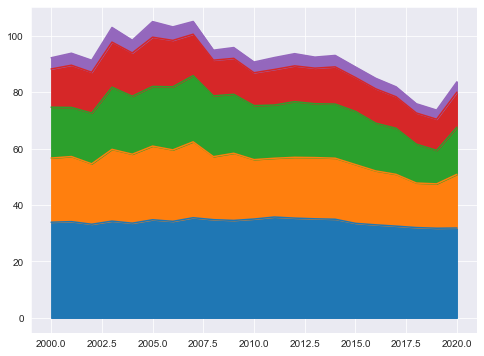

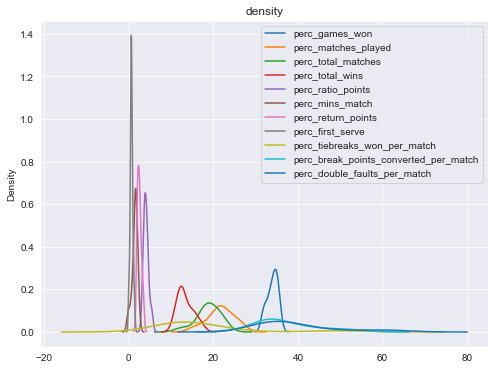

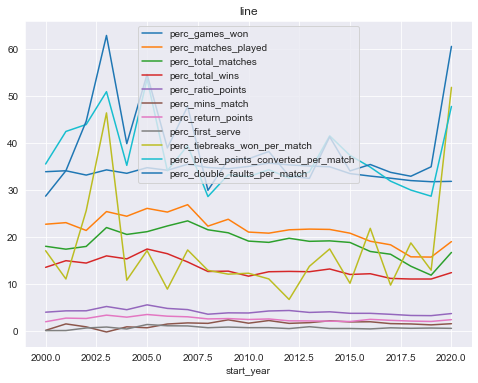

In [344]:
kinds = ["area","density", "line"]
for i in kinds:
    try:
        df_perc_byyear.plot(kind=i,figsize=(8,6), title=i)
    except ValueError:
        pass
plt.show()

In [345]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical = ['object']
df_num = df_reduced_EDA.select_dtypes(include=numerics)
df_cat = df_reduced_EDA.select_dtypes(include=categorical)

In [87]:
df_reduced_EDA["start_date"] = pd.to_datetime(df_reduced_EDA["start_date"], format="%Y-%m-%d")

In [347]:
# using groupby and apply to count the nan values 
nan_byyear = df_reduced_EDA[["ratio_points_winner_coming_up_year","ratio_points_loser_coming_up_year",
        "mins_match_winner_coming_up_year","mins_match_loser_coming_up_year",
        "perc_return_points_winner_coming_up_year","perc_return_points_loser_coming_up_year",
        "perc_first_serve_winner_coming_up_year","perc_first_serve_loser_coming_up_year",
        'tiebreaks_won_winner_coming_up_year_per_match','tiebreaks_won_loser_coming_up_year_per_match',
       'break_points_converted_winner_coming_up_year_per_match','break_points_converted_loser_coming_up_year_per_match',
       'double_faults_winner_coming_up_year_per_match','double_faults_loser_coming_up_year_per_match'
        ]].groupby(df_reduced_EDA["start_year"]).apply(lambda x: x.isna().sum())

In [348]:
# using groupby and apply to count the nan values 
nan_bysurface = df_reduced_EDA[["ratio_points_winner_coming_up_year","ratio_points_loser_coming_up_year",
        "mins_match_winner_coming_up_year","mins_match_loser_coming_up_year",
        "perc_return_points_winner_coming_up_year","perc_return_points_loser_coming_up_year",
        "perc_first_serve_winner_coming_up_year","perc_first_serve_loser_coming_up_year",
        'tiebreaks_won_winner_coming_up_year_per_match','tiebreaks_won_loser_coming_up_year_per_match',
       'break_points_converted_winner_coming_up_year_per_match','break_points_converted_loser_coming_up_year_per_match',
       'double_faults_winner_coming_up_year_per_match','double_faults_loser_coming_up_year_per_match'
        ]].groupby(df_reduced_EDA["surface"]).apply(lambda x: x.isna().sum())

In [350]:
nan_byyear

,ratio_points_winner_coming_up_year,ratio_points_loser_coming_up_year,mins_match_winner_coming_up_year,mins_match_loser_coming_up_year,perc_return_points_winner_coming_up_year,perc_return_points_loser_coming_up_year,perc_first_serve_winner_coming_up_year,perc_first_serve_loser_coming_up_year,tiebreaks_won_winner_coming_up_year_per_match,tiebreaks_won_loser_coming_up_year_per_match,break_points_converted_winner_coming_up_year_per_match,break_points_converted_loser_coming_up_year_per_match,double_faults_winner_coming_up_year_per_match,double_faults_loser_coming_up_year_per_match
start_year,,,,,,,,,,,,,,
2000,131,249,131,249,131,249,131,249,131,249,131,249,131,249
2001,90,197,90,197,90,197,90,197,90,197,90,197,90,197
2002,78,181,78,181,78,181,78,181,78,181,78,181,78,181
2003,98,238,98,238,98,238,98,238,98,238,98,238,98,238
2004,108,228,108,228,108,228,108,228,108,228,108,228,108,228
2005,88,196,88,196,88,196,88,196,88,196,88,196,88,196
2006,109,262,109,262,109,262,109,262,109,262,109,262,109,262
2007,364,667,364,667,364,667,364,667,364,667,364,667,364,667
2008,339,613,339,613,339,613,339,613,339,613,339,613,339,613


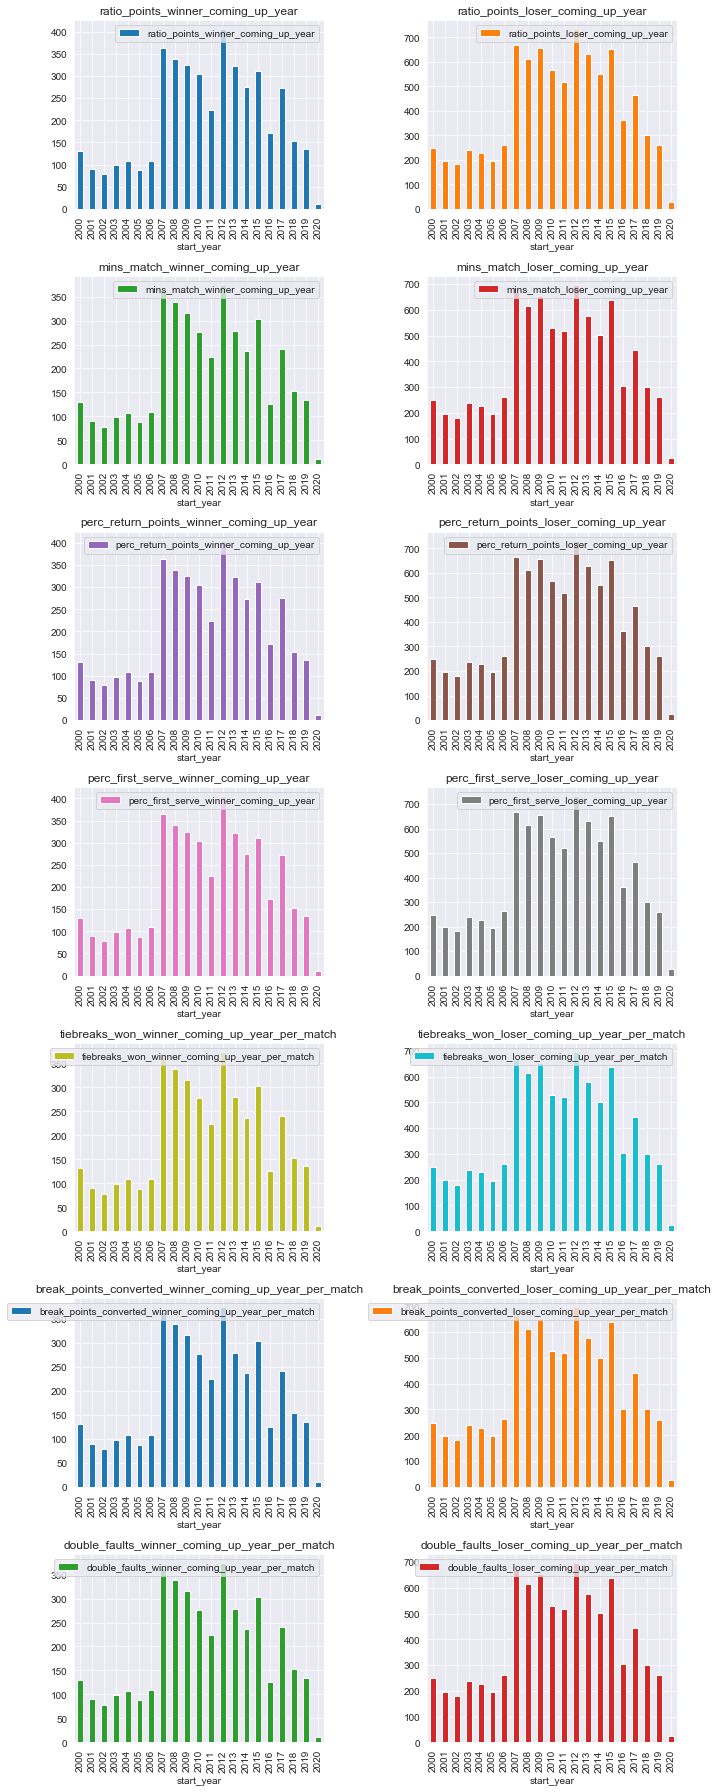

In [351]:
nan_byyear.plot(kind="bar",layout=(7,2), subplots=True, figsize=(10,25), sharex=False)
plt.tight_layout()
plt.savefig("distribution_nans_byyear.png")
plt.show()

In [352]:
nan_bysurface

,ratio_points_winner_coming_up_year,ratio_points_loser_coming_up_year,mins_match_winner_coming_up_year,mins_match_loser_coming_up_year,perc_return_points_winner_coming_up_year,perc_return_points_loser_coming_up_year,perc_first_serve_winner_coming_up_year,perc_first_serve_loser_coming_up_year,tiebreaks_won_winner_coming_up_year_per_match,tiebreaks_won_loser_coming_up_year_per_match,break_points_converted_winner_coming_up_year_per_match,break_points_converted_loser_coming_up_year_per_match,double_faults_winner_coming_up_year_per_match,double_faults_loser_coming_up_year_per_match
surface,,,,,,,,,,,,,,
Clay,1402,2950,1402,2950,1402,2950,1402,2950,1402,2950,1402,2950,1402,2950
Grass,1528,2335,1295,2056,1528,2335,1528,2335,1295,2056,1295,2056,1295,2056
Hard,1383,3269,1383,3269,1387,3271,1383,3269,1383,3269,1383,3269,1383,3269


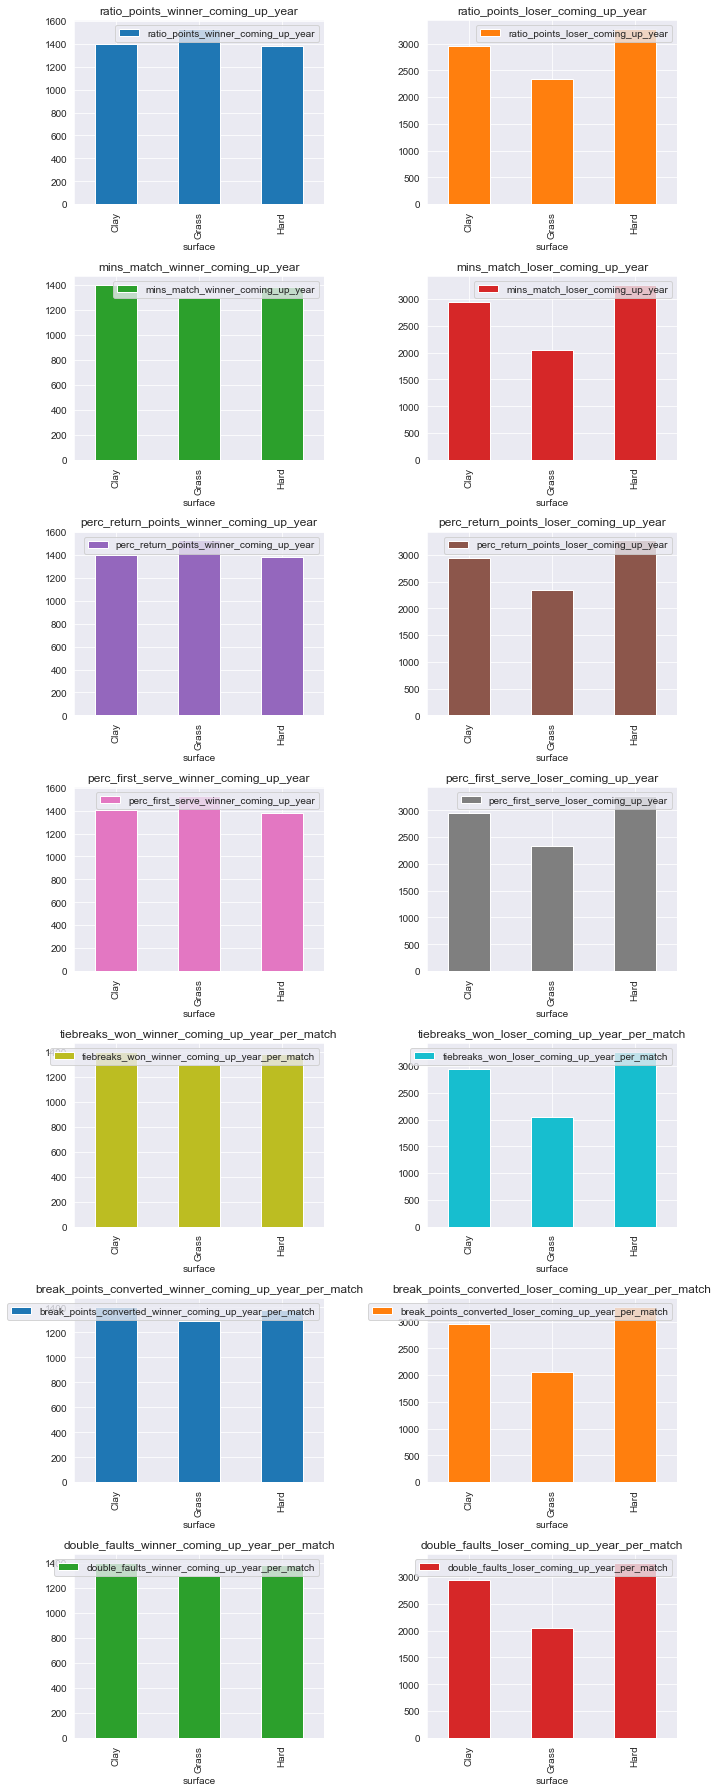

In [353]:
nan_bysurface.plot(kind="bar", layout=(7,2), subplots=True, figsize=(10,25), sharex=False)
plt.tight_layout()
plt.savefig("distribution_nans_bysurface.png")
plt.show()

In [6]:
df_reduced_EDA

,tourney_name,start_date,start_year,tourney_round_name,surface,inout,total_mins_match,winner_name,loser_name,winner_games_won,loser_games_won,perc_wins_winner_coming_up_year,matches_played_winner_coming_up_year,perc_wins_loser_coming_up_year,matches_played_loser_coming_up_year,total_matches_played_winner_coming_up_year,total_matches_played_loser_coming_up_year,ratio_points_winner_coming_up_year,ratio_points_loser_coming_up_year,mins_match_winner_coming_up_year,mins_match_loser_coming_up_year,perc_return_points_winner_coming_up_year,perc_return_points_loser_coming_up_year,perc_first_serve_winner_coming_up_year,perc_first_serve_loser_coming_up_year,tiebreaks_won_winner_coming_up_year_per_match,tiebreaks_won_loser_coming_up_year_per_match,break_points_converted_winner_coming_up_year_per_match,break_points_converted_loser_coming_up_year_per_match,double_faults_winner_coming_up_year_per_match,double_faults_loser_coming_up_year_per_match
0,Doha,2000-01-03,2000,Finals,Hard,Outdoor,118.000000,Fabrice Santoro,Rainer Schuettler,13.0,11.0,66.666667,33,52.173913,23,46,41,1.043974,1.075840,99.666667,89.652174,38.786632,40.503653,57.196052,59.328341,0.005510,0.007561,0.126722,0.185255,0.073462,0.128544
1,Doha,2000-01-03,2000,Semi-Finals,Hard,Outdoor,99.000000,Fabrice Santoro,Nicolas Kiefer,13.0,9.0,66.666667,33,75.000000,52,46,63,1.043974,1.178143,99.666667,105.192308,38.786632,42.210957,57.196052,50.552689,0.005510,0.005178,0.126722,0.080991,0.073462,0.080621
2,Doha,2000-01-03,2000,Semi-Finals,Hard,Outdoor,155.000000,Rainer Schuettler,Younes El Aynaoui,18.0,15.0,52.173913,23,40.000000,10,41,46,1.075840,0.991963,89.652174,114.500000,40.503653,33.657674,59.328341,62.866377,0.007561,0.030000,0.185255,0.390000,0.128544,0.410000
3,Doha,2000-01-03,2000,Quarter-Finals,Hard,Outdoor,67.000000,Nicolas Kiefer,Sjeng Schalken,12.0,1.0,75.000000,52,50.000000,32,63,48,1.178143,1.073817,105.192308,84.968750,42.210957,39.261843,50.552689,62.565253,0.005178,0.003906,0.080991,0.129883,0.080621,0.099609
4,Doha,2000-01-03,2000,Quarter-Finals,Hard,Outdoor,78.000000,Fabrice Santoro,George Bastl,12.0,6.0,66.666667,33,55.555556,9,46,10,1.043974,1.067728,99.666667,98.666667,38.786632,39.329995,57.196052,64.203398,0.005510,0.037037,0.126722,0.456790,0.073462,0.370370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71289,Santiago,2020-02-24,2020,2nd Round Qualifying,Clay,Outdoor,99.883333,Carlos Taberner,Andrea Collarini,12.0,5.0,50.000000,2,NaN,0,3,0,0.934441,NaN,127.466667,NaN,37.186717,NaN,63.533835,NaN,0.250000,NaN,2.500000,NaN,2.500000,NaN
71290,Santiago,2020-02-24,2020,1st Round Qualifying,Clay,Outdoor,45.766667,Juan Pablo Varillas,Matias Gaedechens,13.0,8.0,100.000000,1,NaN,0,1,0,1.200000,NaN,114.050000,NaN,39.534884,NaN,63.235294,NaN,0.000000,NaN,2.000000,NaN,2.000000,NaN
71291,Santiago,2020-02-24,2020,1st Round Qualifying,Clay,Outdoor,46.366667,Martin Klizan,Vadym Ursu,13.0,6.0,40.000000,15,NaN,0,21,0,0.977717,NaN,126.600000,NaN,37.508269,NaN,58.453637,NaN,0.022222,NaN,0.311111,NaN,0.297778,NaN
71292,Santiago,2020-02-24,2020,1st Round Qualifying,Clay,Outdoor,100.483333,Filip Horansky,Gonzalo Lama,12.0,3.0,20.000000,5,NaN,0,10,0,0.867530,NaN,87.956667,NaN,39.358247,NaN,59.906108,NaN,0.040000,NaN,0.880000,NaN,0.800000,NaN


In [61]:
pivot_players = pd.pivot_table(df_reduced_EDA, index=["start_year","winner_name"], values=["perc_wins_winner_coming_up_year","matches_played_winner_coming_up_year","ratio_points_winner_coming_up_year","mins_match_winner_coming_up_year","perc_return_points_winner_coming_up_year","break_points_converted_winner_coming_up_year_per_match"], aggfunc="mean").sort_values(by=["matches_played_winner_coming_up_year","perc_wins_winner_coming_up_year"], ascending=False).reset_index()

In [62]:
pivot_players.dropna(how="any", inplace=True)

In [63]:
pivot_players

,start_year,winner_name,break_points_converted_winner_coming_up_year_per_match,matches_played_winner_coming_up_year,mins_match_winner_coming_up_year,perc_return_points_winner_coming_up_year,perc_wins_winner_coming_up_year,ratio_points_winner_coming_up_year
0,2019,Daniil Medvedev,0.194225,49.236364,99.019304,39.568887,67.637248,1.152262
1,2020,Daniil Medvedev,0.076712,49.000000,99.738696,40.934402,77.521739,1.248511
2,2014,Juan Martin del Potro,0.068674,48.333333,113.798637,38.975194,79.279655,1.174784
3,2020,Andrey Rublev,0.073409,46.600000,104.293796,39.712362,69.528215,1.132586
4,2020,Stefanos Tsitsipas,0.059259,45.000000,106.088889,34.491082,66.666667,1.114004
...,...,...,...,...,...,...,...,...
5932,2017,Calvin Hemery,5.000000,0.250000,106.000000,30.769231,0.000000,0.795181
5933,2017,Riccardo Bellotti,5.000000,0.250000,63.000000,37.254902,0.000000,0.703125
5934,2012,Marcel Felder,5.000000,0.200000,70.000000,15.151515,0.000000,0.456140
5935,2007,Prakash Amritraj,1.000000,0.166667,82.000000,23.880597,0.000000,0.814286


In [18]:
filt = (pivot_players["matches_played_winner_coming_up_year"] > 20)

In [64]:
pivot_players["matches_won"] = pivot_players["matches_played_winner_coming_up_year"]*pivot_players["perc_wins_winner_coming_up_year"]/100

In [65]:
pivot_players.sort_values(by="matches_won", ascending=False, inplace=True)

In [66]:
pivot_top20_player_years = pivot_players.iloc[:20,:]

In [67]:
pivot_top20_player_years["start_year"] = pivot_top20_player_years["start_year"].astype("str")

In [78]:
pivot_top20_player_years.sort_values(by="ratio_points_winner_coming_up_year", ascending=False, inplace=True)

graph for break_points_converted_winner_coming_up_year_per_match


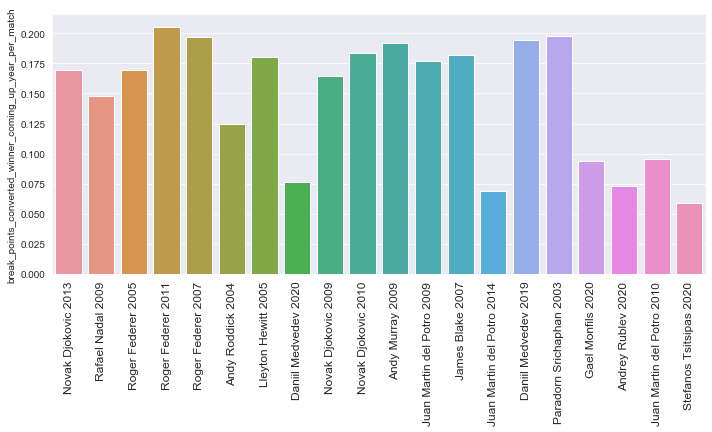

graph for matches_played_winner_coming_up_year


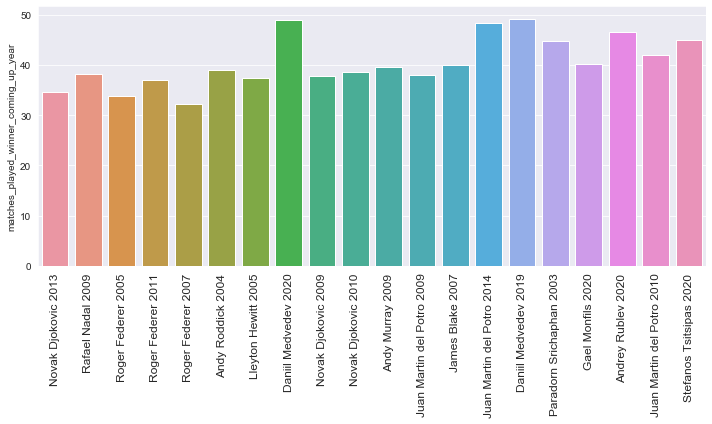

graph for mins_match_winner_coming_up_year


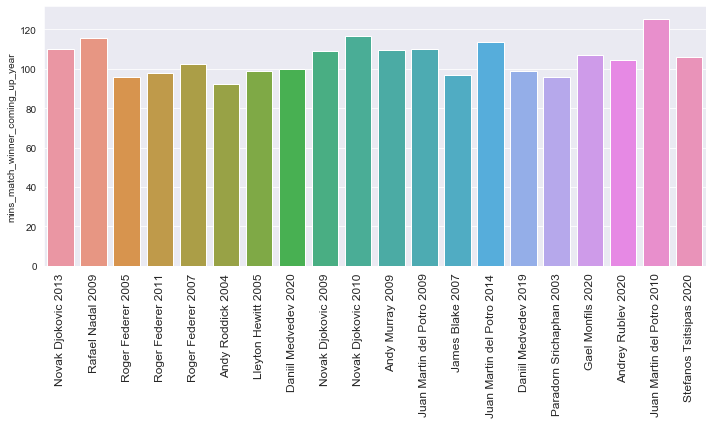

graph for perc_return_points_winner_coming_up_year


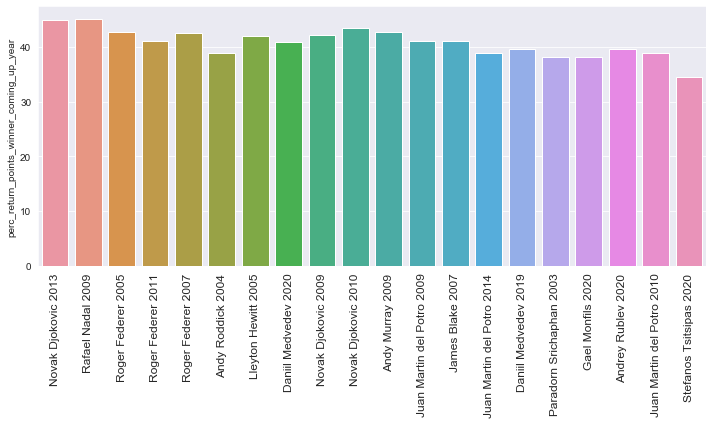

graph for perc_wins_winner_coming_up_year


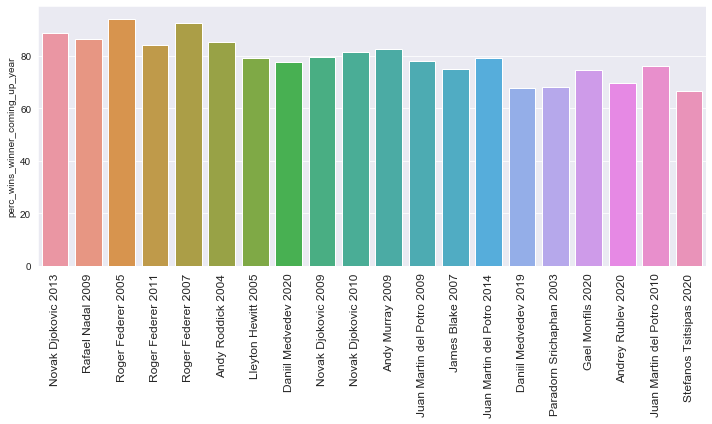

graph for ratio_points_winner_coming_up_year


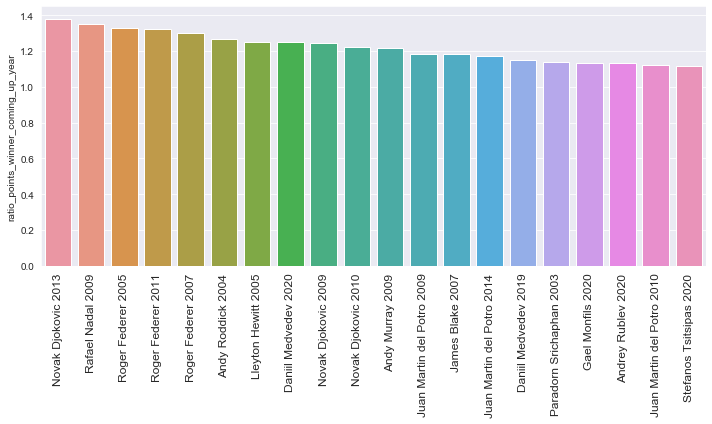

graph for matches_won


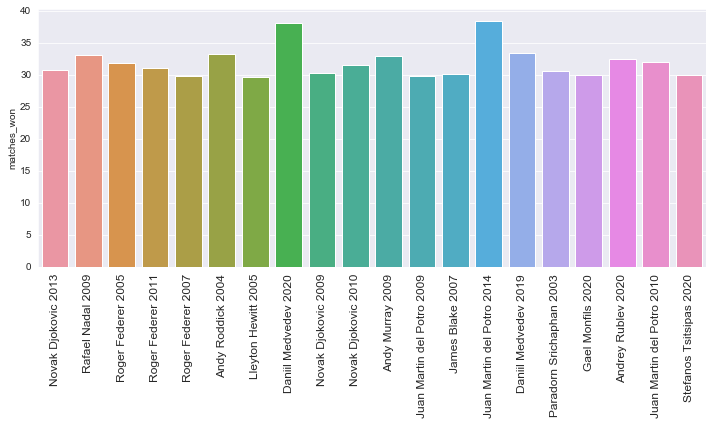

In [86]:
plt.rcParams["figure.figsize"] = (10,6)

vals = ["break_points_converted_winner_coming_up_year_per_match","matches_played_winner_coming_up_year","mins_match_winner_coming_up_year","perc_return_points_winner_coming_up_year","perc_wins_winner_coming_up_year","ratio_points_winner_coming_up_year","matches_won"]

for i in vals:
    f=sns.barplot(x=(pivot_top20_player_years["winner_name"] + " " + pivot_top20_player_years["start_year"]), y=pivot_top20_player_years[i])
    print("graph for %s" % (i))
    f.set_xticklabels((pivot_top20_player_years["winner_name"] + " " + pivot_top20_player_years["start_year"]), rotation=90, fontsize=12)
    plt.tight_layout()
    plt.show()

In [91]:
# nan are common to all the columns. We can remove them
df_nonan = df_reduced_EDA.dropna(how="any")

In [92]:
df_nonan.reset_index(inplace=True)

In [94]:
df_nonan.drop("index", axis=1, inplace=True)

In [95]:
df_nonan.to_csv("df_nonan.csv", index=False)

In [96]:
df_nonan

,tourney_name,start_date,start_year,tourney_round_name,surface,inout,total_mins_match,winner_name,loser_name,winner_games_won,loser_games_won,perc_wins_winner_coming_up_year,matches_played_winner_coming_up_year,perc_wins_loser_coming_up_year,matches_played_loser_coming_up_year,total_matches_played_winner_coming_up_year,total_matches_played_loser_coming_up_year,ratio_points_winner_coming_up_year,ratio_points_loser_coming_up_year,mins_match_winner_coming_up_year,mins_match_loser_coming_up_year,perc_return_points_winner_coming_up_year,perc_return_points_loser_coming_up_year,perc_first_serve_winner_coming_up_year,perc_first_serve_loser_coming_up_year,tiebreaks_won_winner_coming_up_year_per_match,tiebreaks_won_loser_coming_up_year_per_match,break_points_converted_winner_coming_up_year_per_match,break_points_converted_loser_coming_up_year_per_match,double_faults_winner_coming_up_year_per_match,double_faults_loser_coming_up_year_per_match
0,Doha,2000-01-03,2000,Finals,Hard,Outdoor,118.000000,Fabrice Santoro,Rainer Schuettler,13.0,11.0,66.666667,33,52.173913,23,46,41,1.043974,1.075840,99.666667,89.652174,38.786632,40.503653,57.196052,59.328341,0.005510,0.007561,0.126722,0.185255,0.073462,0.128544
1,Doha,2000-01-03,2000,Semi-Finals,Hard,Outdoor,99.000000,Fabrice Santoro,Nicolas Kiefer,13.0,9.0,66.666667,33,75.000000,52,46,63,1.043974,1.178143,99.666667,105.192308,38.786632,42.210957,57.196052,50.552689,0.005510,0.005178,0.126722,0.080991,0.073462,0.080621
2,Doha,2000-01-03,2000,Semi-Finals,Hard,Outdoor,155.000000,Rainer Schuettler,Younes El Aynaoui,18.0,15.0,52.173913,23,40.000000,10,41,46,1.075840,0.991963,89.652174,114.500000,40.503653,33.657674,59.328341,62.866377,0.007561,0.030000,0.185255,0.390000,0.128544,0.410000
3,Doha,2000-01-03,2000,Quarter-Finals,Hard,Outdoor,67.000000,Nicolas Kiefer,Sjeng Schalken,12.0,1.0,75.000000,52,50.000000,32,63,48,1.178143,1.073817,105.192308,84.968750,42.210957,39.261843,50.552689,62.565253,0.005178,0.003906,0.080991,0.129883,0.080621,0.099609
4,Doha,2000-01-03,2000,Quarter-Finals,Hard,Outdoor,78.000000,Fabrice Santoro,George Bastl,12.0,6.0,66.666667,33,55.555556,9,46,10,1.043974,1.067728,99.666667,98.666667,38.786632,39.329995,57.196052,64.203398,0.005510,0.037037,0.126722,0.456790,0.073462,0.370370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60098,Santiago,2020-02-24,2020,Round of 32,Clay,Outdoor,151.033333,Thiago Monteiro,Leonardo Mayer,15.0,15.0,50.000000,14,43.750000,16,27,26,1.081242,0.984717,104.997619,153.187500,40.432781,33.369406,66.205473,57.649446,0.010204,0.023438,0.290816,0.187500,0.163265,0.339844
60099,Santiago,2020-02-24,2020,Round of 32,Clay,Outdoor,158.000000,Roberto Carballes Baena,Jaume Munar,15.0,8.0,57.894737,19,47.368421,19,38,33,1.037461,1.057579,115.589474,127.632456,39.138604,39.963279,65.186031,60.619968,0.011080,0.022161,0.227147,0.221607,0.132964,0.108033
60100,Santiago,2020-02-24,2020,Round of 32,Clay,Outdoor,106.600000,Thiago Seyboth Wild,Facundo Bagnis,12.0,5.0,25.000000,4,66.666667,12,4,14,0.962990,1.026611,117.012500,98.026389,32.526185,39.797084,55.790665,61.457055,0.000000,0.013889,0.750000,0.347222,0.500000,0.208333
60101,Santiago,2020-02-24,2020,2nd Round Qualifying,Clay,Outdoor,83.933333,Martin Klizan,Orlando Luz,12.0,0.0,40.000000,15,0.000000,1,21,1,0.977717,0.739130,126.600000,82.250000,37.508269,23.529412,58.453637,56.521739,0.022222,0.000000,0.311111,3.000000,0.297778,4.000000


In [355]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical = ['object']
df_num = df_nonan.select_dtypes(include=numerics)
df_cat = df_nonan.select_dtypes(include=categorical)

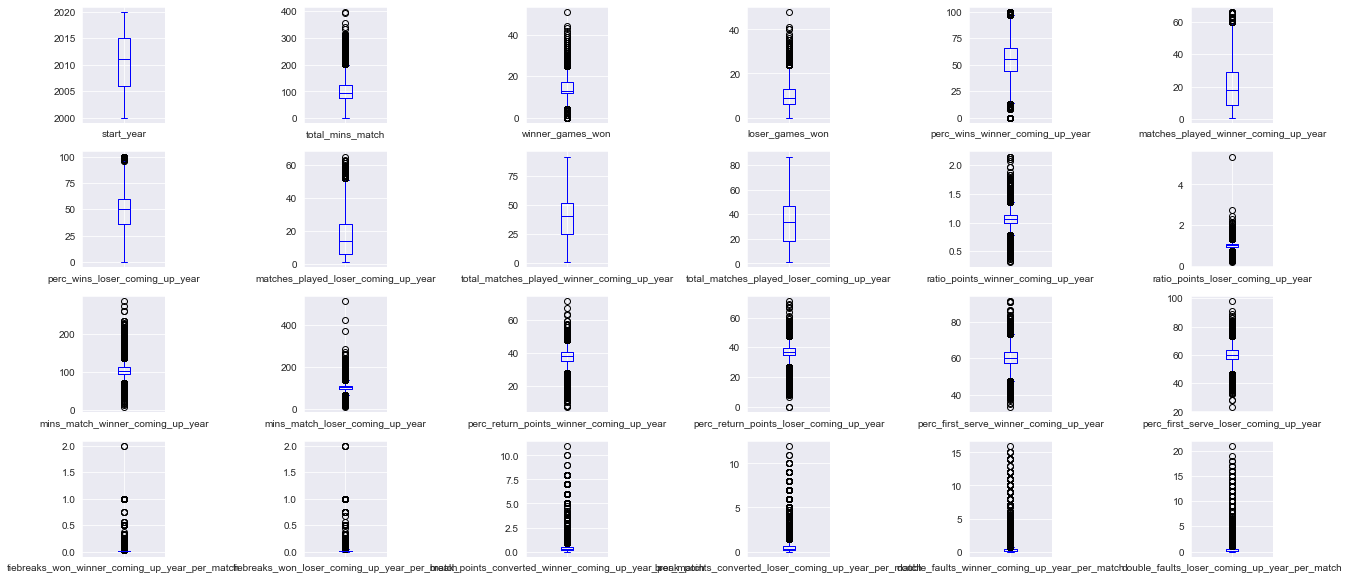

In [356]:
df_nonan.plot(kind='box', subplots=True, layout=(10,6), sharex=False, sharey=False, figsize=(18,20), color="b")
plt.tight_layout()
# plt.savefig("boxplots", dpi=400)
plt.show()

In [357]:
# lets remove couple of clear outliers
filt1 = df_nonan["mins_match_loser_coming_up_year"] > 400

In [358]:
df_nonan = df_nonan.loc[~filt1]

In [359]:
df_nonan.reset_index(inplace=True)

In [360]:
df_nonan.drop("index", axis=1, inplace=True)

In [361]:
df_nonan["start_year"] = df_nonan["start_year"].astype("str")

In [362]:
df_nonan["surface"].unique()

array(['Hard', 'Clay', 'Grass'], dtype=object)

In [363]:
df_num = df_nonan.select_dtypes(include=numerics)
df_cat = df_nonan.select_dtypes(include=categorical)

Lets continue checking the distribution of our data. We can appreciate skewness on some variables

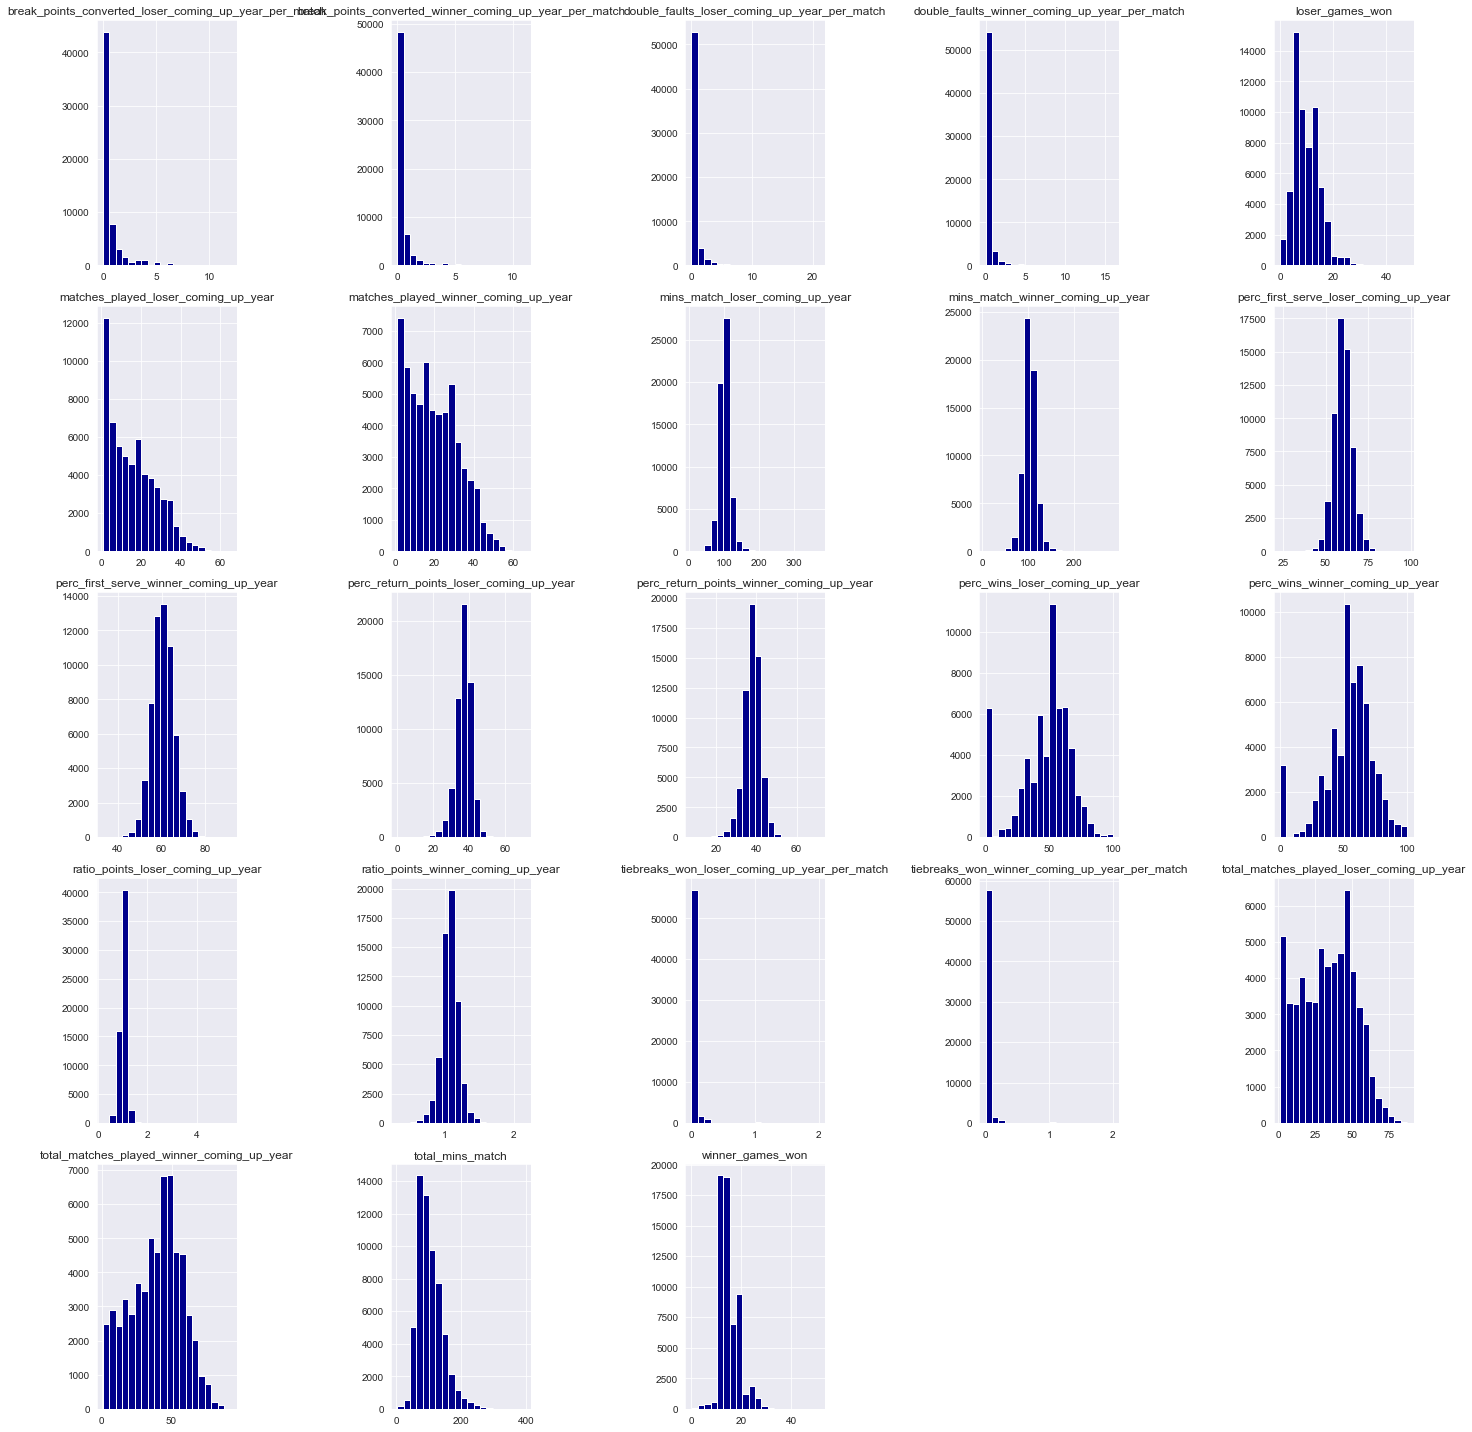

In [364]:
plt.rcParams["figure.figsize"] = (20,20)
df_num.hist(color="darkblue", bins=20)
plt.tight_layout()
plt.savefig("hist_no_transform.png")
plt.show()

we can quantify the skeness for each variable using the skew func

In [365]:
print("Skewness")
for i in df_num.columns:
    print("{}:".format(i), df_nonan[i].skew()) 

Skewness
total_mins_match: 1.0521952739291536
winner_games_won: 1.244873446282601
loser_games_won: 0.8250710688062841
perc_wins_winner_coming_up_year: -0.7904549108764679
matches_played_winner_coming_up_year: 0.443090873745455
perc_wins_loser_coming_up_year: -0.7936931967455103
matches_played_loser_coming_up_year: 0.6441193810246915
total_matches_played_winner_coming_up_year: -0.19702294205021495
total_matches_played_loser_coming_up_year: -0.017541154526506036
ratio_points_winner_coming_up_year: -0.018501760216432076
ratio_points_loser_coming_up_year: 0.2493956766890577
mins_match_winner_coming_up_year: 0.8223040701632525
mins_match_loser_coming_up_year: 0.836130266569503
perc_return_points_winner_coming_up_year: -0.5035271885263047
perc_return_points_loser_coming_up_year: -0.717233496572931
perc_first_serve_winner_coming_up_year: 0.11255525180222502
perc_first_serve_loser_coming_up_year: 0.05911060920836334
tiebreaks_won_winner_coming_up_year_per_match: 11.365463520061503
tiebreaks_wo

In [366]:
from scipy import stats 
from scipy.special import boxcox, inv_boxcox 

print("Skewness")

print("====================================================")

for i in df_num.columns:
    print("{} sqrt transformed:".format(i), np.sqrt(df_nonan[i]).skew())
    
print("====================================================")

for i in df_num.columns:
    print("{} boxcox transformed:".format(i), boxcox(df_nonan[i],0).skew())

Skewness
total_mins_match sqrt transformed: 0.4206594498089959
winner_games_won sqrt transformed: 0.23690520982990737
loser_games_won sqrt transformed: -0.06892690481138404
perc_wins_winner_coming_up_year sqrt transformed: -2.319922716606343
matches_played_winner_coming_up_year sqrt transformed: -0.1826365085988335
perc_wins_loser_coming_up_year sqrt transformed: -1.7983550584656918
matches_played_loser_coming_up_year sqrt transformed: 0.002469271850185053
total_matches_played_winner_coming_up_year sqrt transformed: -0.839401611573231
total_matches_played_loser_coming_up_year sqrt transformed: -0.6402406796119712
ratio_points_winner_coming_up_year sqrt transformed: -0.432015140359639
ratio_points_loser_coming_up_year sqrt transformed: -0.7066791120837667
mins_match_winner_coming_up_year sqrt transformed: 0.16293823530919296
mins_match_loser_coming_up_year sqrt transformed: 0.038163871093905476
perc_return_points_winner_coming_up_year sqrt transformed: -0.9069305110469027
perc_return_po

As we can see, not all columns benefit from the transformation: The ones that do are the following:
        
total_mins_match,
winner_games_won,loser_games_won,
mins_match_winner_coming_up_year,mins_match_loser_coming_up_year,
matches_played_winner_coming_up_year,matches_played_loser_coming_up_year,
mins_match_winner_coming_up_year,mins_match_loser_coming_up_year,
perc_first_serve_winner_coming_up_year,perc_first_serve_loser_coming_up_year

In [367]:
sqrt_list = ["total_mins_match",
"winner_games_won","loser_games_won",
"matches_played_winner_coming_up_year","matches_played_loser_coming_up_year",
"mins_match_winner_coming_up_year","mins_match_loser_coming_up_year",
"perc_first_serve_winner_coming_up_year","perc_first_serve_loser_coming_up_year",
'tiebreaks_won_winner_coming_up_year_per_match','tiebreaks_won_loser_coming_up_year_per_match',
'break_points_converted_winner_coming_up_year_per_match','break_points_converted_loser_coming_up_year_per_match',
'double_faults_winner_coming_up_year_per_match','double_faults_loser_coming_up_year_per_match']

Lets generate a new df with our data sqrt transformed

In [368]:
for i in sqrt_list:
    df_num[i] = np.sqrt(df_num[i])

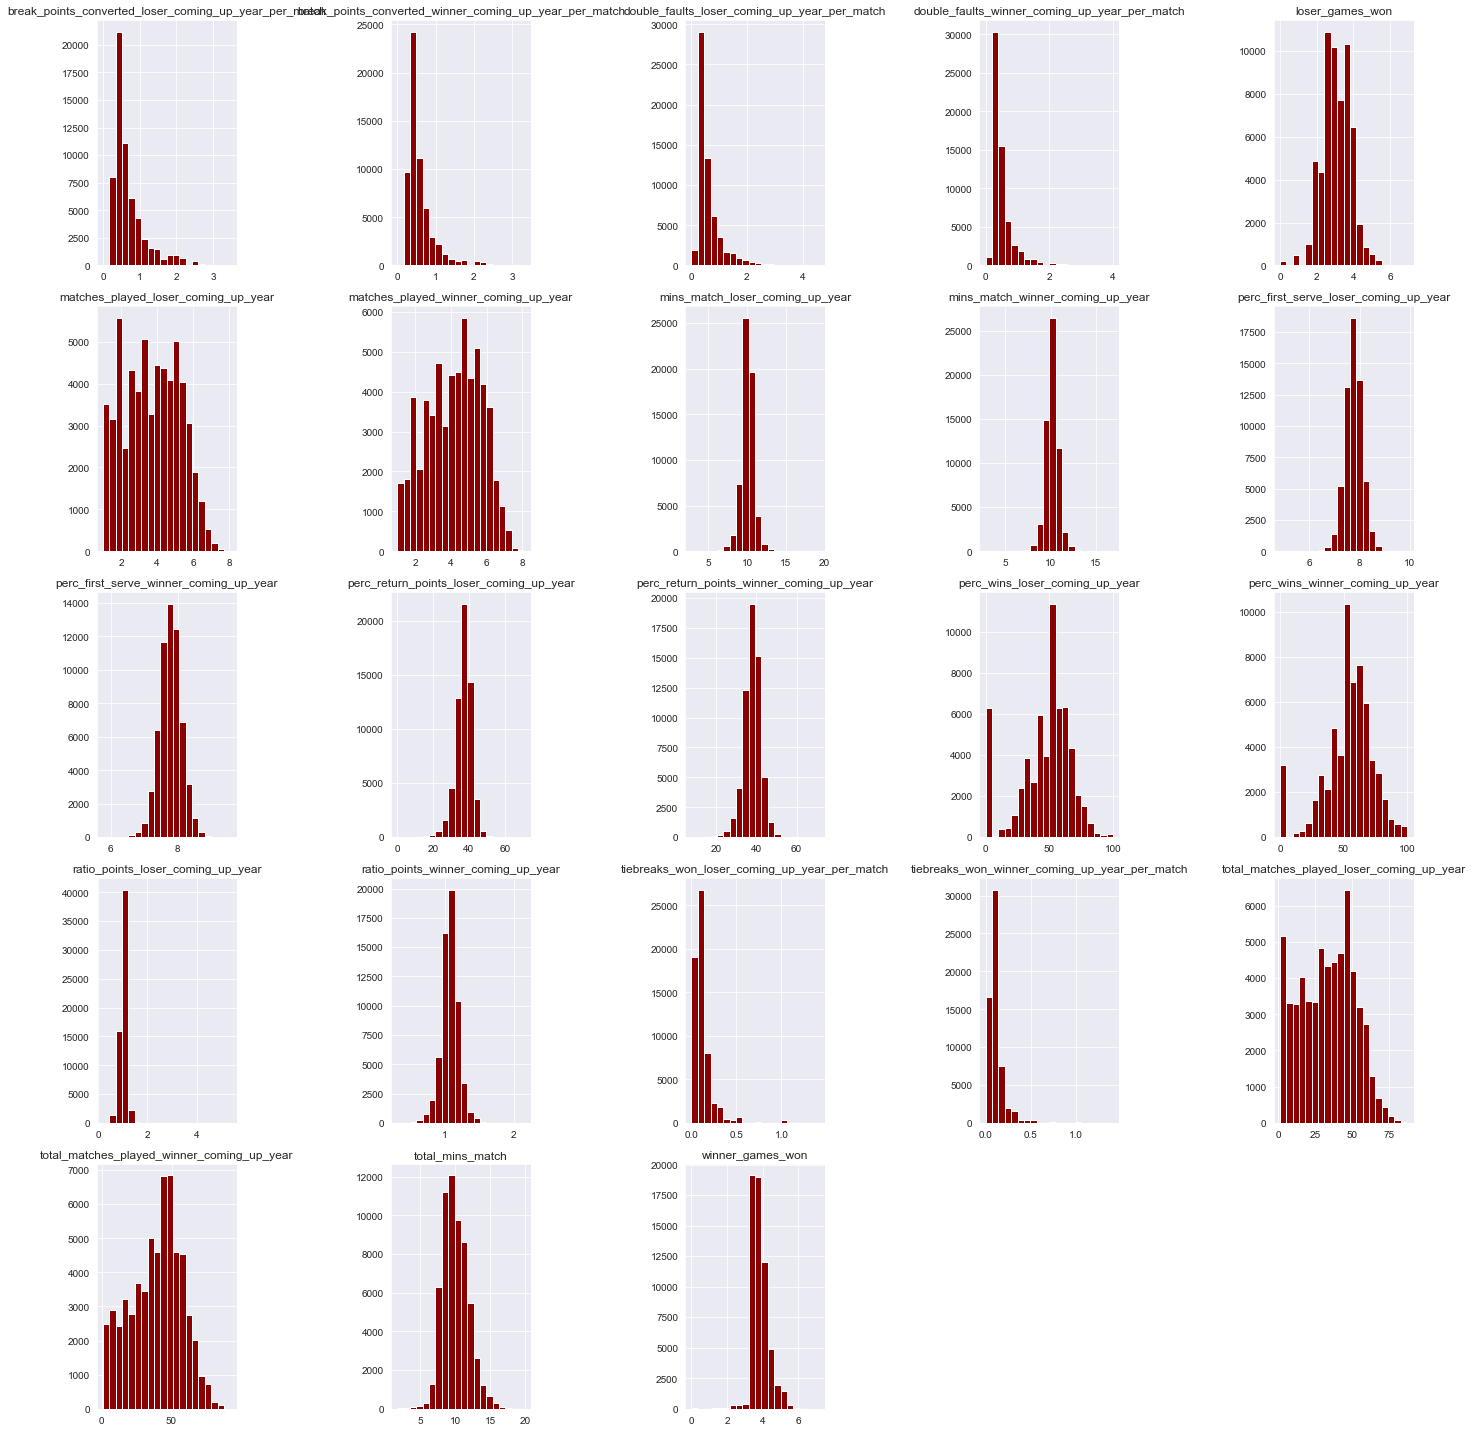

In [369]:
df_num.hist(color="darkred", bins=20)
plt.rcParams["figure.figsize"] = (20,20)
plt.tight_layout()
plt.savefig("hist_sqrt.png")
plt.show()

Next, to see the corr among variables, it is very useful to use a corr plot. We can observe that the data correlates as expected and the selected variables are candidates to predict the winner

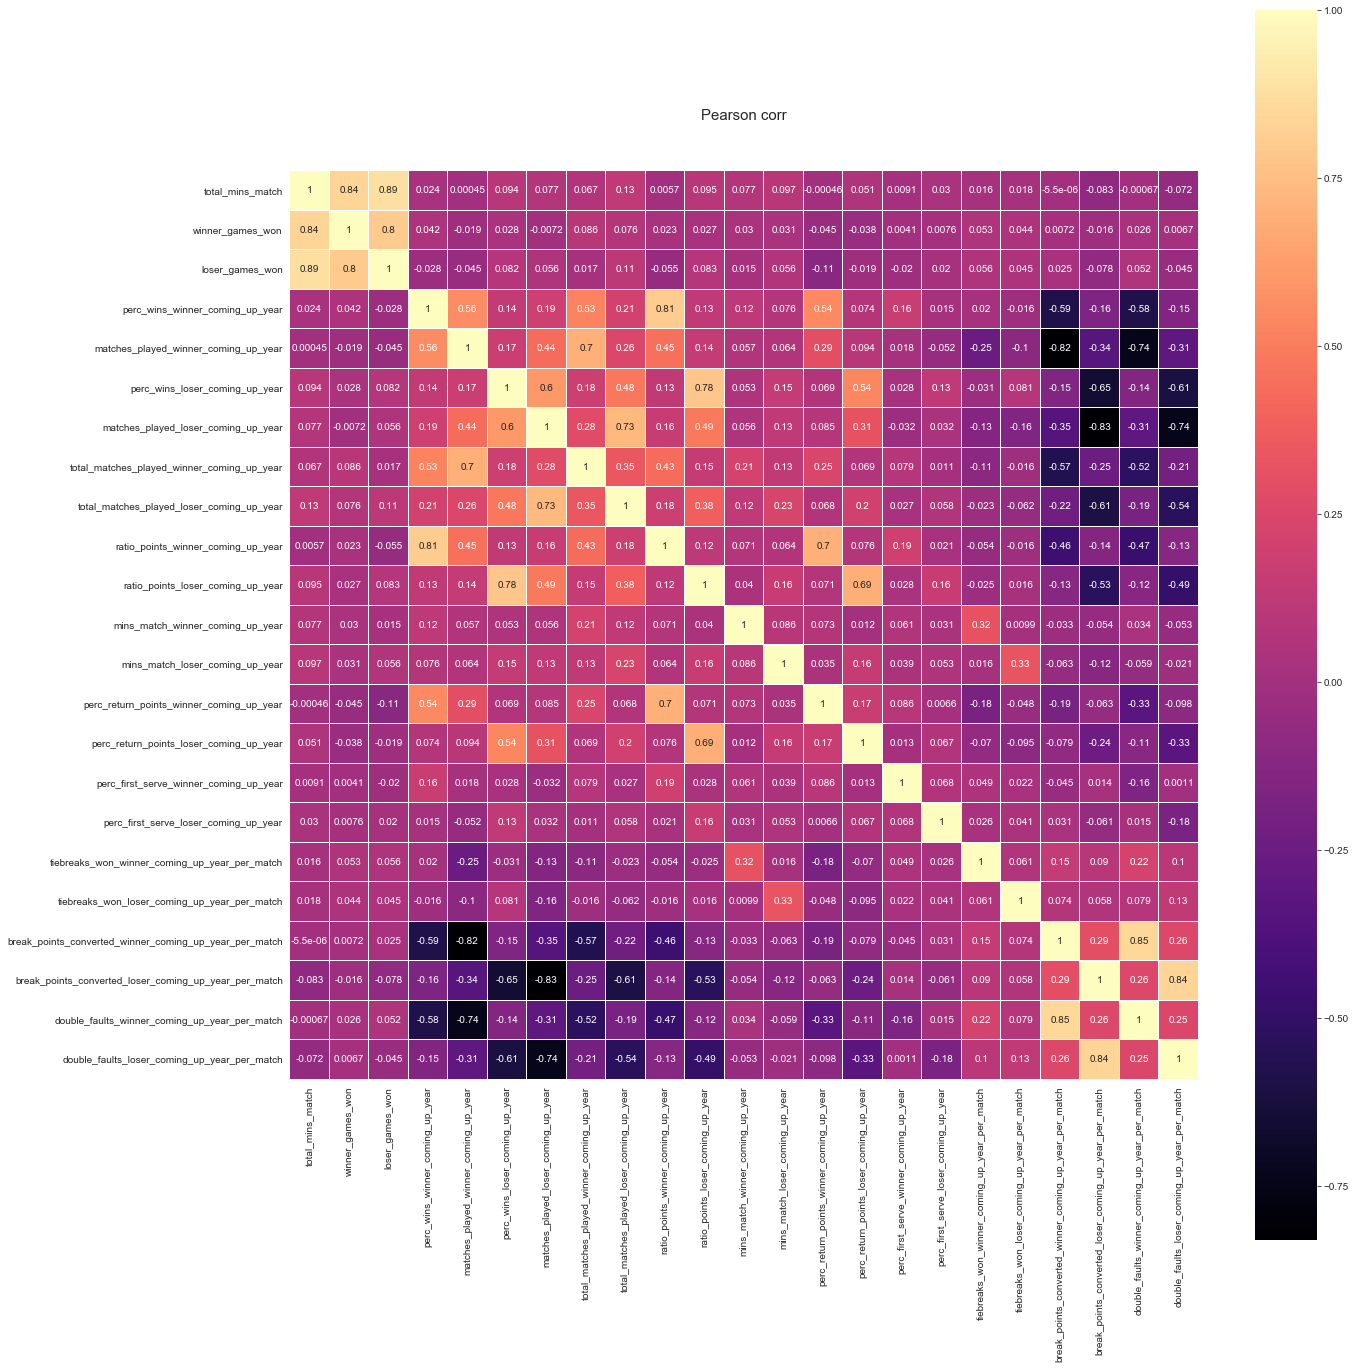

In [370]:
colormap=plt.cm.magma
f, ax = plt.subplots(figsize=(20,20))
plt.title("Pearson corr", y=1.05, size=15)
ax = sns.heatmap(df_num.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor="white", annot=True)
plt.tight_layout()
plt.savefig("corr_sqrt.png", dpi=400)
plt.show()

In [371]:
df_num.describe()

,total_mins_match,winner_games_won,loser_games_won,perc_wins_winner_coming_up_year,matches_played_winner_coming_up_year,perc_wins_loser_coming_up_year,matches_played_loser_coming_up_year,total_matches_played_winner_coming_up_year,total_matches_played_loser_coming_up_year,ratio_points_winner_coming_up_year,ratio_points_loser_coming_up_year,mins_match_winner_coming_up_year,mins_match_loser_coming_up_year,perc_return_points_winner_coming_up_year,perc_return_points_loser_coming_up_year,perc_first_serve_winner_coming_up_year,perc_first_serve_loser_coming_up_year,tiebreaks_won_winner_coming_up_year_per_match,tiebreaks_won_loser_coming_up_year_per_match,break_points_converted_winner_coming_up_year_per_match,break_points_converted_loser_coming_up_year_per_match,double_faults_winner_coming_up_year_per_match,double_faults_loser_coming_up_year_per_match
count,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000,60101.000000
mean,9.996395,3.815380,3.038483,53.014098,4.129077,45.640253,3.668262,38.793115,32.719023,1.068516,1.022532,10.144492,10.051065,37.831603,36.850370,7.771101,7.745466,0.108720,0.110068,0.581654,0.688929,0.506506,0.607587
std,1.845690,0.489900,0.789645,19.611284,1.540174,20.793613,1.550971,18.290780,18.177720,0.126696,0.134194,0.732717,0.834871,4.235878,4.509537,0.328058,0.345064,0.098627,0.116105,0.359047,0.447847,0.364748,0.454575
min,1.732051,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.307692,0.196078,2.828427,2.828427,7.692308,0.000000,5.773503,4.822428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.660254,3.464102,2.449490,44.444444,3.000000,36.000000,2.449490,25.000000,18.000000,0.999609,0.956664,9.735696,9.622889,35.466270,34.530397,7.559716,7.533582,0.066667,0.057143,0.360656,0.394600,0.300000,0.331662
50%,9.797959,3.605551,3.000000,55.172414,4.242641,50.000000,3.741657,41.000000,34.000000,1.068704,1.032799,10.136993,10.066446,38.031944,37.184506,7.771446,7.745081,0.091233,0.091233,0.461684,0.529150,0.389872,0.448535
75%,11.180340,4.123106,3.605551,65.625000,5.385165,60.000000,4.898979,52.000000,47.000000,1.140365,1.101770,10.547512,10.494046,40.478552,39.715238,7.978970,7.963754,0.128565,0.133333,0.666667,0.816497,0.565685,0.707107
max,19.899749,7.141428,6.928203,100.000000,8.124038,100.000000,8.062258,92.000000,87.000000,2.154581,5.364286,16.881943,19.222383,71.014493,71.014493,9.555331,9.895285,1.414214,1.414214,3.316625,3.464102,4.000000,4.582576


In [372]:
df = pd.concat([df_cat, df_num], axis=1)

In [373]:
df_cat["surface"].unique()

array(['Hard', 'Clay', 'Grass'], dtype=object)

In [374]:
df.columns

Index(['tourney_name', 'start_year', 'tourney_round_name', 'surface', 'inout',
       'winner_name', 'loser_name', 'total_mins_match', 'winner_games_won',
       'loser_games_won', 'perc_wins_winner_coming_up_year',
       'matches_played_winner_coming_up_year',
       'perc_wins_loser_coming_up_year', 'matches_played_loser_coming_up_year',
       'total_matches_played_winner_coming_up_year',
       'total_matches_played_loser_coming_up_year',
       'ratio_points_winner_coming_up_year',
       'ratio_points_loser_coming_up_year', 'mins_match_winner_coming_up_year',
       'mins_match_loser_coming_up_year',
       'perc_return_points_winner_coming_up_year',
       'perc_return_points_loser_coming_up_year',
       'perc_first_serve_winner_coming_up_year',
       'perc_first_serve_loser_coming_up_year',
       'tiebreaks_won_winner_coming_up_year_per_match',
       'tiebreaks_won_loser_coming_up_year_per_match',
       'break_points_converted_winner_coming_up_year_per_match',
       'bre

In [375]:
df.drop(["winner_games_won", "loser_games_won", "total_mins_match"], axis=1, inplace=True)

In [443]:
df_winner = df[['tourney_name', 'start_year', 'tourney_round_name', 'surface', 'inout',
       'winner_name',
        'perc_wins_winner_coming_up_year',
       'matches_played_winner_coming_up_year',
        'total_matches_played_winner_coming_up_year',
       'ratio_points_winner_coming_up_year',
       'mins_match_winner_coming_up_year',
       'perc_return_points_winner_coming_up_year',
        'tiebreaks_won_winner_coming_up_year_per_match',
       'break_points_converted_winner_coming_up_year_per_match',
       'double_faults_winner_coming_up_year_per_match',
       ]]

In [444]:
# renaming the columns to prepare the df be joined in a single df
df_winner.rename({
        'winner_name': 'name',
        'perc_wins_winner_coming_up_year': 'perc_wins_coming_up_year', 
        'matches_played_winner_coming_up_year': 'matches_played_coming_up_year',
       'total_matches_played_winner_coming_up_year': 'total_matches_played_coming_up_year',
       'ratio_points_winner_coming_up_year': 'ratio_points_coming_up_year',
       'mins_match_winner_coming_up_year': 'mins_match_coming_up_year',
       'perc_return_points_winner_coming_up_year': 'perc_return_points_coming_up_year',
        'tiebreaks_won_winner_coming_up_year_per_match':'tiebreaks_won_coming_up_year_per_match',
        'break_points_converted_winner_coming_up_year_per_match':'break_points_converted_coming_up_year_per_match',
       'double_faults_winner_coming_up_year_per_match':'double_faults_coming_up_year_per_match',
}, axis=1, inplace=True)

In [445]:
df_loser = df[['tourney_name', 'start_year', 'tourney_round_name', 'surface', 'inout',
         'loser_name',
        'perc_wins_loser_coming_up_year', 
        'matches_played_loser_coming_up_year',
       'total_matches_played_loser_coming_up_year',
       'ratio_points_loser_coming_up_year',
       'mins_match_loser_coming_up_year',
       'perc_return_points_loser_coming_up_year',
        'tiebreaks_won_loser_coming_up_year_per_match',
        'break_points_converted_loser_coming_up_year_per_match',
        'double_faults_loser_coming_up_year_per_match']]

In [446]:
df_loser.rename({
       'loser_name': 'name',
        'perc_wins_loser_coming_up_year': 'perc_wins_coming_up_year', 
        'matches_played_loser_coming_up_year': 'matches_played_coming_up_year',
       'total_matches_played_loser_coming_up_year': 'total_matches_played_coming_up_year',
       'ratio_points_loser_coming_up_year': 'ratio_points_coming_up_year',
       'mins_match_loser_coming_up_year': 'mins_match_coming_up_year',
       'perc_return_points_loser_coming_up_year': 'perc_return_points_coming_up_year',
    'tiebreaks_won_loser_coming_up_year_per_match':'tiebreaks_won_coming_up_year_per_match',
        'break_points_converted_loser_coming_up_year_per_match':'break_points_converted_coming_up_year_per_match',
       'double_faults_loser_coming_up_year_per_match':'double_faults_coming_up_year_per_match'}, axis=1, inplace=True)

In [447]:
df_winner["result"] = 1

In [448]:
df_loser["result"] = 0

In [449]:
df_algo = pd.concat([df_winner,df_loser])

In [450]:
df_algo.reset_index(inplace=True)

In [451]:
df_algo.drop("index", axis=1, inplace=True)

In [452]:
df_algo.to_csv("df_algo2.csv", index=False)

In [386]:
df_algo = pd.read_csv("df_algo2.csv")

# 4. Model selection and tuning

Feature selection

In [417]:
df_algo.columns

Index(['tourney_name', 'start_year', 'tourney_round_name', 'surface', 'inout',
       'name', 'perc_wins_coming_up_year', 'matches_played_coming_up_year',
       'total_matches_played_coming_up_year', 'ratio_points_coming_up_year',
       'mins_match_coming_up_year', 'perc_return_points_coming_up_year',
       'tiebreaks_won_coming_up_year_per_match',
       'break_points_converted_coming_up_year_per_match',
       'double_faults_coming_up_year_per_match', 'result'],
      dtype='object')

In [453]:
df_algo.drop(["start_year", "tourney_name","tourney_round_name"], axis=1, inplace=True) # "difference_perc_wins_semester","start_date", "start_year", "tourney_name","tourney_round_name", "name"

In [454]:
target = df_algo["result"]

In [421]:
# check if dataset is balanced (what % of targets are 1s)
# targets.sum() will give us the number of 1s that there are
# the shape[0] will give us the length of the targets array
target.sum() / target.shape[0]

0.5

For categorical features, encoding is necessary for all the machine learning algorithms. But for numerical features, standardization(scaling) is not necessary for tree-based algorithms.

In [456]:
df_model = pd.get_dummies(df_algo) # dummies will encode all categorical variables

In [467]:
df_model.columns = df_model.columns.str.replace("name_", "")

In [468]:
df_model

,perc_wins_coming_up_year,matches_played_coming_up_year,total_matches_played_coming_up_year,ratio_points_coming_up_year,mins_match_coming_up_year,perc_return_points_coming_up_year,tiebreaks_won_coming_up_year_per_match,break_points_converted_coming_up_year_per_match,double_faults_coming_up_year_per_match,result,surface_Clay,surface_Grass,surface_Hard,inout_Indoor,inout_Outdoor,Abdulla Hajji,Abdullah Maqdes,Adam Chadaj,Adam El Mihdawy,Adam Feeney,Adam Kellner,Adam Kennedy,Adam Lee,Adam Pavlasek,Adam Sanjurjo Hermida,Adam Thompson,Adam Thornton-Brown,Adam Vejmelka,Admir Kalender,Adrian Andreev,Adrian Bodmer,Adrian Cruciat,Adrian Garcia,Adrian Mannarino,Adrian Menendez-Maceiras,Adrian Sikora,Adrian Ungur,Adrian Voinea,Adrian-Marin Dancescu,Adrien Bossel,Agustin Calleri,Agustin Velotti,Aisam-Ul-Haq Qureshi,Ajai Selvaraj,Akash Wagh,Akira Santillan,Alan Fernando Rubio Fierros,Alan Mackin,Alban Meuffels,Albano Olivetti,Albert Costa,Albert Montanes,Albert Portas,Albert Ramos-Vinolas,Alberto Berasategui,...,Wayne Odesnik,Weerapat Doakmaiklee,Werner Eschauer,Wesley Moodie,Wesley Whitehouse,Wil Spencer,William Blumberg,William Boe-Wiegaard,Wilson Leite,Wolfgang Schranz,Woong-Sun Jun,Xavier Malisse,Xin Gao,Xin-Yuan Yu,Ya-Nan Ma,Yan Bai,Yann Marti,Yannick Hanfmann,Yannick Jankovits,Yannick Maden,Yannick Mertens,Yannick Thomet,Yannik Reuter,Yaoki Ishii,Yaraslav Shyla,Yassine Idmbarek,Yasutaka Uchiyama,Yecong He,Yen-Hsun Lu,Yevgeny Kafelnikov,Yew-Ming Si,Yibing Wu,Yong-Il Yoon,Yoshihito Nishioka,Yosuke Watanuki,Younes El Aynaoui,Younes Rachidi,Yu Chang,Yu Jr. Wang,Yuichi Ito,Yuichi Sugita,Yuki Bhambri,Yuri Schukin,Yusuke Takahashi,Yves Allegro,Zack Fleishman,Zdenek Kolar,Ze Zhang,Zeljko Krajan,Zhe Li,Zhizhen Zhang,Zhuoyang Qiu,Zihao Xia,Zizou Bergs,Zsombor Piros
0,66.666667,5.744563,46,1.043974,9.983319,38.786632,0.074227,0.355980,0.271039,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,66.666667,5.744563,46,1.043974,9.983319,38.786632,0.074227,0.355980,0.271039,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,52.173913,4.795832,41,1.075840,9.468483,40.503653,0.086957,0.430413,0.358531,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,75.000000,7.211103,63,1.178143,10.256330,42.210957,0.071955,0.284589,0.283939,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,66.666667,5.744563,46,1.043974,9.983319,38.786632,0.074227,0.355980,0.271039,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120197,43.750000,4.000000,26,0.984717,12.376894,33.369406,0.153093,0.433013,0.582961,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120198,47.368421,4.358899,33,1.057579,11.297454,39.963279

Split the data

It is a good idea to use a validation(test) hold-out set. This is a sample of the data that we hold
back from our analysis and modeling. We use it right at the end of our project to confirm the
accuracy of our final model. It is a smoke test that we can use to see if we messed up and to
give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset
for modeling and hold back 20% for validation(testing).

In [469]:
y = df_model["result"].values # Target
X = df_model.drop("result", axis=1)
seed=10
validation_size=0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed) 

We can use different classifier models: Some of the most popular are:
KNN, DecisionTree, RandomForest, GaussianNB, SVC

In [470]:

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit 

Let's create a baseline of performance on this problem and spot-check a number of diferent
algorithms. We will select a suite of diferent algorithms capable of working on this classification
problem. The six algorithms selected include:

* Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA).
* Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector
    Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

The algorithms all use default tuning parameters. Let's compare the algorithms. We will
display the mean and standard deviation of accuracy for each algorithm as we calculate it and
collect the results for use later.

In [471]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVC', SVC()))

    # LR: 0.577043 (0.002616)
    # LDA: 0.578977 (0.003846)
    # KNN: 0.520096 (0.004475)
    # CART: 0.444796 (0.005933)
    # RF: 0.516914 (0.004934)
    # NB: 0.563087 (0.004174)
    # SVC: 0.579174 (0.003896)

# evaluate each model in turn

results_model = []
names_model = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_model.append(cv_results)
    names_model.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
      

LR: 0.583022 (0.004308)
LDA: 0.581171 (0.004587)


KeyboardInterrupt: 

These are just mean accuracy values. It is always wise to look at the distribution of accuracy
values calculated across cross validation folds. We can do that graphically using box and whisker
plots.

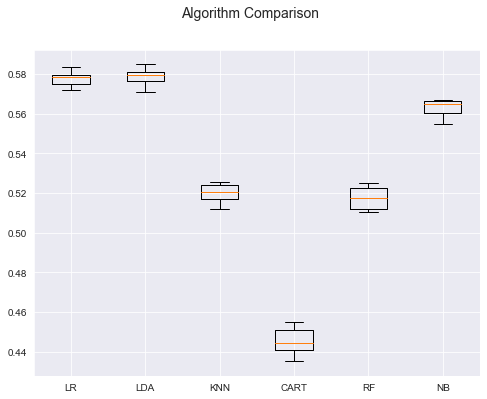

In [426]:
# Compare Algorithms
plt.rcParams["figure.figsize"] = (8,6)
fig = plt.figure()
fig.suptitle('Algorithm Comparison', fontsize=14)
ax = fig.add_subplot(111)
plt.boxplot(results_model)
ax.set_xticklabels(names_model)
plt.savefig("alg_comparison.png")
plt.show()

It is possible that the varied distribution of the attributes is having an efect on the accuracy
of algorithms such as SVC. In the next section we will repeat this spot-check with a standardized
copy of the training dataset.

* Evaluate Algorithms: Standardize Data

Tunning

In [473]:
# Tune LR
penalty = ["l2"] # penalty = ["l1", "l2", "elasticnet", "none"]
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5]
param_grid = dict(penalty=penalty, C=c_values)

model = LogisticRegression()
kfold = KFold(n_splits=10, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) # --> 0.584083 using {'C': 0.5, 'penalty': 'l2'}

Best: 0.584083 using {'C': 0.5, 'penalty': 'l2'}
0.582409 (0.004460) with: {'C': 0.1, 'penalty': 'l2'}
0.582960 (0.004175) with: {'C': 0.3, 'penalty': 'l2'}
0.584083 (0.004512) with: {'C': 0.5, 'penalty': 'l2'}
0.582991 (0.004547) with: {'C': 0.7, 'penalty': 'l2'}
0.583563 (0.003713) with: {'C': 0.9, 'penalty': 'l2'}
0.583022 (0.004308) with: {'C': 1.0, 'penalty': 'l2'}
0.582929 (0.003811) with: {'C': 1.3, 'penalty': 'l2'}
0.583022 (0.003384) with: {'C': 1.5, 'penalty': 'l2'}


In [474]:
LR = LogisticRegression(C=0.5, penalty='l2')
LR.fit(X_train, y_train)
LR.score(X,y)

0.5871449726294071

In [429]:
# Tune LDA
solver = ["svd", "lsqr", "eigen"]
shrinkage = [0,0.25,0.5,0.75,1]
store_covariance = [True, False]
param_grid = dict(solver=solver,shrinkage=shrinkage,store_covariance=store_covariance)

model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=10, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) # Best: 0.578977 using {'shrinkage': 0, 'solver': 'lsqr', 'store_covariance': True}

Best: 0.578977 using {'shrinkage': 0, 'solver': 'lsqr', 'store_covariance': True}
nan (nan) with: {'shrinkage': 0, 'solver': 'svd', 'store_covariance': True}
nan (nan) with: {'shrinkage': 0, 'solver': 'svd', 'store_covariance': False}
0.578977 (0.003810) with: {'shrinkage': 0, 'solver': 'lsqr', 'store_covariance': True}
0.578977 (0.003810) with: {'shrinkage': 0, 'solver': 'lsqr', 'store_covariance': False}
nan (nan) with: {'shrinkage': 0, 'solver': 'eigen', 'store_covariance': True}
nan (nan) with: {'shrinkage': 0, 'solver': 'eigen', 'store_covariance': False}
nan (nan) with: {'shrinkage': 0.25, 'solver': 'svd', 'store_covariance': True}
nan (nan) with: {'shrinkage': 0.25, 'solver': 'svd', 'store_covariance': False}
0.576450 (0.003288) with: {'shrinkage': 0.25, 'solver': 'lsqr', 'store_covariance': True}
0.576450 (0.003288) with: {'shrinkage': 0.25, 'solver': 'lsqr', 'store_covariance': False}
0.576450 (0.003288) with: {'shrinkage': 0.25, 'solver': 'eigen', 'store_covariance': True}
0.

In [430]:
LDA = LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr', store_covariance=True)
LDA.fit(X_train, y_train)
LDA.score(X,y)

0.5783680803979967

LR and LDA showed the most promise as a low complexity and stable model for this problem. 
Lets try to further improve the models performance by using scalar data. We will exclude SVC for being too time consuming to run


In [431]:
# Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []

pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(C=1.3, penalty='l2'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr', store_covariance=True))])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
# pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.579018 (0.003566)
ScaledLDA: 0.578977 (0.003810)
ScaledKNN: 0.522925 (0.002974)
ScaledCART: 0.445077 (0.006494)
ScaledRF: 0.516051 (0.005648)
ScaledNB: 0.562993 (0.003956)


Again, we should plot the distribution of the accuracy scores using box and whisker plots. Wr can observe taht KNN was the most affected positively, but LR and LDA remain the same and are the prefered models

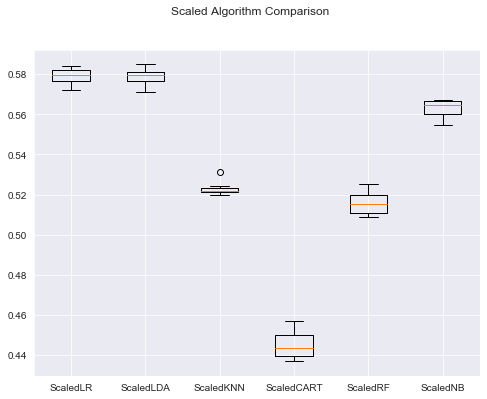

In [432]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig("alg_comparison_scaled.png")
plt.show()

Lets finalize the model by training it on the entire training dataset and make
predictions for the hold-out validation dataset to confirm our findings. 

In [476]:
# prepare the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


LR = LogisticRegression(C=0.5, penalty='l2') # probability=True if we want to use svc.predict_proba(X_test)
LR.fit(X_train, y_train)
# estimate accuracy on validation dataset
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.5822553138388586
[[7485 4627]
 [5416 6513]]
              precision    recall  f1-score   support

           0       0.58      0.62      0.60     12112
           1       0.58      0.55      0.56     11929

    accuracy                           0.58     24041
   macro avg       0.58      0.58      0.58     24041
weighted avg       0.58      0.58      0.58     24041



We can see that we achieve an accuracy of nearly 58% on the held-out validation dataset. A
score that matches closely to our expectations estimated above during the tuning of LR.

In [ ]:
# prepare the model
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report

# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
# model = SVC(C=1.5,probability=True) # probability=True if we want to use svc.predict_proba(X_test)
# model.fit(rescaledX, y_train)
# # estimate accuracy on validation dataset
# rescaledTestX = scaler.transform(X_test)
# predictions = model.predict(rescaledTestX)
# print(accuracy_score(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
# print(classification_report(y_test, predictions))

# 5. Productionazing the model

In [477]:
# import the relevant module
import pickle

In [ ]:
# with open('SVC_model_tennis', 'wb') as file:
#     pickle.dump(svc, file)

In [478]:
with open('LR_model_tennis', 'wb') as file:
    pickle.dump(LR, file)

In [436]:
with open('LDA_model_tennis', 'wb') as file:
    pickle.dump(LDA, file)

In [491]:
"Rafael Nadal" in X.columns

True

In [ ]:
sqrt_list = ["total_mins_match", #Remember the data that we previosuly transformed
"winner_games_won","loser_games_won",
# "matches_played_winner_coming_up_year","matches_played_loser_coming_up_year",
# "mins_match_winner_coming_up_year","mins_match_loser_coming_up_year",
# "perc_first_serve_winner_coming_up_year","perc_first_serve_loser_coming_up_year"]

In [ ]:
X.describe()

In [495]:
def predict_winner(name,perc_wins_coming_up_year, matches_played_coming_up_year,
       total_matches_played_coming_up_year, ratio_points_coming_up_year,
       mins_match_coming_up_year, perc_return_points_coming_up_year,
       tiebreaks_won_coming_up_year_per_match,
       break_points_converted_coming_up_year_per_match,
       double_faults_coming_up_year_per_match, surface_Clay,
       surface_Grass, surface_Hard, inout_Indoor, inout_Outdoor):
    
    loc_index = np.where(X.columns==name)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = perc_wins_coming_up_year
    x[1] = np.sqrt(matches_played_coming_up_year)
    x[2] = total_matches_played_coming_up_year
    x[3] = ratio_points_coming_up_year
    x[4] = np.sqrt(mins_match_coming_up_year)
    x[5] = perc_return_points_coming_up_year
    x[6] = np.sqrt(tiebreaks_won_coming_up_year_per_match)
    x[7] = np.sqrt(break_points_converted_coming_up_year_per_match)
    x[8] = np.sqrt(double_faults_coming_up_year_per_match)
    x[9] = surface_Clay # 1 or 0
    x[10] = surface_Grass # 1 or 0
    x[11] = surface_Hard # 1 or 0
    x[12] = inout_Indoor # 1 or 0
    x[13] = inout_Outdoor # 1 or 0
    
    if loc_index >= 0:
        x[loc_index] = 1
    
    return (LR.predict([x]),0), LR.predict_proba([x])
    
#     return pow(svc.predict([x]),1), svc.predict_proba([x])

In [512]:
predict_winner("David Ferrer",66, 25, 40, 1.1, 91, 55, 1, 1, 2, 1, 0, 0, 0, 1) 

#((array([1], dtype=int64), 1), array([[0.49447123, 0.50552877]])) win with 51 perc probl
# ((array([0], dtype=int64), 1), array([[0.52737182, 0.47262818]])) lose with 53 perc probl

((array([1], dtype=int64), 0), array([[0.34083652, 0.65916348]]))

In [517]:
predict_winner("Fernando Verdasco",39, 25, 40, 1.1, 91, 55, 1, 1, 2, 1, 0, 0, 0, 1) 


((array([1], dtype=int64), 0), array([[0.47004657, 0.52995343]]))

In [519]:
predict_winner("Carlos Moya",66, 25, 40, 1.1, 91, 55, 1, 1, 2, 1, 0, 0, 0, 1) 


((array([1], dtype=int64), 0), array([[0.36763147, 0.63236853]]))

The code below will generate the information for both players for an upcoming match

In [292]:
df_new_row = pd.concat([df_nonan,pd.Series(range(1))], axis=0).reset_index()

In [437]:
df_new_row.to_csv("df_new_row.csv", index=False)

In [293]:
df_new_row.drop(["index", 0], axis=1, inplace=True)

In [297]:
df_new_row["start_date"] = pd.to_datetime(df_new_row["start_date"], format="%Y-%m-%d")

In [298]:
df_new_row.loc[60103,"start_date"] = datetime.now() # We need to include in the new row the winner_name, loser_name, surface and date

In [299]:
wins_winner12_hard = []
lost_winner12_hard = []
lost_loser12_hard = []
wins_loser12_hard = []



w = df_new_row.loc[60103, "winner_name"]

f12wh = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["winner_name"].value_counts() # Counts of wins last 12 months for all players in hard

if w in f12wh:
    wins_winner12_hard.append((60103,(f12wh[w])))
else: 
    wins_winner12_hard.append((60103,0))

w = df_new_row.loc[60103, "winner_name"]

f12lh = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
                     &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["loser_name"].value_counts() # Counts of loses last 12 months for all players in hard        

if w in f12lh:
    try:
        lost_winner12_hard.append((60103,(f12lh[w])))
    except KeyError:
        lost_winner12_hard.append((60103,0))
else: 
    lost_winner12_hard.append((60103,0))       


l = df_new_row.loc[60103, "loser_name"]

f12lh = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["loser_name"].value_counts() # Counts of loses last 12 months for all players in hard

if l in f12lh:
    lost_loser12_hard.append((60103,(f12lh[l])))
else: 
    lost_loser12_hard.append((60103,0))


l = df_new_row.loc[60103, "loser_name"]
f12wh = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["winner_name"].value_counts() ## Counts of wins last 12 months for all players in hard        

if l in f12wh:
    try:
        wins_loser12_hard.append((60103,(f12wh[l])))
    except KeyError:
        wins_loser12_hard.append((60103,0))
else: 
    wins_loser12_hard.append((60103,0))   

In [300]:
wins_winner12_clay = []
lost_winner12_clay = []
lost_loser12_clay = []
wins_loser12_clay = []


w = df_new_row.loc[60103, "winner_name"]
f12wh = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["winner_name"].value_counts() # Counts of wins last 12 months for all players in hard
if w in f12wh:
    wins_winner12_clay.append((60103,(f12wh[w])))
else: 
    wins_winner12_clay.append((60103,0))

w = df_new_row.loc[60103, "winner_name"]
f12lh = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["loser_name"].value_counts() # Counts of loses last 12 months for all players in hard        

if w in f12lh:
    try:
        lost_winner12_clay.append((60103,(f12lh[w])))
    except KeyError:
        lost_winner12_clay.append((60103,0))
else: 
    lost_winner12_clay.append((60103,0))       


l = df_new_row.loc[60103, "loser_name"]
f12lh = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["loser_name"].value_counts() # Counts of loses last 12 months for all players in hard
if l in f12lh:
    lost_loser12_clay.append((60103,(f12lh[l])))
else: 
    lost_loser12_clay.append((60103,0))

l = df_new_row.loc[60103, "loser_name"]
f12wh = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["winner_name"].value_counts() ## Counts of wins last 12 months for all players in hard        

if l in f12wh:
    try:
        wins_loser12_clay.append((60103,(f12wh[l])))
    except KeyError:
        wins_loser12_clay.append((60103,0))
else: 
    wins_loser12_clay.append((60103,0))  

In [301]:
wins_winner12_grass = []
lost_winner12_grass = []
lost_loser12_grass = []
wins_loser12_grass = []


w = df_new_row.loc[60103, "winner_name"]
f12wh = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["winner_name"].value_counts() # Counts of wins last 12 months for all players in hard
if w in f12wh:
    wins_winner12_grass.append((60103,(f12wh[w])))
else: 
    wins_winner12_grass.append((60103,0))


w = df_new_row.loc[60103, "winner_name"]
f12lh = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["loser_name"].value_counts() # Counts of loses last 12 months for all players in hard        

if w in f12lh:
    try:
        lost_winner12_grass.append((60103,(f12lh[w])))
    except KeyError:
        lost_winner12_grass.append((60103,0))
else: 
    lost_winner12_grass.append((60103,0))       

l = df_new_row.loc[60103, "loser_name"]
f12lh = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["loser_name"].value_counts() # Counts of loses last 12 months for all players in hard
if l in f12lh:
    lost_loser12_grass.append((60103,(f12lh[l])))
else: 
    lost_loser12_grass.append((60103,0))


l = df_new_row.loc[60103, "loser_name"]
f12wh = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["winner_name"].value_counts() ## Counts of wins last 12 months for all players in hard        

if l in f12wh:
    try:
        wins_loser12_grass.append((60103,(f12wh[l])))
    except KeyError:
        wins_loser12_grass.append((60103,0))
else: 
    wins_loser12_grass.append((60103,0))  

In [302]:
df_ww12_clay = pd.DataFrame(wins_winner12_clay, columns=["index","ww12_clay"])
df_lw12_clay = pd.DataFrame(lost_winner12_clay, columns=["index","lw12_clay"])
df_ll12_clay = pd.DataFrame(lost_loser12_clay, columns=["index","ll12_clay"])
df_wl12_clay = pd.DataFrame(wins_loser12_clay, columns=["index","wl12_clay"])
df_ww12_hard = pd.DataFrame(wins_winner12_hard, columns=["index","ww12_hard"])
df_lw12_hard = pd.DataFrame(lost_winner12_hard, columns=["index","lw12_hard"])
df_ll12_hard = pd.DataFrame(lost_loser12_hard, columns=["index","ll12_hard"])
df_wl12_hard = pd.DataFrame(wins_loser12_hard, columns=["index","wl12_hard"])
df_ww12_grass = pd.DataFrame(wins_winner12_grass, columns=["index","ww12_grass"])
df_lw12_grass = pd.DataFrame(lost_winner12_grass, columns=["index","lw12_grass"])
df_ll12_grass = pd.DataFrame(lost_loser12_grass, columns=["index","ll12_grass"])
df_wl12_grass = pd.DataFrame(wins_loser12_grass, columns=["index","wl12_grass"])

In [303]:
df_ww12_clay.drop("index", axis=1, inplace=True)
df_lw12_clay.drop("index", axis=1, inplace=True)
df_ll12_clay.drop("index", axis=1, inplace=True)
df_wl12_clay.drop("index", axis=1, inplace=True)
df_ww12_hard.drop("index", axis=1, inplace=True)
df_lw12_hard.drop("index", axis=1, inplace=True)
df_ll12_hard.drop("index", axis=1, inplace=True)
df_wl12_hard.drop("index", axis=1, inplace=True)
df_ww12_grass.drop("index", axis=1, inplace=True)
df_lw12_grass.drop("index", axis=1, inplace=True)
df_ll12_grass.drop("index", axis=1, inplace=True)
df_wl12_grass.drop("index", axis=1, inplace=True)

In [304]:
df_new_row = pd.concat([df_new_row, df_ww12_clay, df_lw12_clay, df_ll12_clay, df_wl12_clay, df_ww12_hard, df_lw12_hard, df_ll12_hard, df_wl12_hard, df_ww12_grass, df_lw12_grass, df_ll12_grass, df_wl12_grass], axis=1, sort=False)

In [305]:
df_new_row["perc_wins_clay_winner_last_year"] = (df_new_row["ww12_clay"]/(df_new_row["ww12_clay"]+df_new_row["lw12_clay"]))*100
df_new_row["perc_wins_hard_winner_last_year"] = (df_new_row["ww12_hard"]/(df_new_row["ww12_hard"]+df_new_row["lw12_hard"]))*100
df_new_row["perc_wins_grass_winner_last_year"] = (df_new_row["ww12_grass"]/(df_new_row["ww12_grass"]+df_new_row["lw12_grass"]))*100


In [306]:
df_new_row["perc_wins_clay_loser_last_year"] = (df_new_row["wl12_clay"]/(df_new_row["wl12_clay"]+df_new_row["ll12_clay"]))*100
df_new_row["perc_wins_hard_loser_last_year"] = (df_new_row["wl12_hard"]/(df_new_row["wl12_hard"]+df_new_row["ll12_hard"]))*100
df_new_row["perc_wins_grass_loser_last_year"] = (df_new_row["wl12_grass"]/(df_new_row["wl12_grass"]+df_new_row["ll12_grass"]))*100


In [307]:
def perc_wins_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["perc_wins_hard_winner_last_year"]
        if x["surface"] == "Clay":
            return x["perc_wins_clay_winner_last_year"]
        if x["surface"] == "Grass":
            return x["perc_wins_grass_winner_last_year"]
    except KeyError:
        pass

In [308]:
def perc_looses_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["perc_wins_hard_loser_last_year"]
        if x["surface"] == "Clay":
            return x["perc_wins_clay_loser_last_year"]
        if x["surface"] == "Grass":
            return x["perc_wins_grass_loser_last_year"]
    except KeyError:
        pass

In [309]:
def games_played_winner_year(x):
    try:
        if x["surface"] == "Hard":
            return x["ww12_hard"]+x["lw12_hard"]
        if x["surface"] == "Clay":
            return x["ww12_clay"]+x["lw12_clay"]
        if x["surface"] == "Grass":
            return x["ww12_grass"]+x["lw12_grass"]
    except KeyError:
        pass

In [310]:
def games_played_loser_year(x):
    try:
        if x["surface"] == "Hard":
            return x["wl12_hard"]+x["ll12_hard"]
        if x["surface"] == "Clay":
            return x["wl12_clay"]+x["ll12_clay"]
        if x["surface"] == "Grass":
            return x["wl12_grass"]+x["ll12_grass"]
    except KeyError:
        pass

In [311]:
df_new_row["perc_wins_winner_coming_up_year"] = df_new_row.apply(perc_wins_surf_classifier_year, axis=1)

In [312]:
df_new_row["perc_wins_loser_coming_up_year"] = df_new_row.apply(perc_looses_surf_classifier_year, axis=1)

In [313]:
df_new_row["matches_played_winner_coming_up_year"] = df_new_row.apply(games_played_winner_year, axis=1)

In [314]:
df_new_row["matches_played_loser_coming_up_year"] = df_new_row.apply(games_played_loser_year, axis=1)

In [315]:
df_new_row["total_matches_played_winner_coming_up_year"] = df_new_row["ww12_hard"]+df_new_row["lw12_hard"]+df_new_row["ww12_clay"]+df_new_row["lw12_clay"]+df_new_row["ww12_grass"]+df_new_row["lw12_grass"]
df_new_row["total_matches_played_loser_coming_up_year"] = df_new_row["wl12_hard"]+df_new_row["ll12_hard"]+df_new_row["wl12_clay"]+df_new_row["ll12_clay"]+df_new_row["wl12_grass"]+df_new_row["ll12_grass"]

In [316]:
df_new_row.drop(["ww12_clay","lw12_clay","ll12_clay","wl12_clay",'ww12_hard','lw12_hard','ll12_hard','wl12_hard','ww12_grass','lw12_grass','ll12_grass','wl12_grass','perc_wins_clay_winner_last_year','perc_wins_hard_winner_last_year','perc_wins_grass_winner_last_year','perc_wins_clay_loser_last_year','perc_wins_hard_loser_last_year','perc_wins_grass_loser_last_year'],axis=1, inplace=True)

In [317]:
ratio_winner_loser_points12_winner_hard = [] # avg ratio in the past year (loses and wins)
ratio_winner_loser_points12_winner_clay = []
ratio_winner_loser_points12_winner_grass = []


w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["ratio_points_winner_coming_up_year"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["ratio_points_loser_coming_up_year"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

ratio_winner_loser_points12_winner_hard.append((60103,(total)))




w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["ratio_points_winner_coming_up_year"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["ratio_points_loser_coming_up_year"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

ratio_winner_loser_points12_winner_clay.append((60103,(total)))



w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["ratio_points_winner_coming_up_year"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["ratio_points_loser_coming_up_year"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

ratio_winner_loser_points12_winner_grass.append((60103,(total)))

    

In [318]:
df_ratio_points_winner_hard = pd.DataFrame(ratio_winner_loser_points12_winner_hard, columns=["index","df_ratio_points_winner_hard"])
df_ratio_points_winner_clay = pd.DataFrame(ratio_winner_loser_points12_winner_clay, columns=["index","df_ratio_points_winner_clay"])
df_ratio_points_winner_grass = pd.DataFrame(ratio_winner_loser_points12_winner_grass, columns=["index","df_ratio_points_winner_grass"])

In [319]:
df_ratio_points_winner_hard.drop("index", axis=1, inplace=True)
df_ratio_points_winner_clay.drop("index", axis=1, inplace=True)
df_ratio_points_winner_grass.drop("index", axis=1, inplace=True)

In [320]:
df_new_row = pd.concat([df_new_row, df_ratio_points_winner_hard,df_ratio_points_winner_clay,df_ratio_points_winner_grass], axis=1, sort=False)

In [321]:
def ratio_points_winner_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_ratio_points_winner_hard"]
        if x["surface"] == "Clay":
            return x["df_ratio_points_winner_clay"]
        if x["surface"] == "Grass":
            return x["df_ratio_points_winner_grass"]

    except KeyError:
        pass

In [322]:
df_new_row["ratio_points_winner_coming_up_year"] = df_new_row.apply(ratio_points_winner_surf_classifier_year, axis=1)

In [323]:
df_new_row.drop(["df_ratio_points_winner_hard","df_ratio_points_winner_clay","df_ratio_points_winner_grass"], axis=1, inplace=True)

In [324]:
ratio_winner_loser_points12_loser_hard = [] # avg ratio in the past year (loses and wins)
ratio_winner_loser_points12_loser_clay = []
ratio_winner_loser_points12_loser_grass = []

    
w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["ratio_points_winner_coming_up_year"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["ratio_points_loser_coming_up_year"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

ratio_winner_loser_points12_loser_hard.append((60103,(total)))




w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["ratio_points_winner_coming_up_year"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["ratio_points_loser_coming_up_year"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

ratio_winner_loser_points12_loser_clay.append((60103,(total)))




w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["ratio_points_winner_coming_up_year"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["ratio_points_loser_coming_up_year"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

ratio_winner_loser_points12_loser_grass.append((60103,(total)))


In [325]:
df_ratio_points_loser_hard = pd.DataFrame(ratio_winner_loser_points12_loser_hard, columns=["index","df_ratio_points_loser_hard"])
df_ratio_points_loser_clay = pd.DataFrame(ratio_winner_loser_points12_loser_clay, columns=["index","df_ratio_points_loser_clay"])
df_ratio_points_loser_grass = pd.DataFrame(ratio_winner_loser_points12_loser_grass, columns=["index","df_ratio_points_loser_grass"])

In [326]:
df_ratio_points_loser_hard.drop("index", axis=1, inplace=True)
df_ratio_points_loser_clay.drop("index", axis=1, inplace=True)
df_ratio_points_loser_grass.drop("index", axis=1, inplace=True)

In [327]:
df_new_row = pd.concat([df_new_row, df_ratio_points_loser_hard,df_ratio_points_loser_clay,df_ratio_points_loser_grass], axis=1, sort=False)

In [328]:
def ratio_points_loser_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_ratio_points_loser_hard"]
        if x["surface"] == "Clay":
            return x["df_ratio_points_loser_clay"]
        if x["surface"] == "Grass":
            return x["df_ratio_points_loser_grass"]
    except KeyError:
        pass

In [329]:
df_new_row["ratio_points_loser_coming_up_year"] = df_new_row.apply(ratio_points_loser_surf_classifier_year, axis=1)

In [330]:
df_new_row.drop(["df_ratio_points_loser_hard","df_ratio_points_loser_clay","df_ratio_points_loser_grass"], axis=1, inplace=True)

In [331]:
match_time_winner_12_hard = [] # how long were the matches of the winner that he won in the last year
match_time_winner_12_clay = []
match_time_winner_12_grass = []

 
    
w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["winner_name"]

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["loser_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["total_mins_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

total_indexes = indexes_y.append(indexes_z)

values_x = pd.Series(x[total_indexes])

total = values_x.mean()

match_time_winner_12_hard.append((60103,(total)))




w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["winner_name"]

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["loser_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["total_mins_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

total_indexes = indexes_y.append(indexes_z)

values_x = pd.Series(x[total_indexes])

total = values_x.mean()

match_time_winner_12_clay.append((60103,(total)))



w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["winner_name"]

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["loser_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["total_mins_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

total_indexes = indexes_y.append(indexes_z)

values_x = pd.Series(x[total_indexes])

total = values_x.mean()

match_time_winner_12_grass.append((60103,(total)))



In [332]:
df_mins_match_winner_hard_year = pd.DataFrame(match_time_winner_12_hard, columns=["index","df_mins_match_winner_hard_year"])
df_mins_match_winner_clay_year = pd.DataFrame(match_time_winner_12_clay, columns=["index","df_mins_match_winner_clay_year"])
df_mins_match_winner_grass_year = pd.DataFrame(match_time_winner_12_grass, columns=["index","df_mins_match_winner_grass_year"])

In [333]:
df_mins_match_winner_hard_year.drop("index", axis=1, inplace=True)
df_mins_match_winner_clay_year.drop("index", axis=1, inplace=True)
df_mins_match_winner_grass_year.drop("index", axis=1, inplace=True)

In [334]:
df_new_row = pd.concat([df_new_row, df_mins_match_winner_hard_year,df_mins_match_winner_clay_year,df_mins_match_winner_grass_year], axis=1, sort=False)

In [335]:
def mins_match_winner_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_mins_match_winner_hard_year"]
        if x["surface"] == "Clay":
            return x["df_mins_match_winner_clay_year"]
        if x["surface"] == "Grass":
            return x["df_mins_match_winner_grass_year"]

    except KeyError:
        pass

In [336]:
df_new_row["mins_match_winner_coming_up_year"] = df_new_row.apply(mins_match_winner_surf_classifier_year, axis=1)

In [337]:
df_new_row.drop(["df_mins_match_winner_hard_year","df_mins_match_winner_clay_year","df_mins_match_winner_grass_year"], axis=1, inplace=True)

In [338]:
match_time_loser_12_hard = [] # how long where the matches of the loser in average
match_time_loser_12_clay = []
match_time_loser_12_grass = []


 
    
w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["winner_name"]

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["loser_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["total_mins_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

total_indexes = indexes_y.append(indexes_z)

values_x = pd.Series(x[total_indexes])

total = values_x.mean()

match_time_loser_12_hard.append((60103,(total)))




w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["winner_name"]

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["loser_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["total_mins_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

total_indexes = indexes_y.append(indexes_z)

values_x = pd.Series(x[total_indexes])

total = values_x.mean()

match_time_loser_12_clay.append((60103,(total)))



w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["winner_name"]

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["loser_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["total_mins_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

total_indexes = indexes_y.append(indexes_z)

values_x = pd.Series(x[total_indexes])

total = values_x.mean()

match_time_loser_12_grass.append((60103,(total)))



In [339]:
df_mins_match_loser_hard_year = pd.DataFrame(match_time_loser_12_hard, columns=["index","df_mins_match_loser_hard_year"])
df_mins_match_loser_clay_year = pd.DataFrame(match_time_loser_12_clay, columns=["index","df_mins_match_loser_clay_year"])
df_mins_match_loser_grass_year = pd.DataFrame(match_time_loser_12_grass, columns=["index","df_mins_match_loser_grass_year"])

In [340]:
df_mins_match_loser_hard_year.drop("index", axis=1, inplace=True)
df_mins_match_loser_clay_year.drop("index", axis=1, inplace=True)
df_mins_match_loser_grass_year.drop("index", axis=1, inplace=True)

In [341]:
df_new_row = pd.concat([df_new_row, df_mins_match_loser_hard_year,df_mins_match_loser_clay_year,df_mins_match_loser_grass_year], axis=1, sort=False)

In [342]:
def mins_match_loser_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_mins_match_loser_hard_year"]
        if x["surface"] == "Clay":
            return x["df_mins_match_loser_clay_year"]
        if x["surface"] == "Grass":
            return x["df_mins_match_loser_grass_year"]
    except KeyError:
        pass

In [343]:
df_new_row["mins_match_loser_coming_up_year"] = df_new_row.apply(mins_match_loser_surf_classifier_year, axis=1)

In [344]:
df_new_row.drop(["df_mins_match_loser_hard_year","df_mins_match_loser_clay_year","df_mins_match_loser_grass_year"], axis=1, inplace=True)

In [345]:
perc_return_points_won_winner_12_hard = []  # what percentage of points won by winner on return in the games that won in the last year
perc_return_points_won_winner_12_clay = []
perc_return_points_won_winner_12_grass = []

 
    
w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["perc_return_points_winner_coming_up_year"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["perc_return_points_loser_coming_up_year"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

perc_return_points_won_winner_12_hard.append((60103,(total)))




w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["perc_return_points_winner_coming_up_year"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["perc_return_points_loser_coming_up_year"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

perc_return_points_won_winner_12_clay.append((60103,(total)))




w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["perc_return_points_winner_coming_up_year"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["perc_return_points_loser_coming_up_year"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

perc_return_points_won_winner_12_grass.append((60103,(total)))


In [346]:
df_perc_return_points_won_winner_12_hard = pd.DataFrame(perc_return_points_won_winner_12_hard, columns=["index","df_perc_return_points_won_winner_12_hard"])
df_perc_return_points_won_winner_12_clay = pd.DataFrame(perc_return_points_won_winner_12_clay, columns=["index","df_perc_return_points_won_winner_12_clay"])
df_perc_return_points_won_winner_12_grass = pd.DataFrame(perc_return_points_won_winner_12_grass, columns=["index","df_perc_return_points_won_winner_12_grass"])

In [347]:
df_perc_return_points_won_winner_12_hard.drop("index", axis=1, inplace=True)
df_perc_return_points_won_winner_12_clay.drop("index", axis=1, inplace=True)
df_perc_return_points_won_winner_12_grass.drop("index", axis=1, inplace=True)

In [348]:
df_new_row = pd.concat([df_new_row, df_perc_return_points_won_winner_12_hard,df_perc_return_points_won_winner_12_clay,df_perc_return_points_won_winner_12_grass], axis=1, sort=False)

In [349]:
def perc_return_points_won_winner_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_perc_return_points_won_winner_12_hard"]
        if x["surface"] == "Clay":
            return x["df_perc_return_points_won_winner_12_clay"]
        if x["surface"] == "Grass":
            return x["df_perc_return_points_won_winner_12_grass"]
    except KeyError:
        pass

In [350]:
df_new_row["perc_return_points_winner_coming_up_year"] = df_new_row.apply(perc_return_points_won_winner_surf_classifier_year, axis=1)

In [351]:
df_new_row.drop(["df_perc_return_points_won_winner_12_hard","df_perc_return_points_won_winner_12_clay","df_perc_return_points_won_winner_12_grass"], axis=1, inplace=True)

In [352]:
perc_return_points_won_loser_12_hard = [] # at percentage of points won by the looser on return in the last year
perc_return_points_won_loser_12_clay = []
perc_return_points_won_loser_12_grass = []

 
    
w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["perc_return_points_winner_coming_up_year"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["perc_return_points_loser_coming_up_year"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

perc_return_points_won_loser_12_hard.append((60103,(total)))




w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["perc_return_points_winner_coming_up_year"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["perc_return_points_loser_coming_up_year"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

perc_return_points_won_loser_12_clay.append((60103,(total)))




w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["perc_return_points_winner_coming_up_year"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["perc_return_points_loser_coming_up_year"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

perc_return_points_won_loser_12_grass.append((60103,(total)))



In [353]:
df_perc_return_points_won_loser_12_hard = pd.DataFrame(perc_return_points_won_loser_12_hard, columns=["index","df_perc_return_points_won_loser_12_hard"])
df_perc_return_points_won_loser_12_clay = pd.DataFrame(perc_return_points_won_loser_12_clay, columns=["index","df_perc_return_points_won_loser_12_clay"])
df_perc_return_points_won_loser_12_grass = pd.DataFrame(perc_return_points_won_loser_12_grass, columns=["index","df_perc_return_points_won_loser_12_grass"])

In [354]:
df_perc_return_points_won_loser_12_hard.drop("index", axis=1, inplace=True)
df_perc_return_points_won_loser_12_clay.drop("index", axis=1, inplace=True)
df_perc_return_points_won_loser_12_grass.drop("index", axis=1, inplace=True)

In [355]:
df_new_row = pd.concat([df_new_row, df_perc_return_points_won_loser_12_hard,df_perc_return_points_won_loser_12_clay,df_perc_return_points_won_loser_12_grass], axis=1, sort=False)

In [356]:
# df_new_row.to_csv("df_new_row_progress.csv", index=False)

In [357]:
def perc_return_points_won_loser_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_perc_return_points_won_loser_12_hard"]
        if x["surface"] == "Clay":
            return x["df_perc_return_points_won_loser_12_clay"]
        if x["surface"] == "Grass":
            return x["df_perc_return_points_won_loser_12_grass"]

    except KeyError:
        pass

In [358]:
df_new_row["perc_return_points_loser_coming_up_year"] = df_new_row.apply(perc_return_points_won_loser_surf_classifier_year, axis=1)

In [359]:
df_new_row.drop(["df_perc_return_points_won_loser_12_hard","df_perc_return_points_won_loser_12_clay","df_perc_return_points_won_loser_12_grass"], axis=1, inplace=True)

In [361]:
tiebreaks_won_winner_12_hard = [] # how many tiebreaks the winner won in the last year
tiebreaks_won_winner_12_clay = []
tiebreaks_won_winner_12_grass = []


 
    
w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["tiebreaks_won_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["tiebreaks_won_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

tiebreaks_won_winner_12_hard.append((60103,(total)))




w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["tiebreaks_won_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["tiebreaks_won_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

tiebreaks_won_winner_12_clay.append((60103,(total)))




w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["tiebreaks_won_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["tiebreaks_won_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

tiebreaks_won_winner_12_grass.append((60103,(total)))



In [362]:
df_tiebreaks_won_winner_12_hard = pd.DataFrame(tiebreaks_won_winner_12_hard, columns=["index","df_tiebreaks_won_winner_12_hard"])
df_tiebreaks_won_winner_12_clay = pd.DataFrame(tiebreaks_won_winner_12_clay, columns=["index","df_tiebreaks_won_winner_12_clay"])
df_tiebreaks_won_winner_12_grass = pd.DataFrame(tiebreaks_won_winner_12_grass, columns=["index","df_tiebreaks_won_winner_12_grass"])

In [363]:
df_tiebreaks_won_winner_12_grass.isna().sum()

index                               0
df_tiebreaks_won_winner_12_grass    0
dtype: int64

In [364]:
df_tiebreaks_won_winner_12_hard.drop("index", axis=1, inplace=True)
df_tiebreaks_won_winner_12_clay.drop("index", axis=1, inplace=True)
df_tiebreaks_won_winner_12_grass.drop("index", axis=1, inplace=True)

In [365]:
df_new_row = pd.concat([df_new_row, df_tiebreaks_won_winner_12_hard,df_tiebreaks_won_winner_12_clay,df_tiebreaks_won_winner_12_grass], axis=1, sort=False)

In [366]:
df_new_row.head()

,break_points_converted_loser_coming_up_year_per_match,break_points_converted_winner_coming_up_year_per_match,double_faults_loser_coming_up_year_per_match,double_faults_winner_coming_up_year_per_match,inout,loser_games_won,loser_name,matches_played_loser_coming_up_year,matches_played_winner_coming_up_year,mins_match_loser_coming_up_year,mins_match_winner_coming_up_year,perc_first_serve_loser_coming_up_year,perc_first_serve_winner_coming_up_year,perc_return_points_loser_coming_up_year,perc_return_points_winner_coming_up_year,perc_wins_loser_coming_up_year,perc_wins_winner_coming_up_year,ratio_points_loser_coming_up_year,ratio_points_winner_coming_up_year,start_date,start_year,surface,tiebreaks_won_loser_coming_up_year,tiebreaks_won_loser_coming_up_year_per_match,tiebreaks_won_winner_coming_up_year_per_match,total_matches_played_loser_coming_up_year,total_matches_played_winner_coming_up_year,total_mins_match,tourney_name,tourney_round_name,winner_games_won,winner_name,df_tiebreaks_won_winner_12_hard,df_tiebreaks_won_winner_12_clay,df_tiebreaks_won_winner_12_grass
0,0.185255,0.126722,0.128544,0.073462,Outdoor,11.0,Rainer Schuettler,21.0,23.0,103.571429,134.551449,59.328341,57.196052,39.912505,41.772649,76.190476,91.304348,1.253734,1.298929,2000-01-03,2000.0,Hard,None,0.007561,0.005510,26.0,28.0,118.0,Doha,Finals,13.0,Fabrice Santoro,0.015825,NaN,0.0
1,0.080991,0.126722,0.080621,0.073462,Outdoor,9.0,Nicolas Kiefer,NaN,NaN,NaN,NaN,50.552689,57.196052,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03,2000.0,Hard,None,0.005178,0.005510,NaN,NaN,99.0,Doha,Semi-Finals,13.0,Fabrice Santoro,NaN,NaN,NaN
2,0.390000,0.185255,0.410000,0.128544,Outdoor,15.0,Younes El Aynaoui,NaN,NaN,NaN,NaN,62.866377,59.328341,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03,2000.0,Hard,None,0.030000,0.007561,NaN,NaN,155.0,Doha,Semi-Finals,18.0,Rainer Schuettler,NaN,NaN,NaN
3,0.129883,0.080991,0.099609,0.080621,Outdoor,1.0,Sjeng Schalken,NaN,NaN,NaN,NaN,62.565253,50.552689,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03,2000.0,Hard,None,0.003906,0.005178,NaN,NaN,67.0,Doha,Quarter-Finals,12.0,Nicolas Kiefer,NaN,NaN,NaN
4,0.456790,0.126722,0.370370,0.073462,Outdoor,6.0,George Bastl,NaN,NaN,NaN,NaN,64.203398,57.196052,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03,2000.0,Hard,None,0.037037,0.005510,NaN,NaN,78.0,Doha,Quarter-Finals,12.0,Fabrice Santoro,NaN,NaN,NaN


In [367]:
def tiebreaks_winner_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_tiebreaks_won_winner_12_hard"]
        if x["surface"] == "Clay":
            return x["df_tiebreaks_won_winner_12_clay"]
        if x["surface"] == "Grass":
            return x["df_tiebreaks_won_winner_12_grass"]
    except KeyError:
        pass

In [368]:
df_new_row["tiebreaks_won_winner_coming_up_year"] = df_new_row.apply(tiebreaks_winner_surf_classifier_year, axis=1)

In [369]:
df_new_row.drop(["df_tiebreaks_won_winner_12_hard","df_tiebreaks_won_winner_12_clay","df_tiebreaks_won_winner_12_grass"], axis=1, inplace=True)

In [370]:
tiebreaks_won_loser_12_hard = [] # how many tiebreaks the loser won in the last year
tiebreaks_won_loser_12_clay = []
tiebreaks_won_loser_12_grass = []


 
    
w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["tiebreaks_won_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["tiebreaks_won_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

tiebreaks_won_loser_12_hard.append((60103,(total)))




w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["tiebreaks_won_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["tiebreaks_won_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

tiebreaks_won_loser_12_clay.append((60103,(total)))




w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["tiebreaks_won_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["tiebreaks_won_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

tiebreaks_won_loser_12_grass.append((60103,(total)))



In [371]:
df_tiebreaks_won_loser_12_hard = pd.DataFrame(tiebreaks_won_loser_12_hard, columns=["index","df_tiebreaks_won_loser_12_hard"])
df_tiebreaks_won_loser_12_clay = pd.DataFrame(tiebreaks_won_loser_12_clay, columns=["index","df_tiebreaks_won_loser_12_clay"])
df_tiebreaks_won_loser_12_grass = pd.DataFrame(tiebreaks_won_loser_12_grass, columns=["index","df_tiebreaks_won_loser_12_grass"])

In [372]:
df_tiebreaks_won_loser_12_hard.drop("index", axis=1, inplace=True)
df_tiebreaks_won_loser_12_clay.drop("index", axis=1, inplace=True)
df_tiebreaks_won_loser_12_grass.drop("index", axis=1, inplace=True)

In [373]:
df_new_row = pd.concat([df_new_row, df_tiebreaks_won_loser_12_hard,df_tiebreaks_won_loser_12_clay,df_tiebreaks_won_loser_12_grass], axis=1, sort=False)

In [374]:
def tiebreaks_loser_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_tiebreaks_won_loser_12_hard"]
        if x["surface"] == "Clay":
            return x["df_tiebreaks_won_loser_12_clay"]
        if x["surface"] == "Grass":
            return x["df_tiebreaks_won_loser_12_grass"]
    except KeyError:
        pass

In [375]:
df_new_row["tiebreaks_won_loser_coming_up_year"] = df_new_row.apply(tiebreaks_loser_surf_classifier_year, axis=1)

In [376]:
df_new_row.drop(["df_tiebreaks_won_loser_12_hard","df_tiebreaks_won_loser_12_clay","df_tiebreaks_won_loser_12_grass"], axis=1, inplace=True)

In [377]:
break_points_converted_winner_12_hard = [] # how many break points the winner converted in the last year. 
break_points_converted_winner_12_clay = []
break_points_converted_winner_12_grass = []

 
    
w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["break_points_converted_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["break_points_converted_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

break_points_converted_winner_12_hard.append((60103,(total)))




w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["break_points_converted_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["break_points_converted_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

break_points_converted_winner_12_clay.append((60103,(total)))




w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["break_points_converted_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["break_points_converted_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

break_points_converted_winner_12_grass.append((60103,(total)))



In [378]:
df_break_points_converted_winner_12_hard = pd.DataFrame(break_points_converted_winner_12_hard, columns=["index","df_break_points_converted_winner_12_hard"])
df_break_points_converted_winner_12_clay = pd.DataFrame(break_points_converted_winner_12_clay, columns=["index","df_break_points_converted_winner_12_clay"])
df_break_points_converted_winner_12_grass = pd.DataFrame(break_points_converted_winner_12_grass, columns=["index","df_break_points_converted_winner_12_grass"])

In [379]:
df_break_points_converted_winner_12_hard.drop("index", axis=1, inplace=True)
df_break_points_converted_winner_12_clay.drop("index", axis=1, inplace=True)
df_break_points_converted_winner_12_grass.drop("index", axis=1, inplace=True)

In [380]:
df_new_row = pd.concat([df_new_row, df_break_points_converted_winner_12_hard,df_break_points_converted_winner_12_clay,df_break_points_converted_winner_12_grass], axis=1, sort=False)

In [381]:
def break_point_winner_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_break_points_converted_winner_12_hard"]
        if x["surface"] == "Clay":
            return x["df_break_points_converted_winner_12_clay"]
        if x["surface"] == "Grass":
            return x["df_break_points_converted_winner_12_grass"]
    except KeyError:
        pass

In [382]:
df_new_row["break_points_converted_winner_coming_up_year"] = df_new_row.apply(break_point_winner_surf_classifier_year, axis=1)

In [383]:
df_new_row.drop(["df_break_points_converted_winner_12_hard","df_break_points_converted_winner_12_clay","df_break_points_converted_winner_12_grass"], axis=1, inplace=True)

In [384]:
break_points_converted_loser_12_hard = [] # how many tiebreaks the loser won in the last year
break_points_converted_loser_12_clay = []
break_points_converted_loser_12_grass = []


 
    
w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["break_points_converted_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["break_points_converted_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

break_points_converted_loser_12_hard.append((60103,(total)))




w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["break_points_converted_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["break_points_converted_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

break_points_converted_loser_12_clay.append((60103,(total)))




w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["break_points_converted_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["break_points_converted_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

break_points_converted_loser_12_grass.append((60103,(total)))



In [385]:
df_break_points_converted_loser_12_hard = pd.DataFrame(break_points_converted_loser_12_hard, columns=["index","df_break_points_converted_loser_12_hard"])
df_break_points_converted_loser_12_clay = pd.DataFrame(break_points_converted_loser_12_clay, columns=["index","df_break_points_converted_loser_12_clay"])
df_break_points_converted_loser_12_grass = pd.DataFrame(break_points_converted_loser_12_grass, columns=["index","df_break_points_converted_loser_12_grass"])

In [386]:
df_break_points_converted_loser_12_hard.drop("index", axis=1, inplace=True)
df_break_points_converted_loser_12_clay.drop("index", axis=1, inplace=True)
df_break_points_converted_loser_12_grass.drop("index", axis=1, inplace=True)

In [387]:
df_break_points_converted_loser_12_hard.isna().sum()

df_break_points_converted_loser_12_hard    0
dtype: int64

In [388]:
df_new_row = pd.concat([df_new_row, df_break_points_converted_loser_12_hard,df_break_points_converted_loser_12_clay,df_break_points_converted_loser_12_grass], axis=1, sort=False)

In [389]:
def break_point_loser_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_break_points_converted_loser_12_hard"]
        if x["surface"] == "Clay":
            return x["df_break_points_converted_loser_12_clay"]
        if x["surface"] == "Grass":
            return x["df_break_points_converted_loser_12_grass"]
    except KeyError:
        pass

In [390]:
df_new_row["break_points_converted_loser_coming_up_year"] = df_new_row.apply(break_point_loser_surf_classifier_year, axis=1)

In [392]:
df_new_row.drop(["df_break_points_converted_loser_12_hard","df_break_points_converted_loser_12_clay","df_break_points_converted_loser_12_grass"], axis=1, inplace=True)

In [393]:
double_faults_winner_12_hard = [] # how many double faults for the winner in the last year. 
double_faults_winner_12_clay = []
double_faults_winner_12_grass = []

 
    
w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["double_faults_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["double_faults_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

double_faults_winner_12_hard.append((60103,(total)))




w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["double_faults_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["double_faults_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

double_faults_winner_12_clay.append((60103,(total)))




w = df_new_row.loc[60103, "winner_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["double_faults_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["double_faults_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

double_faults_winner_12_grass.append((60103,(total)))



In [394]:
df_double_faults_winner_12_hard = pd.DataFrame(double_faults_winner_12_hard, columns=["index","df_double_faults_winner_12_hard"])
df_double_faults_winner_12_clay = pd.DataFrame(double_faults_winner_12_clay, columns=["index","df_double_faults_winner_12_clay"])
df_double_faults_winner_12_grass = pd.DataFrame(double_faults_winner_12_grass, columns=["index","df_double_faults_winner_12_grass"])

In [395]:
df_double_faults_winner_12_hard.drop("index", axis=1, inplace=True)
df_double_faults_winner_12_clay.drop("index", axis=1, inplace=True)
df_double_faults_winner_12_grass.drop("index", axis=1, inplace=True)

In [396]:
df_new_row = pd.concat([df_new_row, df_double_faults_winner_12_hard,df_double_faults_winner_12_clay,df_double_faults_winner_12_grass], axis=1, sort=False)

In [397]:
def break_point_winner_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_double_faults_winner_12_hard"]
        if x["surface"] == "Clay":
            return x["df_double_faults_winner_12_clay"]
        if x["surface"] == "Grass":
            return x["df_double_faults_winner_12_grass"]
    except KeyError:
        pass

In [398]:
df_new_row["double_faults_winner_coming_up_year"] = df_new_row.apply(break_point_winner_surf_classifier_year, axis=1)

In [399]:
df_new_row.drop(["df_double_faults_winner_12_hard","df_double_faults_winner_12_clay","df_double_faults_winner_12_grass"], axis=1, inplace=True)

In [400]:
double_faults_loser_12_hard = [] # how many double faults for the loser in the last year. 
double_faults_loser_12_clay = []
double_faults_loser_12_grass = []

 
    
w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["double_faults_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Hard"))]["double_faults_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

double_faults_loser_12_hard.append((60103,(total)))




w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["double_faults_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Clay"))]["double_faults_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

double_faults_loser_12_clay.append((60103,(total)))




w = df_new_row.loc[60103, "loser_name"]

y = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["winner_name"]

x = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["double_faults_winner_coming_up_year_per_match"] 

z = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["loser_name"]

k = df_new_row.loc[(((df_new_row["start_date"] >= (df_new_row.loc[60103,"start_date"] - dateutil.relativedelta.relativedelta(months=12)))
    &(df_new_row["start_date"] < df_new_row.loc[60103,"start_date"]))&(df_new_row["surface"]=="Grass"))]["double_faults_loser_coming_up_year_per_match"] 

indexes_y = y.index[y == w]

indexes_z = z.index[z == w]

values_y = pd.Series(x[indexes_y])

values_z = pd.Series(k[indexes_z])

total = (values_z.append(values_y)).mean()

double_faults_loser_12_grass.append((60103,(total)))



In [401]:
df_double_faults_loser_12_hard = pd.DataFrame(double_faults_loser_12_hard, columns=["index","df_double_faults_loser_12_hard"])
df_double_faults_loser_12_clay = pd.DataFrame(double_faults_loser_12_clay, columns=["index","df_double_faults_loser_12_clay"])
df_double_faults_loser_12_grass = pd.DataFrame(double_faults_loser_12_grass, columns=["index","df_double_faults_loser_12_grass"])

In [402]:
df_double_faults_loser_12_hard.drop("index", axis=1, inplace=True)
df_double_faults_loser_12_clay.drop("index", axis=1, inplace=True)
df_double_faults_loser_12_grass.drop("index", axis=1, inplace=True)

In [403]:
df_new_row = pd.concat([df_new_row, df_double_faults_loser_12_hard,df_double_faults_loser_12_clay,df_double_faults_loser_12_grass], axis=1, sort=False)

In [404]:
def break_point_loser_surf_classifier_year(x):
    try:
        if x["surface"] == "Hard":
            return x["df_double_faults_loser_12_hard"]
        if x["surface"] == "Clay":
            return x["df_double_faults_loser_12_clay"]
        if x["surface"] == "Grass":
            return x["df_double_faults_loser_12_grass"]
    except KeyError:
        pass

In [405]:
df_new_row["double_faults_loser_coming_up_year"] = df_new_row.apply(break_point_loser_surf_classifier_year, axis=1)

In [406]:
df_new_row.drop(["df_double_faults_loser_12_hard","df_double_faults_loser_12_clay","df_double_faults_loser_12_grass"], axis=1, inplace=True)

perc_wins_coming_up_year x
matches_played_coming_up_year, x
total_matches_played_coming_up_year x
ratio_points_coming_up_year x
mins_match_coming_up_year, x
perc_return_points_coming_up_year x
tiebreaks_won_coming_up_year_per_match x
break_points_converted_coming_up_year_per_match x
double_faults_coming_up_year_per_match x

In [412]:
df_new_row.iloc[1:] == np.nan

,break_points_converted_loser_coming_up_year_per_match,break_points_converted_winner_coming_up_year_per_match,double_faults_loser_coming_up_year_per_match,double_faults_winner_coming_up_year_per_match,inout,loser_games_won,loser_name,matches_played_loser_coming_up_year,matches_played_winner_coming_up_year,mins_match_loser_coming_up_year,mins_match_winner_coming_up_year,perc_first_serve_loser_coming_up_year,perc_first_serve_winner_coming_up_year,perc_return_points_loser_coming_up_year,perc_return_points_winner_coming_up_year,perc_wins_loser_coming_up_year,perc_wins_winner_coming_up_year,ratio_points_loser_coming_up_year,ratio_points_winner_coming_up_year,start_date,start_year,surface,tiebreaks_won_loser_coming_up_year,tiebreaks_won_loser_coming_up_year_per_match,tiebreaks_won_winner_coming_up_year_per_match,total_matches_played_loser_coming_up_year,total_matches_played_winner_coming_up_year,total_mins_match,tourney_name,tourney_round_name,winner_games_won,winner_name,tiebreaks_won_winner_coming_up_year,break_points_converted_winner_coming_up_year,break_points_converted_loser_coming_up_year,double_faults_winner_coming_up_year,double_faults_loser_coming_up_year
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60099,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60100,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [434]:
info_player1 = df_new_row[["perc_wins_winner_coming_up_year","matches_played_winner_coming_up_year",
                                     "total_matches_played_winner_coming_up_year","ratio_points_winner_coming_up_year",
                                     "mins_match_winner_coming_up_year","perc_return_points_winner_coming_up_year",
                                    "tiebreaks_won_winner_coming_up_year","break_points_converted_winner_coming_up_year",
                                    "double_faults_winner_coming_up_year"]].iloc[0,:]

perc_wins_winner_coming_up_year                  91.304348
matches_played_winner_coming_up_year             23.000000
total_matches_played_winner_coming_up_year       28.000000
ratio_points_winner_coming_up_year                1.298929
mins_match_winner_coming_up_year                134.551449
perc_return_points_winner_coming_up_year         41.772649
tiebreaks_won_winner_coming_up_year               0.015825
break_points_converted_winner_coming_up_year      0.198347
double_faults_winner_coming_up_year               0.115048
Name: 0, dtype: float64

In [436]:
info_player2 = df_new_row[["perc_wins_loser_coming_up_year","matches_played_loser_coming_up_year",
                                     "total_matches_played_loser_coming_up_year","ratio_points_loser_coming_up_year",
                                     "mins_match_loser_coming_up_year","perc_return_points_loser_coming_up_year",
                                    "tiebreaks_won_loser_coming_up_year","break_points_converted_loser_coming_up_year",
                                    "double_faults_loser_coming_up_year"]].iloc[0,:]

perc_wins_loser_coming_up_year                  76.190476
matches_played_loser_coming_up_year             21.000000
total_matches_played_loser_coming_up_year       26.000000
ratio_points_loser_coming_up_year                1.253734
mins_match_loser_coming_up_year                103.571429
perc_return_points_loser_coming_up_year         39.912505
tiebreaks_won_loser_coming_up_year               0.005750
break_points_converted_loser_coming_up_year      0.100140
double_faults_loser_coming_up_year               0.055559
Name: 0, dtype: float64